In [1]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, auc, accuracy_score
import pandas as pd
import numpy as np
import statsmodels.api as sm
import itertools

# ----設定繪圖-------
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Microsoft Dexter'] 
plt.rcParams['axes.unicode_minus'] = False  
from matplotlib.font_manager import FontProperties 
import seaborn as sns 
myfont=FontProperties(fname='Microsoft JhengHei',size=14) 
sns.set(font=myfont.get_family()) 
sns.set_style("darkgrid",{"font.sans-serif":['Microsoft Dexter']}) 

In [2]:
import pyodbc 
conn = pyodbc.connect('Driver={SQL Server};'
                      'Server=tpecogcm2;'
                      'Database=BI_Report;'
                      'Trusted_Connection=yes;')

cursor = conn.cursor()
#df_test = pd.read_sql('D:/karma5.0/ClientKarma5.0D_v0.1_20200108.sql')

In [4]:
df = pd.read_csv('D:/karma5.0/clinet4kind.csv')
df.columns

In [6]:
pd.set_option('display.float_format',lambda x: '%.3f'%x)
pd.set_option('display.max_columns',None)
print(df.isnull().sum())
df.isnull().sum()/len(df)

contract_sn            0
FDsellingdate          0
F1D_RH                 0
F1D_AH                 0
F1D_re                 0
                   ...  
MBA_technical     142444
MBA_customer      142444
MBA_Scheduling    142444
MBA_Class         142444
MBA_Service       142444
Length: 226, dtype: int64


contract_sn      0.000
FDsellingdate    0.000
F1D_RH           0.000
F1D_AH           0.000
F1D_re           0.000
                  ... 
MBA_technical    0.729
MBA_customer     0.729
MBA_Scheduling   0.729
MBA_Class        0.729
MBA_Service      0.729
Length: 226, dtype: float64

In [63]:
pd.set_option('display.max_columns',None)
df.head(10)

contract_sn FDsellingdate  F1D_RH  F1D_AH  F1D_re  F1D_fbCNT  F1D_CR  \
0     51043038    2019-01-15       0       0       0          0     nan   
1     51043155    2019-01-02       1       1       0          0     nan   
2     51045274    2019-01-01       0       0       0          0     nan   
3     51046260    2019-01-01      22      19       0         13   9.231   
4     51046442    2019-01-02       1       1       0          1  10.000   
5     51043723    2019-01-01       0       0       0          0     nan   
6     51043742    2019-01-04       0       0       0          0     nan   
7     51044892    2019-01-06       1       1       0          1   8.000   
8     51050672    2019-01-10       0       0       0          0     nan   
9     51050815    2019-01-11       0       0       0          0     nan   

   F1D_MR  F1D_TR  F1D_concompla  F1D_concompli  F1D_matcompla  F1D_matcompli  \
0     nan     nan              0              0              0              0   
1     nan     nan              0              0              0              0   
2     nan     nan              0              0              0              0   
3   9.231   9.000              2              2              2              2   
4   9.000   9.000              0              0              0              0   
5     nan     nan              0              0              0              0   
6     nan     nan              0              0              0              0   
7   8.000   9.000              0              0              0              0   
8     nan     nan              0              0              0              0   
9     nan     nan              0              0              0              0   

   F1D_Teccompla  F1D_accLIKE  F1D_proLIKE  F1D_accDLIKE  F1D_proDLIKE  \
0              0            0            0             0             0   
1              0            0            0             0             0   
2              0            0            0             0             0   
3              2            0            0             0             0   
4              0            0            0             0             0   
5              0            0            0             0             0   
6              0            0            0             0             0   
7              0            0            0             1             0   
8              0            0            0             0             0   
9              0            0            0             0             0   

   F1D_FavorCNT  F1D_BlockCNT  F1D_AddFavorCNT  F1D_AddBlockCNT  F1D_star  \
0             0             0                0                0       nan   
1             0             0                0                0       nan   
2             0             0                0                0       nan   
3             0             0                3                0     3.000   
4             0             0                1                0       nan   
5             0             0                0                0       nan   
6             0             0                0                0       nan   
7             0             0                0                0     5.000   
8             0             0                0                0       nan   
9             0             0                0                0       nan   

   F3D_RH  F3D_AH  F3D_re  F3D_fbCNT  F3D_CR  F3D_MR  F3D_TR  F3D_concompla  \
0       1       1       1          1  10.000  10.000   5.000              0   
1       2       2       0          2   7.500  10.000  10.000              1   
2       0       0       0          0     nan     nan     nan              0   
3      17      12       0          9   9.000   9.000   8.889              0   
4       3       3       0          3   9.667   9.333   9.667              0   
5       2       2       0          2  10.000   9.500  10.000              0   
6       0       0       0          0     nan     nan     nan         

In [8]:
print(df.info(verbose=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195356 entries, 0 to 195355
Data columns (total 226 columns):
contract_sn              int64
FDsellingdate            object
F1D_RH                   int64
F1D_AH                   int64
F1D_re                   int64
F1D_fbCNT                int64
F1D_CR                   float64
F1D_MR                   float64
F1D_TR                   float64
F1D_concompla            int64
F1D_concompli            int64
F1D_matcompla            int64
F1D_matcompli            int64
F1D_Teccompla            int64
F1D_accLIKE              int64
F1D_proLIKE              int64
F1D_accDLIKE             int64
F1D_proDLIKE             int64
F1D_FavorCNT             int64
F1D_BlockCNT             int64
F1D_AddFavorCNT          int64
F1D_AddBlockCNT          int64
F1D_star                 float64
F3D_RH                   int64
F3D_AH                   int64
F3D_re                   int64
F3D_fbCNT                int64
F3D_CR                   float64
F3D_MR   

In [9]:
df.shape

(195356, 226)

# [CheckList]

## A.填補遺失值
## B.分別觀察F1D/F7D/F14D/F30D/L1D/L7D/L14D/L30D
## C.承B : 判斷變數可行性
## D.時間關係判斷: 
### 'FDsellingdate','mbadate_First','mbadate_New','product_sdate','mbdate'

In [71]:
df_1D = df[['contract_sn','FDsellingdate','F1D_RH','F1D_AH','F1D_re','F1D_fbCNT','F1D_CR','F1D_MR','F1D_TR','F1D_concompla','F1D_concompli','F1D_matcompla','F1D_matcompli','F1D_Teccompla','F1D_accLIKE','F1D_proLIKE','F1D_accDLIKE','F1D_proDLIKE','F1D_FavorCNT','F1D_BlockCNT','F1D_AddFavorCNT','F1D_AddBlockCNT','F1D_star','product_sdate','mb','mb_STV','mbdate','WarrantyPeriod','mbaCNT','mbadate_First','mbadate_New','MBA_technical','MBA_customer','MBA_Scheduling','MBA_Class','MBA_Service']]
print(df_1D.info())
print(df_1D.head(30))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195356 entries, 0 to 195355
Data columns (total 36 columns):
contract_sn        195356 non-null int64
FDsellingdate      195356 non-null object
F1D_RH             195356 non-null int64
F1D_AH             195356 non-null int64
F1D_re             195356 non-null int64
F1D_fbCNT          195356 non-null int64
F1D_CR             57264 non-null float64
F1D_MR             57260 non-null float64
F1D_TR             57264 non-null float64
F1D_concompla      195356 non-null int64
F1D_concompli      195356 non-null int64
F1D_matcompla      195356 non-null int64
F1D_matcompli      195356 non-null int64
F1D_Teccompla      195356 non-null int64
F1D_accLIKE        195356 non-null int64
F1D_proLIKE        195356 non-null int64
F1D_accDLIKE       195356 non-null int64
F1D_proDLIKE       195356 non-null int64
F1D_FavorCNT       195356 non-null int64
F1D_BlockCNT       195356 non-null int64
F1D_AddFavorCNT    195356 non-null int64
F1D_AddBlockCNT    19535

In [72]:
print('-'*10,'missing count','-'*10)
print(df_1D.isnull().sum())
print('-'*10,'missing ratio','-'*10)
print(df_1D.isnull().sum()/len(df_1D))

---------- missing count ----------
contract_sn             0
FDsellingdate           0
F1D_RH                  0
F1D_AH                  0
F1D_re                  0
F1D_fbCNT               0
F1D_CR             138092
F1D_MR             138096
F1D_TR             138092
F1D_concompla           0
F1D_concompli           0
F1D_matcompla           0
F1D_matcompli           0
F1D_Teccompla           0
F1D_accLIKE             0
F1D_proLIKE             0
F1D_accDLIKE            0
F1D_proDLIKE            0
F1D_FavorCNT            0
F1D_BlockCNT            0
F1D_AddFavorCNT         0
F1D_AddBlockCNT         0
F1D_star           155124
product_sdate           0
mb                      0
mb_STV                  0
mbdate             165764
WarrantyPeriod          0
mbaCNT             142444
mbadate_First      142444
mbadate_New        142444
MBA_technical      142444
MBA_customer       142444
MBA_Scheduling     142444
MBA_Class          142444
MBA_Service        142444
dtype: int64
---------- miss

df1D drop處理

In [73]:
df1D = df_1D.drop(['contract_sn','FDsellingdate','mbadate_First','mbadate_New','product_sdate','mbdate','MBA_customer','MBA_Scheduling','MBA_technical','MBA_Service'],axis=1)

In [74]:
df1D.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195356 entries, 0 to 195355
Data columns (total 26 columns):
F1D_RH             195356 non-null int64
F1D_AH             195356 non-null int64
F1D_re             195356 non-null int64
F1D_fbCNT          195356 non-null int64
F1D_CR             57264 non-null float64
F1D_MR             57260 non-null float64
F1D_TR             57264 non-null float64
F1D_concompla      195356 non-null int64
F1D_concompli      195356 non-null int64
F1D_matcompla      195356 non-null int64
F1D_matcompli      195356 non-null int64
F1D_Teccompla      195356 non-null int64
F1D_accLIKE        195356 non-null int64
F1D_proLIKE        195356 non-null int64
F1D_accDLIKE       195356 non-null int64
F1D_proDLIKE       195356 non-null int64
F1D_FavorCNT       195356 non-null int64
F1D_BlockCNT       195356 non-null int64
F1D_AddFavorCNT    195356 non-null int64
F1D_AddBlockCNT    195356 non-null int64
F1D_star           40232 non-null float64
mb                 19535

In [288]:
#pd.set_option('display.max_series',None)
print(df.isnull().sum())
print('-'*10,'missing ratio','-'*10)
print(df.isnull().sum()/len(df))

contract_sn            0
FDsellingdate          0
F1D_RH                 0
F1D_AH                 0
F1D_re                 0
                   ...  
MBA_technical     142444
MBA_customer      142444
MBA_Scheduling    142444
MBA_Class         142444
MBA_Service       142444
Length: 226, dtype: int64
---------- missing ratio ----------
contract_sn      0.000
FDsellingdate    0.000
F1D_RH           0.000
F1D_AH           0.000
F1D_re           0.000
                  ... 
MBA_technical    0.729
MBA_customer     0.729
MBA_Scheduling   0.729
MBA_Class        0.729
MBA_Service      0.729
Length: 226, dtype: float64


mbaCNT/MBA_Class null值補0 *代表沒有通報

In [76]:
df1D['mbaCNT'] = df1D['mbaCNT'].fillna(0)
df1D['MBA_Class'] = df1D['MBA_Class'].fillna(0)

F1D_CR/F1D_MR/F1D_TR 補平均值 *因為原始數據即有小數 再加上大部分皆為10 若補中位數會失真

In [77]:
df1D['F1D_CR'] = df1D['F1D_CR'].fillna(df1D['F1D_CR'].mean())
df1D['F1D_MR'] = df1D['F1D_MR'].fillna(df1D['F1D_MR'].mean())
df1D['F1D_TR'] = df1D['F1D_TR'].fillna(df1D['F1D_TR'].mean())

F1D_star 補中位數

In [78]:
df1D['F1D_star'] = df1D['F1D_star'].fillna(df1D['F1D_star'].median())

新增一欄位TARGER 做為 mbaCNT與MBA系列之一 之乘積 (通報次數*是否通報)

In [79]:
df1D['target']=df1D['mbaCNT']*df1D['MBA_Class']

In [80]:
df1D.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195356 entries, 0 to 195355
Data columns (total 27 columns):
F1D_RH             195356 non-null int64
F1D_AH             195356 non-null int64
F1D_re             195356 non-null int64
F1D_fbCNT          195356 non-null int64
F1D_CR             195356 non-null float64
F1D_MR             195356 non-null float64
F1D_TR             195356 non-null float64
F1D_concompla      195356 non-null int64
F1D_concompli      195356 non-null int64
F1D_matcompla      195356 non-null int64
F1D_matcompli      195356 non-null int64
F1D_Teccompla      195356 non-null int64
F1D_accLIKE        195356 non-null int64
F1D_proLIKE        195356 non-null int64
F1D_accDLIKE       195356 non-null int64
F1D_proDLIKE       195356 non-null int64
F1D_FavorCNT       195356 non-null int64
F1D_BlockCNT       195356 non-null int64
F1D_AddFavorCNT    195356 non-null int64
F1D_AddBlockCNT    195356 non-null int64
F1D_star           195356 non-null float64
mb                 1

In [81]:
df1D.shape

(195356, 27)

In [82]:
df1D = df1D.astype(float)

Z Score

In [83]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df1D))
print(z)

[[0.61307543 0.6166889  0.20056374 ... 0.58175072 0.21297599 0.2060443 ]
 [0.43977421 0.5290228  0.20056374 ... 1.41910305 0.21297599 0.2060443 ]
 [0.61307543 0.6166889  0.20056374 ... 1.41910305 0.21297599 0.2060443 ]
 ...
 [0.61307543 0.6166889  0.20056374 ... 0.58175072 0.21297599 0.2060443 ]
 [0.43977421 0.5290228  0.20056374 ... 0.58175072 0.21297599 0.2060443 ]
 [0.43977421 0.5290228  0.20056374 ... 0.58175072 0.21297599 0.2060443 ]]


D:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:2315: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


In [86]:
Q1 = df1D.quantile(0.25)
Q3 = df1D.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

F1D_RH            1.000
F1D_AH            1.000
F1D_re            0.000
F1D_fbCNT         1.000
F1D_CR            0.000
F1D_MR            0.000
F1D_TR            0.000
F1D_concompla     0.000
F1D_concompli     0.000
F1D_matcompla     0.000
F1D_matcompli     0.000
F1D_Teccompla     0.000
F1D_accLIKE       0.000
F1D_proLIKE       0.000
F1D_accDLIKE      0.000
F1D_proDLIKE      0.000
F1D_FavorCNT      0.000
F1D_BlockCNT      0.000
F1D_AddFavorCNT   0.000
F1D_AddBlockCNT   0.000
F1D_star          0.000
mb                0.000
mb_STV            0.000
WarrantyPeriod    0.000
mbaCNT            1.000
MBA_Class         0.000
target            0.000
dtype: float64


## F1D Comment
### (i)  F1D_concompla/ F1D_concompli/F1D_matcompla/F1D_matcompli 強共線性但對mb/target影響大 
###      建議4取1或4取2
### (ii) WarrantyPeriod / F1D_BlockCNT 欄位皆為單一值 可捨去

D:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:203: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  "'colors' is being deprecated. Please use 'color'"


Text(0.5, 1.0, 'Correlations Feature Importances for target')

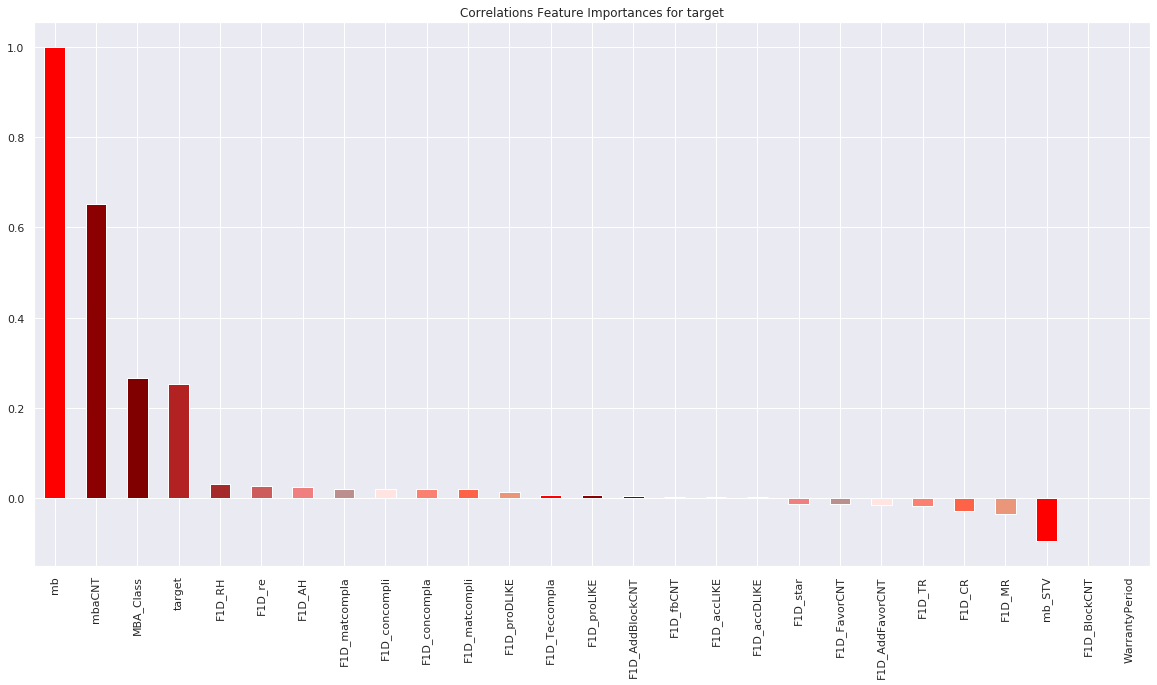

In [87]:
redcl=["red","darkred","maroon","firebrick","brown","indianred",
     "lightcoral","rosybrown",'mistyrose','salmon','tomato','darksalmon']

plt.figure(figsize=(20,10))
df1D.corr()['mb'].sort_values(ascending = False).plot(kind='bar',colors=redcl)
plt.title("Correlations Feature Importances for target")

D:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:203: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  "'colors' is being deprecated. Please use 'color'"


Text(0.5, 1.0, 'Correlations Feature Importances for mb')

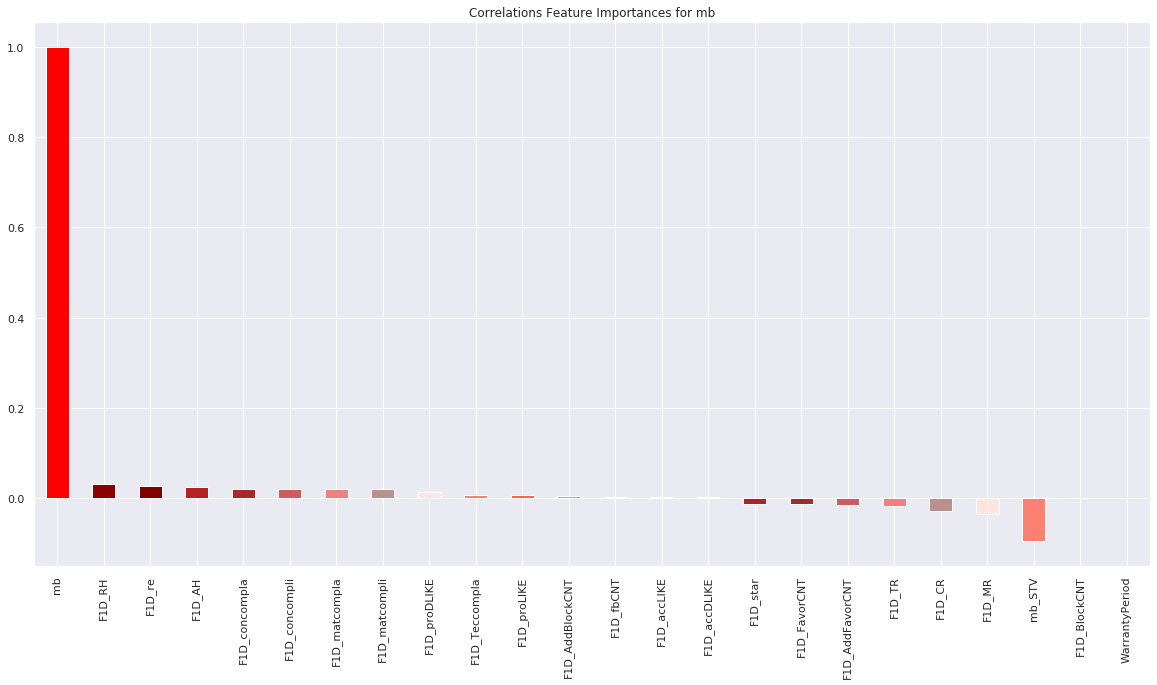

In [88]:
redcl=["red","darkred","maroon","firebrick","brown","indianred",
     "lightcoral","rosybrown",'mistyrose','salmon','tomato','darksalmon']
df1D_fix = df1D.drop(['target','MBA_Class','mbaCNT'],axis=1)

plt.figure(figsize=(20,10))
df1D_fix.corr()['mb'].sort_values(ascending = False).plot(kind='bar',colors=redcl)
plt.title("Correlations Feature Importances for mb")

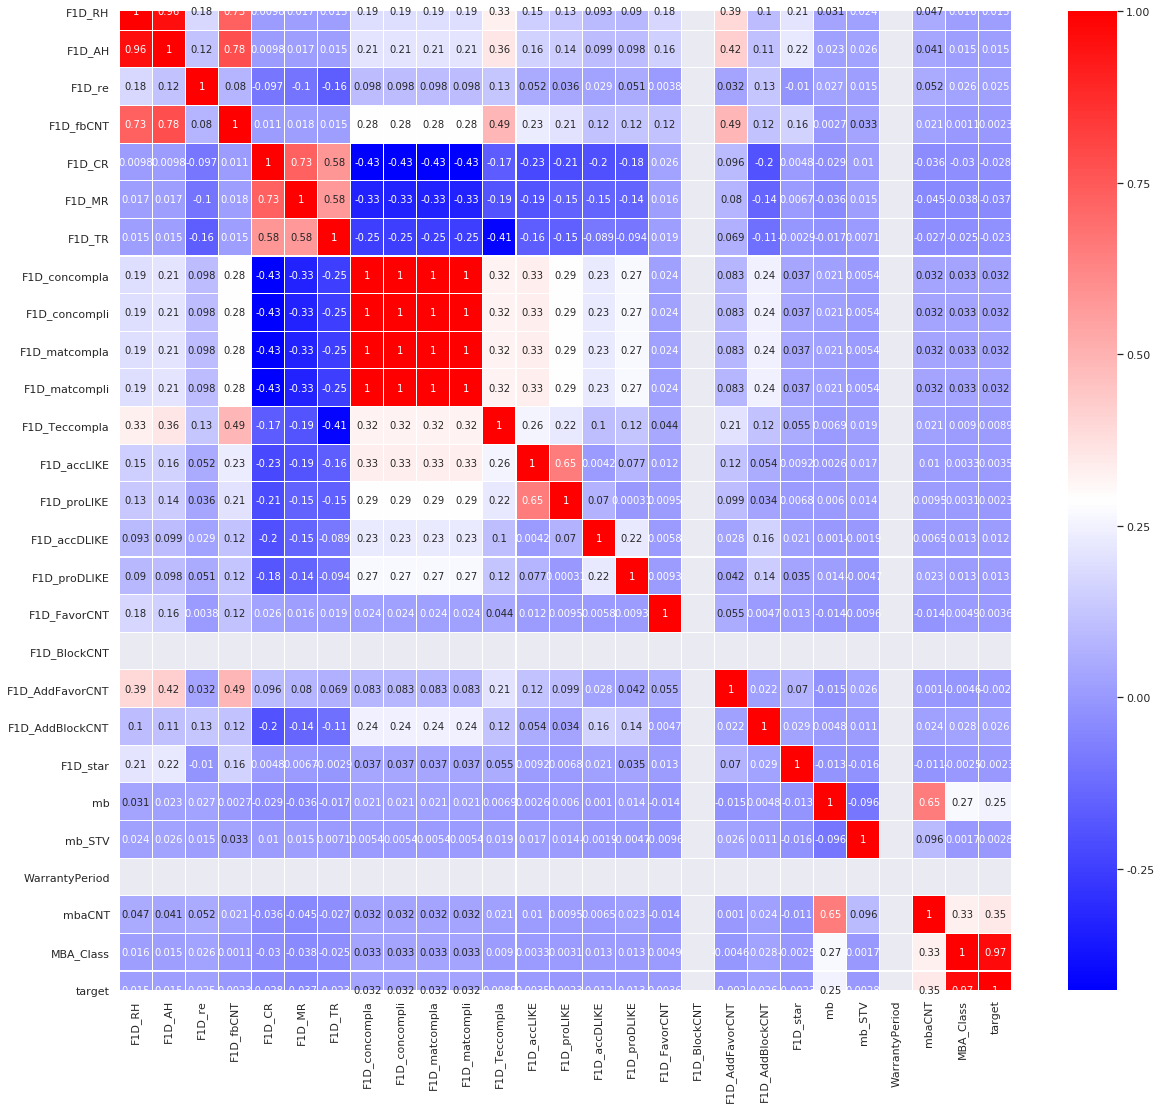

In [89]:
plt.figure(figsize=(20,18))
sns.heatmap(df1D.astype(float).corr(),cmap='bwr',linewidth=0.1,square=False,linecolor='white',annot=True)

可去除:WarrantyPeriod / F1D_BlockCNT 欄位單一值

In [90]:
def reject_outliers(data):
    m = 2
    u = np.mean(data)
    s = np.std(data)
    filtered = [e for e in data if (u - 2 * s < e < u + 2 * s)]
    return filtered

Text(0.5, 1.0, 'Correlations Feature Importances for target')

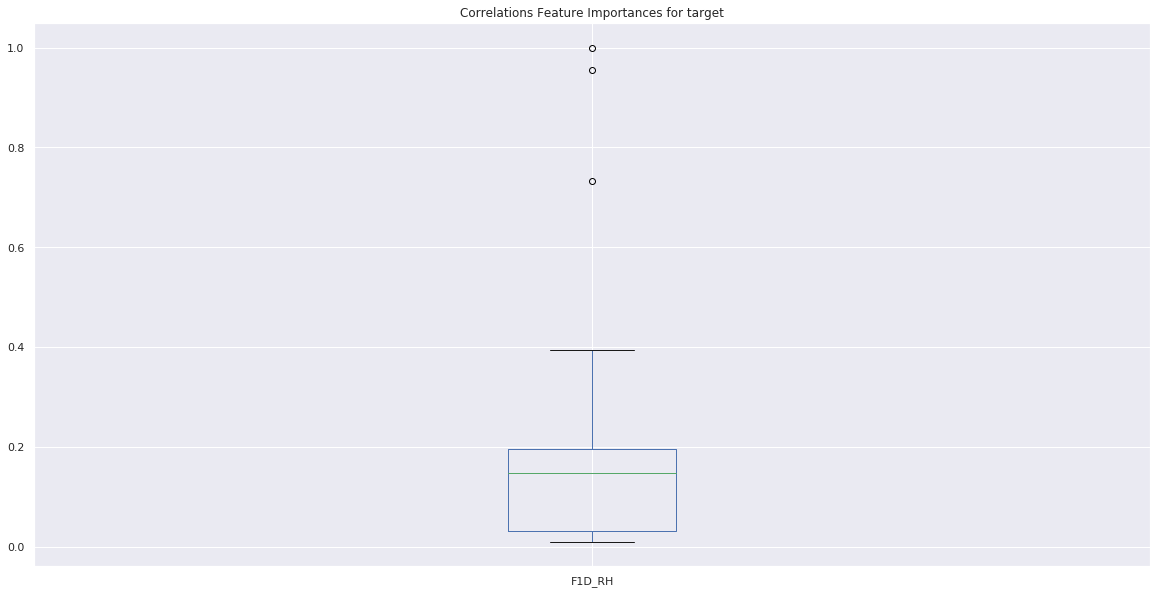

In [91]:
plt.figure(figsize=(20,10))
df1D.corr()['F1D_RH'].sort_values(ascending = False).plot(kind='box')
plt.title("Correlations Feature Importances for target")

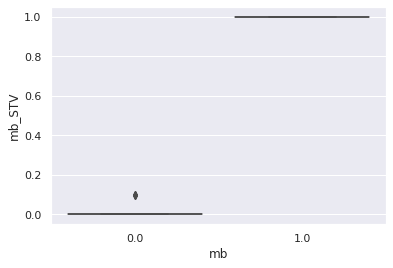

In [92]:
fig,axes = plt.subplots()
sns.boxplot(x='mb',y='mb_STV',
            data=df1D[df1D.mb_STV < 150],orient='v',ax=axes)

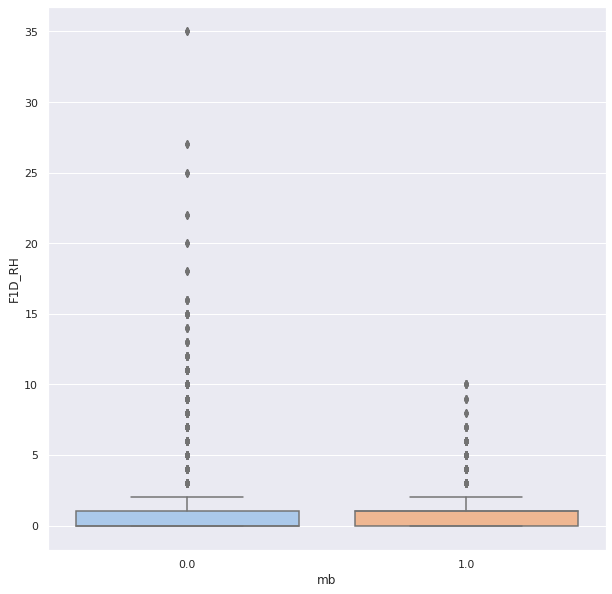

In [93]:
plt.figure(figsize=(10,10))
sns.boxplot(x="mb", y="F1D_RH",data=df1D, palette="pastel")

In [94]:
print(df1D['WarrantyPeriod'].describe())
print(df1D['F1D_BlockCNT'].describe())

count   195356.000
mean         7.000
std          0.000
min          7.000
25%          7.000
50%          7.000
75%          7.000
max          7.000
Name: WarrantyPeriod, dtype: float64
count   195356.000
mean         0.000
std          0.000
min          0.000
25%          0.000
50%          0.000
75%          0.000
max          0.000
Name: F1D_BlockCNT, dtype: float64


In [95]:
print(df1D.skew())
print(df1D.kurt())

F1D_RH             6.034
F1D_AH             5.090
F1D_re             5.060
F1D_fbCNT          3.806
F1D_CR            -4.751
F1D_MR            -4.029
F1D_TR            -3.896
F1D_concompla      6.541
F1D_concompli      6.541
F1D_matcompla      6.541
F1D_matcompli      6.541
F1D_Teccompla      3.586
F1D_accLIKE        6.271
F1D_proLIKE        6.754
F1D_accDLIKE      17.841
F1D_proDLIKE      17.000
F1D_FavorCNT      18.196
F1D_BlockCNT       0.000
F1D_AddFavorCNT    4.908
F1D_AddBlockCNT   13.887
F1D_star           6.968
mb                 1.944
mb_STV             4.530
WarrantyPeriod     0.000
mbaCNT             1.533
MBA_Class          5.396
target             6.240
dtype: float64
F1D_RH             98.732
F1D_AH             70.595
F1D_re             26.607
F1D_fbCNT          40.454
F1D_CR             32.912
F1D_MR             24.981
F1D_TR             22.397
F1D_concompla      54.998
F1D_concompli      54.998
F1D_matcompla      54.998
F1D_matcompli      54.998
F1D_Teccompla      18.19

In [96]:
df1D.columns

Index(['F1D_RH', 'F1D_AH', 'F1D_re', 'F1D_fbCNT', 'F1D_CR', 'F1D_MR', 'F1D_TR',
       'F1D_concompla', 'F1D_concompli', 'F1D_matcompla', 'F1D_matcompli',
       'F1D_Teccompla', 'F1D_accLIKE', 'F1D_proLIKE', 'F1D_accDLIKE',
       'F1D_proDLIKE', 'F1D_FavorCNT', 'F1D_BlockCNT', 'F1D_AddFavorCNT',
       'F1D_AddBlockCNT', 'F1D_star', 'mb', 'mb_STV', 'WarrantyPeriod',
       'mbaCNT', 'MBA_Class', 'target'],
      dtype='object')


 mu = 50.28 and sigma = 1144.46



Text(0.5, 1.0, 'Distribution')

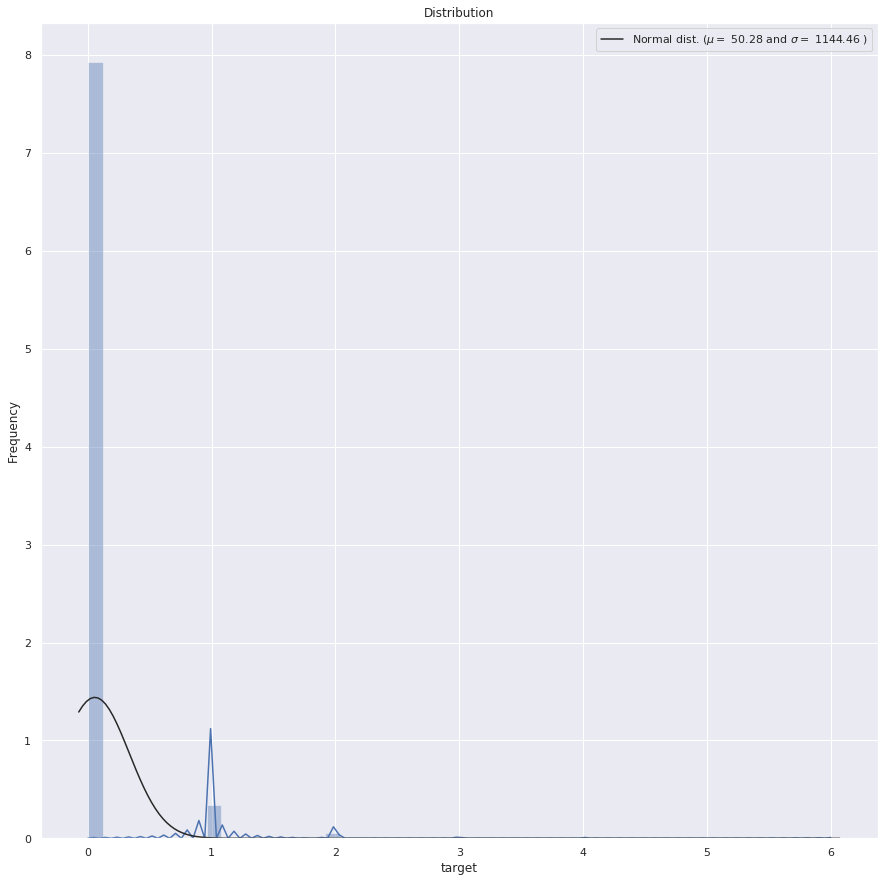

In [97]:
from scipy.stats import norm
plt.figure(figsize=(15,15))
sns.distplot(df1D['target'], fit=norm)
(mu, sigma) = norm.fit(df1D)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')
plt.ylabel('Frequency')
plt.title('Distribution')

In [98]:
import math
def calc(data):
    n=len(data) # 10000個數
    niu=0.0 # niu表示平均值,即期望.
    niu2=0.0 # niu2表示平方的平均值
    niu3=0.0 # niu3表示三次方的平均值
    for a in data:
        niu += a
        niu2 += a**2
        niu3 += a**3
    niu /= n  
    niu2 /= n
    niu3 /= n
    sigma = math.sqrt(niu2 - niu*niu)
    return [niu,sigma,niu3]

In [99]:
def calc_stat(data):
    [niu, sigma, niu3]=calc(data)
    n=len(data)
    niu4=0.0 # niu4計算峰度計算公式的分子
    for a in data:
        a -= niu
        niu4 += a**4
    niu4 /= n

    skew =(niu3 -3*niu*sigma**2-niu**3)/(sigma**3) # 偏度計算公式
    kurt=niu4/(sigma**4) # 峰度計算公式:下方為方差的平方即為標準差的四次方
    return [niu, sigma,skew,kurt]

0.5382583590982616 0.8728199245039536 5.090107815290471 73.59353423670451


D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  if sys.path[0] == '':


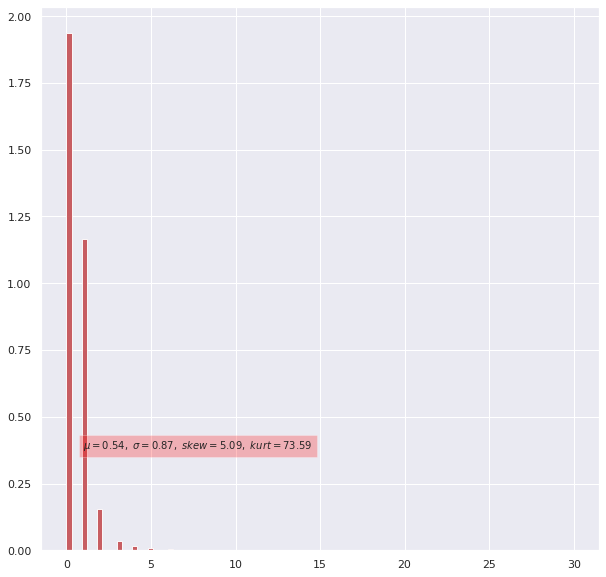

In [100]:
#data =  list(np.random.randn(10000)) # 滿足高斯分佈的10000個數
#data2 = list(2*np.random.randn(10000))  # 將滿足好高斯分佈的10000個數乘以兩倍,方差變成四倍
[niu, sigma, skew, kurt] = calc_stat(df1D['F1D_AH'])
#[niu_2, sigma2, skew2, kurt2] = calc_stat(df1D['F1D_AH'])
print (niu, sigma, skew, kurt)
#print (niu_2, sigma2, skew2, kurt2)
info = r'$\mu=%.2f,\ \sigma=%.2f,\ skew=%.2f,\ kurt=%.2f$' %(niu,sigma, skew, kurt) # 標註
#info2 = r'$\mu=%.2f,\ \sigma=%.2f,\ skew=%.2f,\ kurt=%.2f$' %(niu_2,sigma2, skew2, kurt2)
plt.figure(figsize=(10,10))
plt.text(1,0.38,info,bbox=dict(facecolor='red',alpha=0.25))
#plt.text(1,0.35,info2,bbox=dict(facecolor='green',alpha=0.25))
plt.hist(df1D['F1D_AH'],100,normed=True,facecolor='r',alpha=0.9)
#plt.hist(df1D['F1D_AH'],100,normed=True,facecolor='g',alpha=0.8)
plt.grid(True)
plt.show()

## dfF14D

In [291]:
df_14D = df[['contract_sn','FDsellingdate','F14D_RH','F14D_AH','F14D_re','F14D_fbCNT','F14D_CR','F14D_MR','F14D_TR','F14D_concompla','F14D_concompli','F14D_matcompla','F14D_matcompli','F14D_Teccompla','F14D_accLIKE','F14D_proLIKE','F14D_accDLIKE','F14D_proDLIKE','F14D_FavorCNT','F14D_BlockCNT','F14D_AddFavorCNT','F14D_AddBlockCNT','F14D_star','product_sdate','mb','mb_STV','mbdate','WarrantyPeriod','mbaCNT','mbadate_First','mbadate_New','MBA_technical','MBA_customer','MBA_Scheduling','MBA_Class','MBA_Service']]
print(df_14D.info())
df_14D.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195356 entries, 0 to 195355
Data columns (total 36 columns):
contract_sn         195356 non-null int64
FDsellingdate       195356 non-null object
F14D_RH             195356 non-null int64
F14D_AH             195356 non-null int64
F14D_re             195356 non-null int64
F14D_fbCNT          195356 non-null int64
F14D_CR             112920 non-null float64
F14D_MR             112912 non-null float64
F14D_TR             112920 non-null float64
F14D_concompla      195356 non-null int64
F14D_concompli      195356 non-null int64
F14D_matcompla      195356 non-null int64
F14D_matcompli      195356 non-null int64
F14D_Teccompla      195356 non-null int64
F14D_accLIKE        195356 non-null int64
F14D_proLIKE        195356 non-null int64
F14D_accDLIKE       195356 non-null int64
F14D_proDLIKE       195356 non-null int64
F14D_FavorCNT       195356 non-null int64
F14D_BlockCNT       195356 non-null int64
F14D_AddFavorCNT    195356 non-null int64


contract_sn FDsellingdate  F14D_RH  F14D_AH  F14D_re  F14D_fbCNT  F14D_CR  \
0     51043038    2019-01-15        7        7        0           5   10.000   
1     51043155    2019-01-02        2        2        0           2    9.000   
2     51045274    2019-01-01        0        0        0           0      nan   
3     51046260    2019-01-01       18        9        0           4    9.000   
4     51046442    2019-01-02        6        6        0           6   10.000   

   F14D_MR  F14D_TR  F14D_concompla  F14D_concompli  F14D_matcompla  \
0   10.000    9.800               0               0               0   
1    9.500    8.000               1               1               1   
2      nan      nan               0               0               0   
3    9.000    8.750               0               0               0   
4   10.000   10.000               0               0               0   

   F14D_matcompli  F14D_Teccompla  F14D_accLIKE  F14D_proLIKE  F14D_accDLIKE  \
0               0               0             0             0              0   
1               1               1             0             0              0   
2               0               0             0             0              0   
3               0               0             0             0              0   
4               0               0             0             0              0   

   F14D_proDLIKE  F14D_FavorCNT  F14D_BlockCNT  F14D_AddFavorCNT  \
0              0              0              0                 2   
1              0              0              0                 0   
2              0              0              0                 0   
3              0              1              0                 1   
4              0              1              0                 2   

   F14D_AddBlockCNT  F14D_star            product_sdate  mb    mb_STV mbdate  \
0                 0      7.000  2019-01-15 00:00:00.000   0     0.000    NaN   
1                 0        nan  2019-01-03 00:00:00.000   0 13783.000    NaN   
2                 0        nan  2019-01-02 00:00:00.000   0     0.000    NaN   
3                 0      7.000  2019-01-01 00:00:00.000   0     0.000    NaN   
4                 0      4.000  2019-01-02 00:00:00.000   0     0.000    NaN   

   WarrantyPeriod  mbaCNT            mbadate_First              mbadate_New  \
0               7     nan                      NaN                      NaN   
1               7   1.000  2019-09-07 14:42:44.170  2019-09-07 14:42:44.170   
2               7   1.000  2019-08-20 08:21:38.263  2019-08-20 08:21:38.263   
3               7   1.000  2019-05-06 17:13:15.500  2019-05-06 17:13:15.500   
4               7     nan                      NaN                      NaN   

   MBA_technical  MBA_customer  MBA_Scheduling  MBA_Class  MBA_Service  
0            nan           nan             nan        nan          nan  
1          0.000         1.000           0.000      0.000        0.000  
2          0.000         1.000           0.000      0.000        0.000  
3          0.000         0.000           0.000      1.000        0.000  
4            nan           nan             nan        nan          nan

In [292]:
#pd.set_option('display.max_series',None)
print(df_14D.isnull().sum())
print('-'*10,'missing ratio','-'*10)
print(df_14D.isnull().sum()/len(df_14D))

contract_sn              0
FDsellingdate            0
F14D_RH                  0
F14D_AH                  0
F14D_re                  0
F14D_fbCNT               0
F14D_CR              82436
F14D_MR              82444
F14D_TR              82436
F14D_concompla           0
F14D_concompli           0
F14D_matcompla           0
F14D_matcompli           0
F14D_Teccompla           0
F14D_accLIKE             0
F14D_proLIKE             0
F14D_accDLIKE            0
F14D_proDLIKE            0
F14D_FavorCNT            0
F14D_BlockCNT            0
F14D_AddFavorCNT         0
F14D_AddBlockCNT         0
F14D_star            88688
product_sdate            0
mb                       0
mb_STV                   0
mbdate              165764
WarrantyPeriod           0
mbaCNT              142444
mbadate_First       142444
mbadate_New         142444
MBA_technical       142444
MBA_customer        142444
MBA_Scheduling      142444
MBA_Class           142444
MBA_Service         142444
dtype: int64
---------- miss

In [69]:
df14D = df_14D.drop(['contract_sn','FDsellingdate','mbadate_First','mbadate_New','product_sdate','mbdate','MBA_customer','MBA_Scheduling','MBA_technical','MBA_Service'],axis=1)
df14D['mbaCNT'] = df14D['mbaCNT'].fillna(0)
df14D['MBA_Class'] = df14D['MBA_Class'].fillna(0)
df14D['F14D_CR'] = df14D['F14D_CR'].fillna(df14D['F14D_CR'].mean())
df14D['F14D_MR'] = df14D['F14D_MR'].fillna(df14D['F14D_MR'].mean())
df14D['F14D_TR'] = df14D['F14D_TR'].fillna(df14D['F14D_TR'].mean())
df14D['F14D_star'] = df14D['F14D_star'].fillna(df14D['F14D_star'].median())
df14D['target']=df14D['mbaCNT']*df14D['MBA_Class']

In [102]:
print(df14D.info())
df14D.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195356 entries, 0 to 195355
Data columns (total 27 columns):
F14D_RH             195356 non-null int64
F14D_AH             195356 non-null int64
F14D_re             195356 non-null int64
F14D_fbCNT          195356 non-null int64
F14D_CR             195356 non-null float64
F14D_MR             195356 non-null float64
F14D_TR             195356 non-null float64
F14D_concompla      195356 non-null int64
F14D_concompli      195356 non-null int64
F14D_matcompla      195356 non-null int64
F14D_matcompli      195356 non-null int64
F14D_Teccompla      195356 non-null int64
F14D_accLIKE        195356 non-null int64
F14D_proLIKE        195356 non-null int64
F14D_accDLIKE       195356 non-null int64
F14D_proDLIKE       195356 non-null int64
F14D_FavorCNT       195356 non-null int64
F14D_BlockCNT       195356 non-null int64
F14D_AddFavorCNT    195356 non-null int64
F14D_AddBlockCNT    195356 non-null int64
F14D_star           195356 non-null float64

F14D_RH  F14D_AH  F14D_re  F14D_fbCNT  F14D_CR  F14D_MR  F14D_TR  \
0        7        7        0           5   10.000   10.000    9.800   
1        2        2        0           2    9.000    9.500    8.000   
2        0        0        0           0    9.444    9.391    9.249   
3       18        9        0           4    9.000    9.000    8.750   
4        6        6        0           6   10.000   10.000   10.000   

   F14D_concompla  F14D_concompli  F14D_matcompla  F14D_matcompli  \
0               0               0               0               0   
1               1               1               1               1   
2               0               0               0               0   
3               0               0               0               0   
4               0               0               0               0   

   F14D_Teccompla  F14D_accLIKE  F14D_proLIKE  F14D_accDLIKE  F14D_proDLIKE  \
0               0             0             0              0              0   
1               1             0             0              0              0   
2               0             0             0              0              0   
3               0             0             0              0              0   
4               0             0             0              0              0   

   F14D_FavorCNT  F14D_BlockCNT  F14D_AddFavorCNT  F14D_AddBlockCNT  \
0              0              0                 2                 0   
1              0              0                 0                 0   
2              0              0                 0                 0   
3              1              0                 1                 0   
4              1              0                 2                 0   

   F14D_star  mb    mb_STV  WarrantyPeriod  mbaCNT  MBA_Class  target  
0      7.000   0     0.000               7   0.000      0.000   0.000  
1      8.000   0 13783.000               7   1.000      0.000   0.000  
2      8.000   0     0.000               7   1.000      0.000   0.000  
3      7.000   0     0.000               7   1.000      1.000   1.000  
4      4.000   0     0.000               7   0.000      0.000   0.000

In [104]:
z = np.abs(stats.zscore(df14D))
print(z)
Q1 = df14D.quantile(0.25)
Q3 = df14D.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

[[1.00435922 1.28777613 0.27558933 ... 0.58175072 0.21297599 0.2060443 ]
 [0.23080055 0.18573775 0.27558933 ... 1.41910305 0.21297599 0.2060443 ]
 [0.72486446 0.77514331 0.27558933 ... 1.41910305 0.21297599 0.2060443 ]
 ...
 [0.51029531 0.69837057 2.91160161 ... 0.58175072 0.21297599 0.2060443 ]
 [0.23080055 0.18573775 0.27558933 ... 0.58175072 0.21297599 0.2060443 ]
 [0.72486446 0.77514331 0.27558933 ... 0.58175072 0.21297599 0.2060443 ]]
F14D_RH            4.000
F14D_AH            4.000
F14D_re            0.000
F14D_fbCNT         3.000
F14D_CR            0.556
F14D_MR            0.609
F14D_TR            0.751
F14D_concompla     0.000
F14D_concompli     0.000
F14D_matcompla     0.000
F14D_matcompli     0.000
F14D_Teccompla     0.000
F14D_accLIKE       0.000
F14D_proLIKE       0.000
F14D_accDLIKE      0.000
F14D_proDLIKE      0.000
F14D_FavorCNT      0.000
F14D_BlockCNT      0.000
F14D_AddFavorCNT   0.000
F14D_AddBlockCNT   0.000
F14D_star          3.000
mb                 0.000
mb_STV

D:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:203: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  "'colors' is being deprecated. Please use 'color'"


Text(0.5, 1.0, 'Correlations Feature Importances for target')

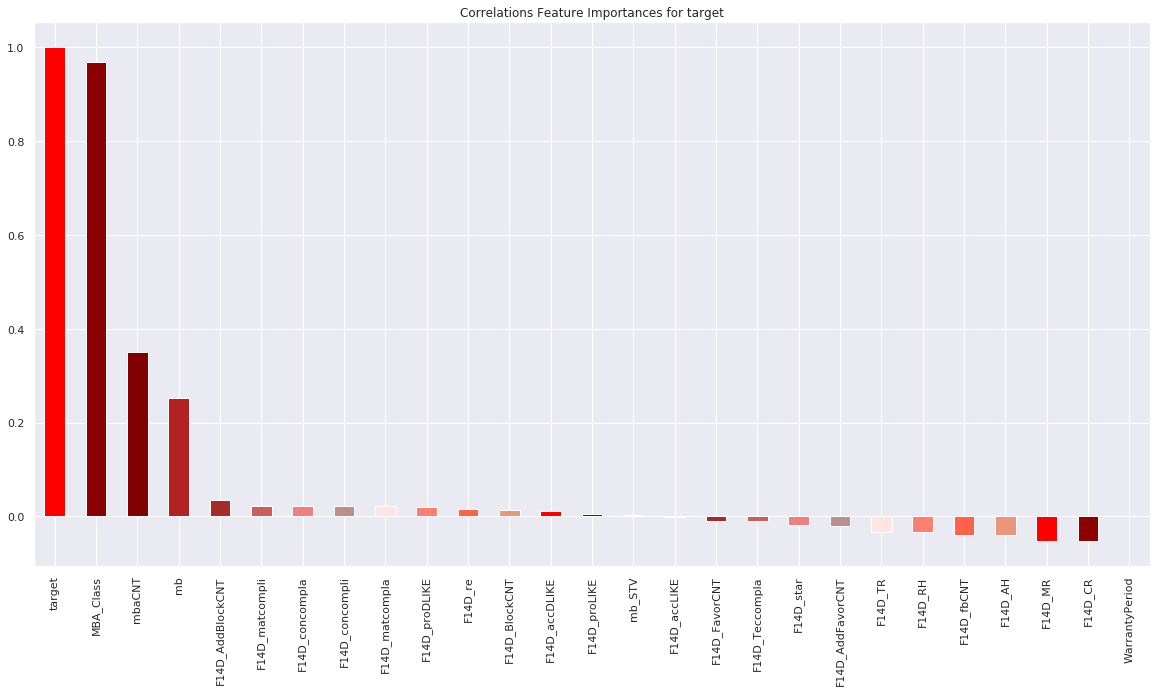

In [106]:
redcl=["red","darkred","maroon","firebrick","brown","indianred",
     "lightcoral","rosybrown",'mistyrose','salmon','tomato','darksalmon']

plt.figure(figsize=(20,10))
df14D.corr()['target'].sort_values(ascending = False).plot(kind='bar',colors=redcl)
plt.title("Correlations Feature Importances for target")

D:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:203: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  "'colors' is being deprecated. Please use 'color'"


Text(0.5, 1.0, 'Correlations Feature Importances for mb')

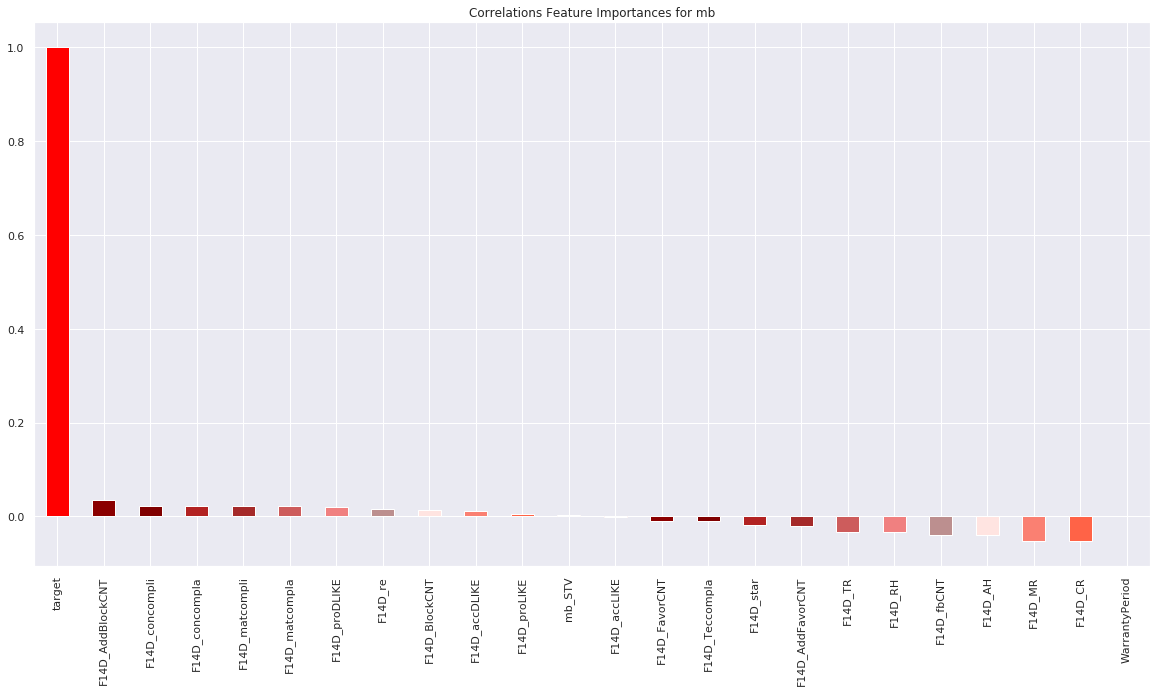

In [108]:
redcl=["red","darkred","maroon","firebrick","brown","indianred",
     "lightcoral","rosybrown",'mistyrose','salmon','tomato','darksalmon']

df14D_fix = df14D.drop(['mb','MBA_Class','mbaCNT'],axis=1)
plt.figure(figsize=(20,10))
df14D_fix.corr()['target'].sort_values(ascending = False).plot(kind='bar',colors=redcl)
plt.title("Correlations Feature Importances for mb")

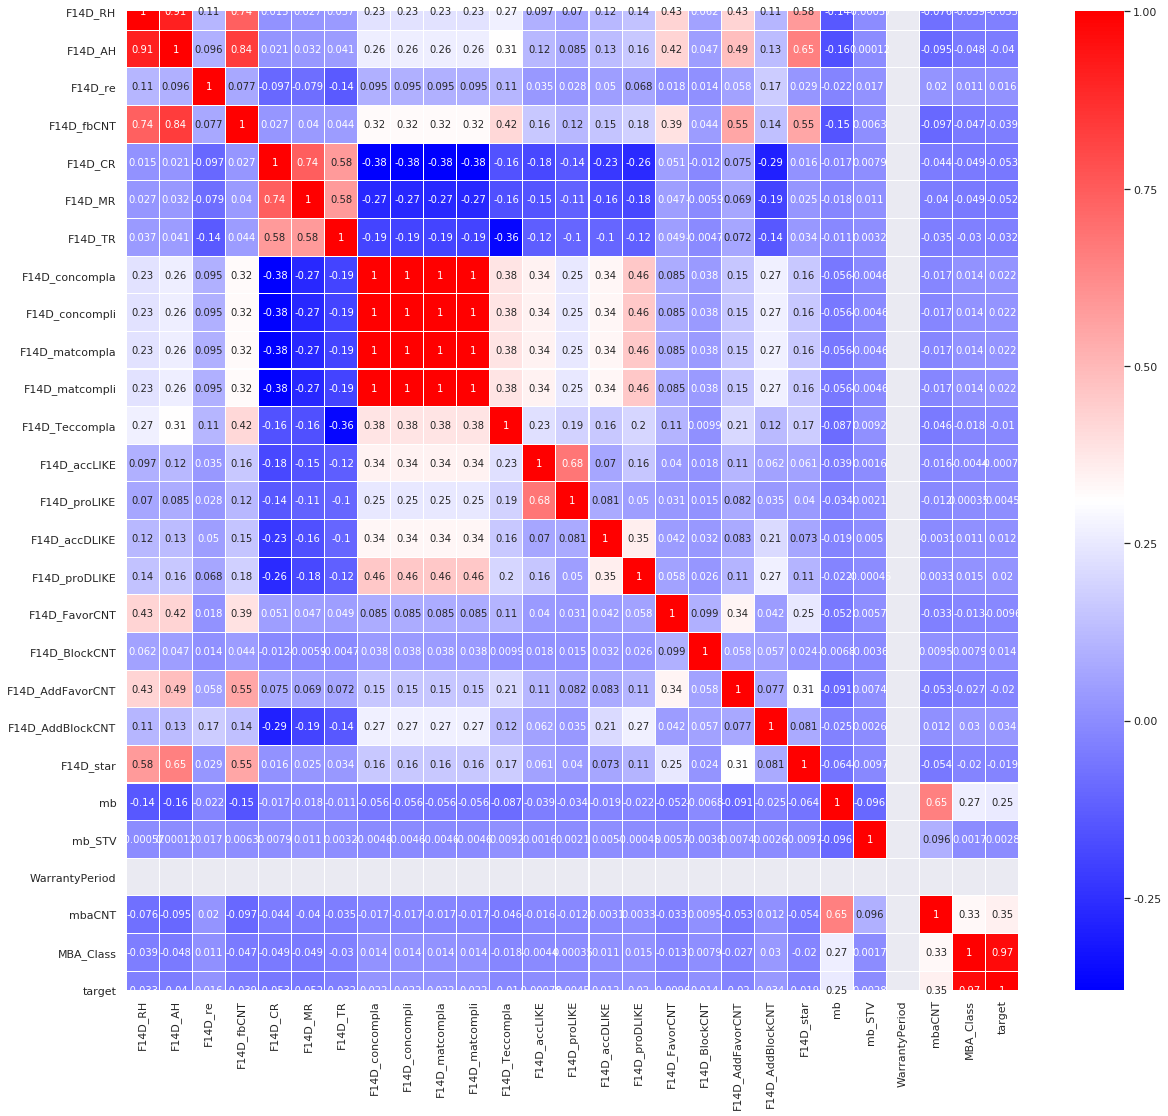

In [109]:
plt.figure(figsize=(20,18))
sns.heatmap(df14D.astype(float).corr(),cmap='bwr',linewidth=0.1,square=False,linecolor='white',annot=True)

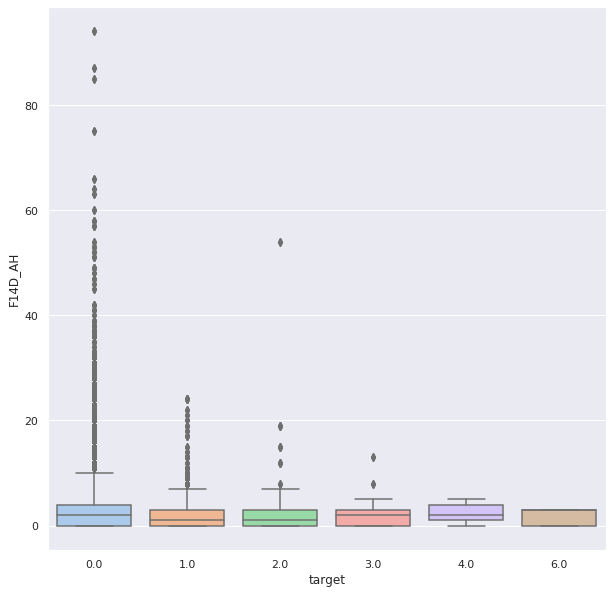

In [114]:
plt.figure(figsize=(10,10))
sns.boxplot(x="target", y="F14D_AH",data=df14D, palette="pastel")


 mu = 50.71 and sigma = 1144.44



Text(0.5, 1.0, 'Distribution')

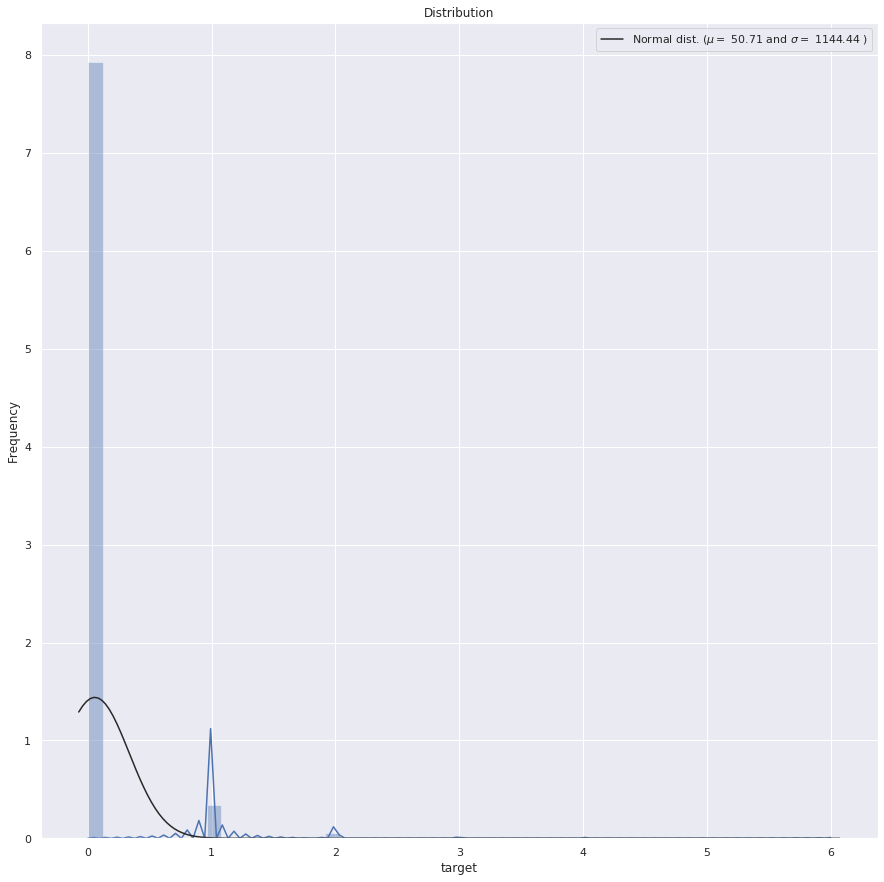

In [120]:
from scipy.stats import norm
plt.figure(figsize=(15,15))
sns.distplot(df14D['target'], fit=norm)
(mu, sigma) = norm.fit(df14D)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')
plt.ylabel('Frequency')
plt.title('Distribution')

2.6302545097155963 3.3932493386838325 5.761456939113021 77.33879266879228


D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  if sys.path[0] == '':


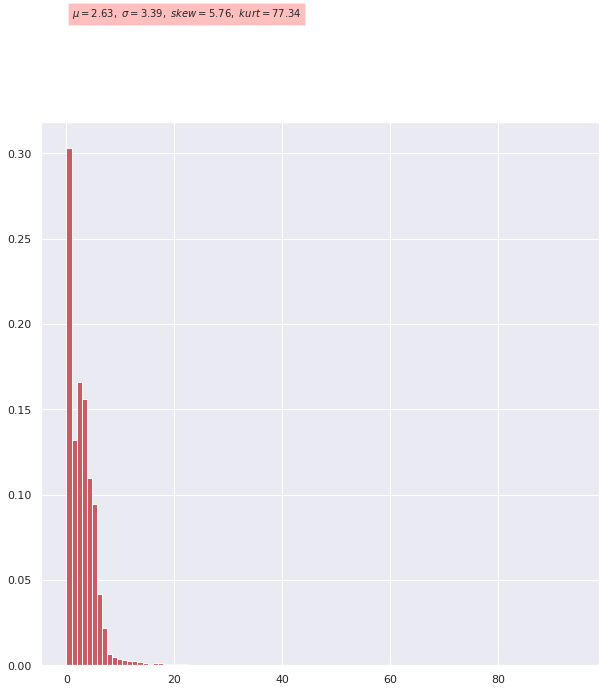

In [119]:
#data =  list(np.random.randn(10000)) # 滿足高斯分佈的10000個數
#data2 = list(2*np.random.randn(10000))  # 將滿足好高斯分佈的10000個數乘以兩倍,方差變成四倍
[niu, sigma, skew, kurt] = calc_stat(df14D['F14D_AH'])
#[niu_2, sigma2, skew2, kurt2] = calc_stat(df1D['F1D_AH'])
print (niu, sigma, skew, kurt)
#print (niu_2, sigma2, skew2, kurt2)
info = r'$\mu=%.2f,\ \sigma=%.2f,\ skew=%.2f,\ kurt=%.2f$' %(niu,sigma, skew, kurt) # 標註
#info2 = r'$\mu=%.2f,\ \sigma=%.2f,\ skew=%.2f,\ kurt=%.2f$' %(niu_2,sigma2, skew2, kurt2)
plt.figure(figsize=(10,10))
plt.text(1,0.38,info,bbox=dict(facecolor='red',alpha=0.25))
#plt.text(1,0.35,info2,bbox=dict(facecolor='green',alpha=0.25))
plt.hist(df14D['F14D_AH'],100,normed=True,facecolor='r',alpha=0.9)
#plt.hist(df1D['F1D_AH'],100,normed=True,facecolor='g',alpha=0.8)
plt.grid(True)
plt.show()

## dfF30D

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195356 entries, 0 to 195355
Data columns (total 36 columns):
contract_sn         195356 non-null int64
FDsellingdate       195356 non-null object
F30D_RH             195356 non-null int64
F30D_AH             195356 non-null int64
F30D_re             195356 non-null int64
F30D_fbCNT          195356 non-null int64
F30D_CR             121356 non-null float64
F30D_MR             121348 non-null float64
F30D_TR             121356 non-null float64
F30D_concompla      195356 non-null int64
F30D_concompli      195356 non-null int64
F30D_matcompla      195356 non-null int64
F30D_matcompli      195356 non-null int64
F30D_Teccompla      195356 non-null int64
F30D_accLIKE        195356 non-null int64
F30D_proLIKE        195356 non-null int64
F30D_accDLIKE       195356 non-null int64
F30D_proDLIKE       195356 non-null int64
F30D_FavorCNT       195356 non-null int64
F30D_BlockCNT       195356 non-null int64
F30D_AddFavorCNT    195356 non-null int64


D:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:2315: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


[[0.37964076 0.41997234 0.32642165 ... 0.58175072 0.21297599 0.2060443 ]
 [0.08725275 0.01064516 0.32642165 ... 1.41910305 0.21297599 0.2060443 ]
 [0.55414626 0.58480182 0.32642165 ... 1.41910305 0.21297599 0.2060443 ]
 ...
 [0.3206995  0.29772349 0.32642165 ... 0.58175072 0.21297599 0.2060443 ]
 [0.55414626 0.58480182 0.32642165 ... 0.58175072 0.21297599 0.2060443 ]
 [0.67086963 0.72834099 0.32642165 ... 0.58175072 0.21297599 0.2060443 ]]
F30D_RH            7.000
F30D_AH            7.000
F30D_re            0.000
F30D_fbCNT         5.000
F30D_CR            0.539
F30D_MR            0.582
F30D_TR            0.688
F30D_concompla     0.000
F30D_concompli     0.000
F30D_matcompla     0.000
F30D_matcompli     0.000
F30D_Teccompla     0.000
F30D_accLIKE       0.000
F30D_proLIKE       0.000
F30D_accDLIKE      0.000
F30D_proDLIKE      0.000
F30D_FavorCNT      0.000
F30D_BlockCNT      0.000
F30D_AddFavorCNT   1.000
F30D_AddBlockCNT   0.000
F30D_star          5.000
mb                 0.000
mb_STV

D:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:203: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  "'colors' is being deprecated. Please use 'color'"
D:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:203: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  "'colors' is being deprecated. Please use 'color'"


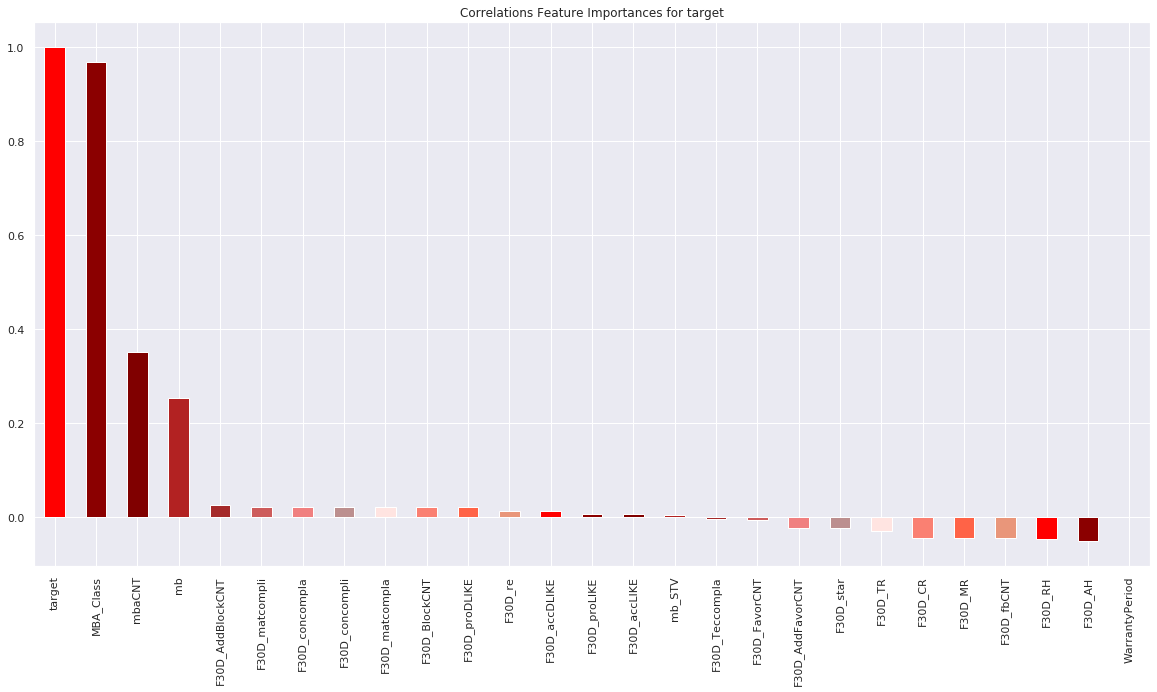

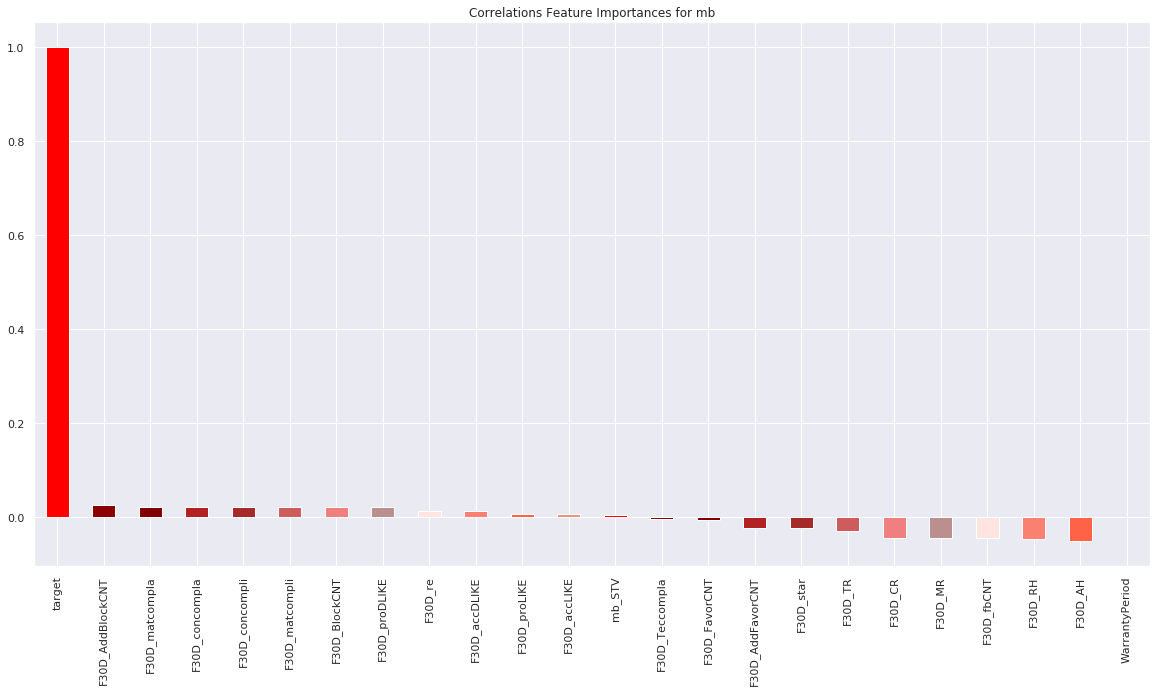

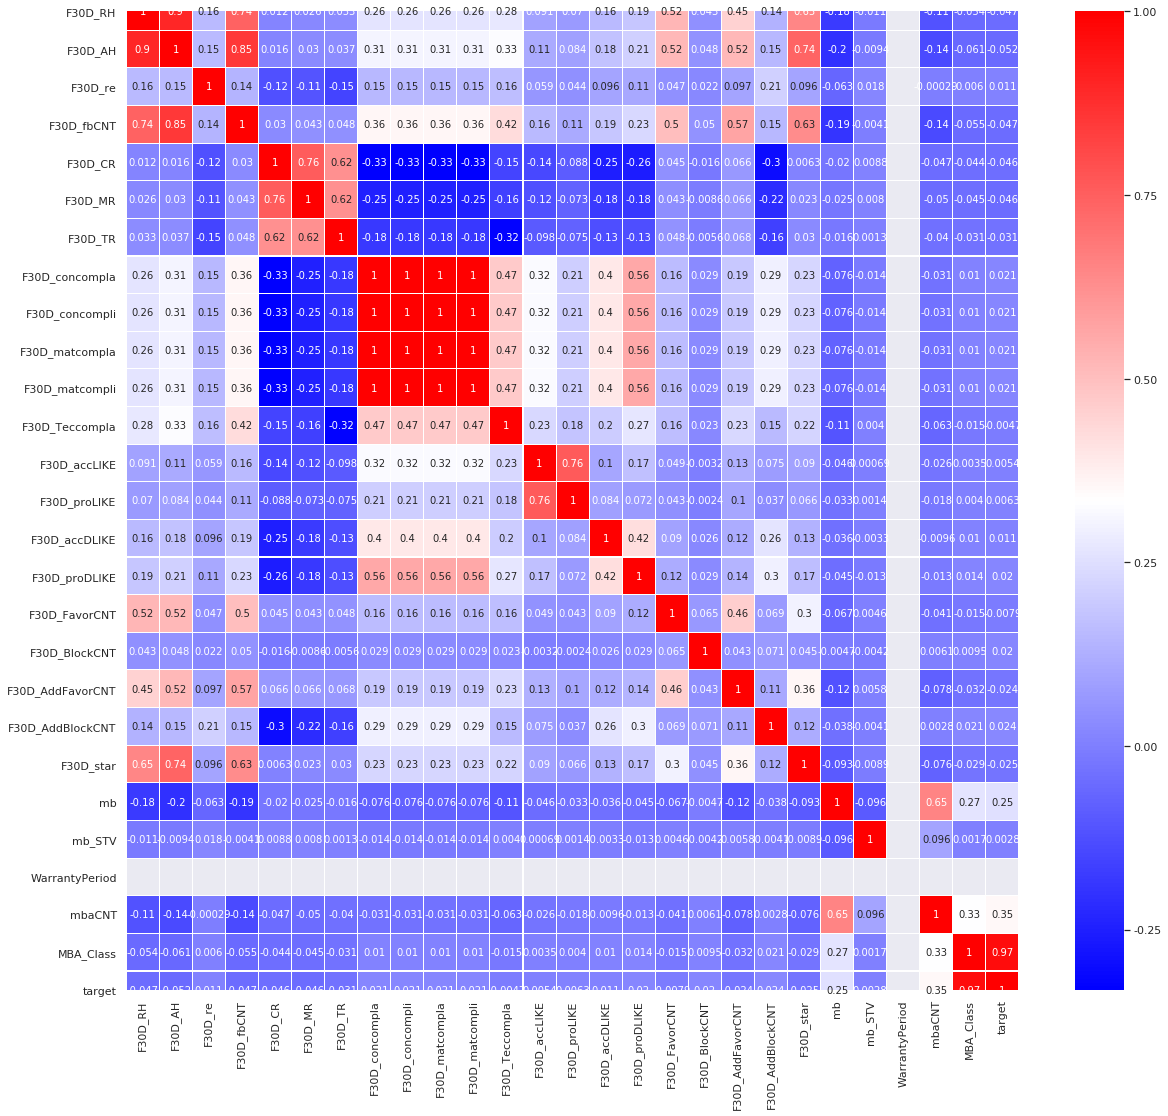

In [110]:
df_30D = df[['contract_sn','FDsellingdate','F30D_RH','F30D_AH','F30D_re','F30D_fbCNT','F30D_CR','F30D_MR','F30D_TR','F30D_concompla','F30D_concompli','F30D_matcompla','F30D_matcompli','F30D_Teccompla','F30D_accLIKE','F30D_proLIKE','F30D_accDLIKE','F30D_proDLIKE','F30D_FavorCNT','F30D_BlockCNT','F30D_AddFavorCNT','F30D_AddBlockCNT','F30D_star','product_sdate','mb','mb_STV','mbdate','WarrantyPeriod','mbaCNT','mbadate_First','mbadate_New','MBA_technical','MBA_customer','MBA_Scheduling','MBA_Class','MBA_Service']]
print(df_30D.info())
df_30D.head()

df30D = df_30D.drop(['contract_sn','FDsellingdate','mbadate_First','mbadate_New','product_sdate','mbdate','MBA_customer','MBA_Scheduling','MBA_technical','MBA_Service'],axis=1)
df30D['mbaCNT'] = df30D['mbaCNT'].fillna(0)
df30D['MBA_Class'] = df30D['MBA_Class'].fillna(0)
df30D['F30D_CR'] = df30D['F30D_CR'].fillna(df30D['F30D_CR'].mean())
df30D['F30D_MR'] = df30D['F30D_MR'].fillna(df30D['F30D_MR'].mean())
df30D['F30D_TR'] = df30D['F30D_TR'].fillna(df30D['F30D_TR'].mean())
df30D['F30D_star'] = df30D['F30D_star'].fillna(df30D['F30D_star'].median())
df30D['target']=df30D['mbaCNT']*df30D['MBA_Class']

print(df30D.info())
df30D.head()

z = np.abs(stats.zscore(df30D))
print(z)
Q1 = df30D.quantile(0.25)
Q3 = df30D.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

redcl=["red","darkred","maroon","firebrick","brown","indianred",
     "lightcoral","rosybrown",'mistyrose','salmon','tomato','darksalmon']

plt.figure(figsize=(20,10))
df30D.corr()['target'].sort_values(ascending = False).plot(kind='bar',colors=redcl)
plt.title("Correlations Feature Importances for target")

redcl=["red","darkred","maroon","firebrick","brown","indianred",
     "lightcoral","rosybrown",'mistyrose','salmon','tomato','darksalmon']

df30D_fix = df30D.drop(['mb','MBA_Class','mbaCNT'],axis=1)
plt.figure(figsize=(20,10))
df30D_fix.corr()['target'].sort_values(ascending = False).plot(kind='bar',colors=redcl)
plt.title("Correlations Feature Importances for mb")

plt.figure(figsize=(20,18))
sns.heatmap(df30D.astype(float).corr(),cmap='bwr',linewidth=0.1,square=False,linecolor='white',annot=True)


 mu = 51.21 and sigma = 1144.42



Text(0.5, 1.0, 'Distribution')

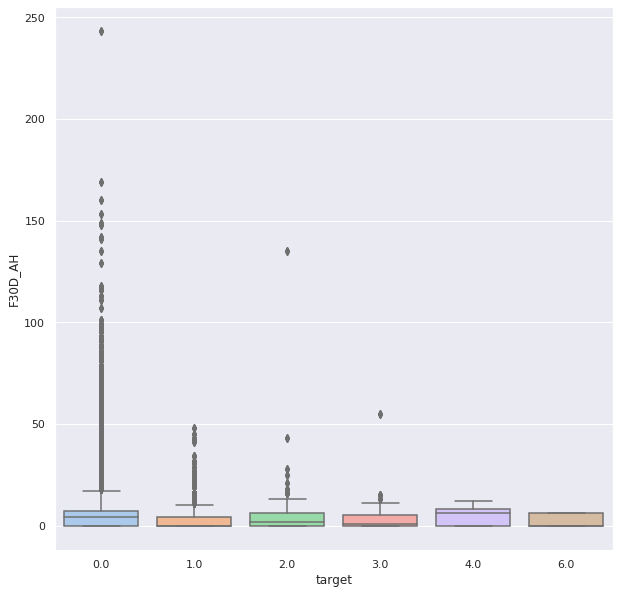

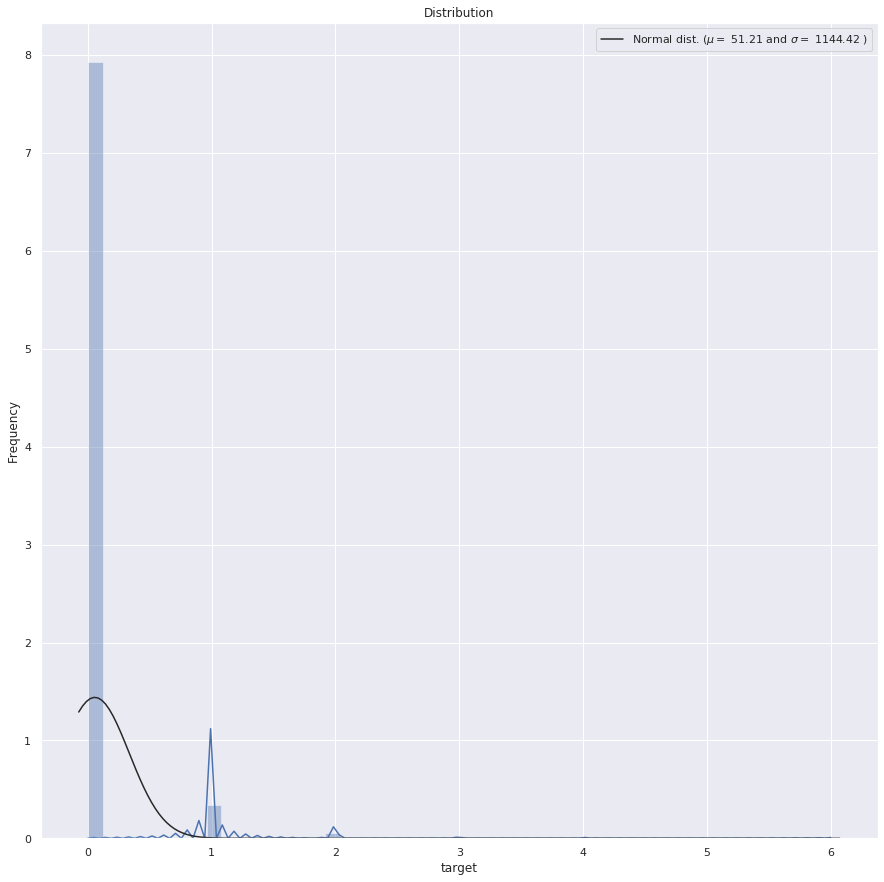

In [126]:
plt.figure(figsize=(10,10))
sns.boxplot(x="target", y="F30D_AH",data=df30D, palette="pastel")

plt.figure(figsize=(15,15))
sns.distplot(df30D['target'], fit=norm)
(mu, sigma) = norm.fit(df30D)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')
plt.ylabel('Frequency')
plt.title('Distribution')


5.074162042629865 6.966739632609572 6.689228656957811 103.70138331088972


D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  import sys


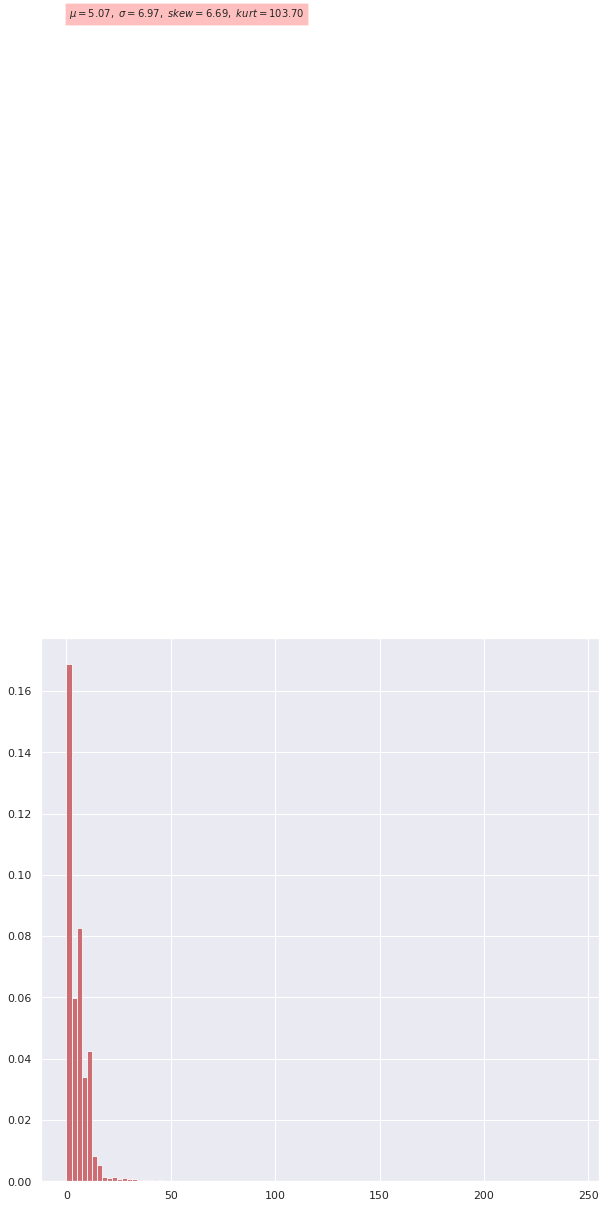

In [129]:
[niu, sigma, skew, kurt] = calc_stat(df30D['F30D_AH'])
print (niu, sigma, skew, kurt)
info = r'$\mu=%.2f,\ \sigma=%.2f,\ skew=%.2f,\ kurt=%.2f$' %(niu,sigma, skew, kurt) 
plt.figure(figsize=(10,10))
plt.text(1,0.38,info,bbox=dict(facecolor='red',alpha=0.25))
#plt.text(1,0.35,info2,bbox=dict(facecolor='green',alpha=0.25))
plt.hist(df30D['F30D_AH'],100,normed=True,facecolor='r',alpha=0.8)
#plt.hist(df1D['F1D_AH'],100,normed=True,facecolor='g',alpha=0.8)
plt.grid(True)
plt.show()

In [130]:
df.head()

contract_sn FDsellingdate  F1D_RH  F1D_AH  F1D_re  F1D_fbCNT  F1D_CR  \
0     51043038    2019-01-15       0       0       0          0     nan   
1     51043155    2019-01-02       1       1       0          0     nan   
2     51045274    2019-01-01       0       0       0          0     nan   
3     51046260    2019-01-01      22      19       0         13   9.231   
4     51046442    2019-01-02       1       1       0          1  10.000   

   F1D_MR  F1D_TR  F1D_concompla  F1D_concompli  F1D_matcompla  F1D_matcompli  \
0     nan     nan              0              0              0              0   
1     nan     nan              0              0              0              0   
2     nan     nan              0              0              0              0   
3   9.231   9.000              2              2              2              2   
4   9.000   9.000              0              0              0              0   

   F1D_Teccompla  F1D_accLIKE  F1D_proLIKE  F1D_accDLIKE  F1D_proDLIKE  \
0              0            0            0             0             0   
1              0            0            0             0             0   
2              0            0            0             0             0   
3              2            0            0             0             0   
4              0            0            0             0             0   

   F1D_FavorCNT  F1D_BlockCNT  F1D_AddFavorCNT  F1D_AddBlockCNT  F1D_star  \
0             0             0                0                0       nan   
1             0             0                0                0       nan   
2             0             0                0                0       nan   
3             0             0                3                0     3.000   
4             0             0                1                0       nan   

   F3D_RH  F3D_AH  F3D_re  F3D_fbCNT  F3D_CR  F3D_MR  F3D_TR  F3D_concompla  \
0       1       1       1          1  10.000  10.000   5.000              0   
1       2       2       0          2   7.500  10.000  10.000              1   
2       0       0       0          0     nan     nan     nan              0   
3      17      12       0          9   9.000   9.000   8.889              0   
4       3       3       0          3   9.667   9.333   9.667              0   

   F3D_concompli  F3D_matcompla  F3D_matcompli  F3D_Teccompla  F3D_accLIKE  \
0              0              0              0              0            0   
1              1              1              1              0            1   
2              0              0              0              0            0   
3              0              0              0              3            0   
4              0              0              0              0            0   

   F3D_proLIKE  F3D_accDLIKE  F3D_proDLIKE  F3D_FavorCNT  F3D_BlockCNT  \
0            0             0             0             0             0   
1            1             0             0             0             0   
2            0             0             0             0             0   
3            0             0             0             0             0   
4            0             0             0             1             0   

   F3D_AddFavorCNT  F3D_AddBlockCNT  F3D_star  F7D_RH  F7D_AH  F7D_re  \
0                0                0     4.000       3       3       0   
1                1                0       nan       4       4       0   
2                0                0       nan       1       1       0   
3                0                0    23.000      24      14       0   
4                2                0       nan       6       6       0   

   F7D_fbCNT  F7D_CR  F7D_MR  F7D_TR  F7D_concompla  F7D_concompli  \
0          2  10.000  10.000  10.000              0              0   
1          4   9.250  10.000   9.250              1              1   
2          1   9.000   9.000   8.000              0              0   
3         10   9.000   9.000   8.900             

In [144]:
df_L30D_L1D = df[['contract_sn','FDsellingdate','L30D_L1D_RH','L30D_L1D_AH','L30D_L1D_re','L30D_L1D_fbCNT','L30D_L1D_CR','L30D_L1D_MR','L30D_L1D_TR','L30D_L1D_concompla','L30D_L1D_concompli','L30D_L1D_matcompla','L30D_L1D_matcompli','L30D_L1D_Teccompla','L30D_L1D_accLIKE','L30D_L1D_proLIKE','L30D_L1D_accDLIKE','L30D_L1D_proDLIKE','L30D_L1D_FavorCNT','L30D_L1D_BlockCNT','L30D_L1D_AddFavorCNT','L30D_L1D_AddBlockCNT','L30D_L1D_star','product_sdate','mb','mb_STV','mbdate','WarrantyPeriod','mbaCNT','mbadate_First','mbadate_New','MBA_technical','MBA_customer','MBA_Scheduling','MBA_Class','MBA_Service']]


dL30D_L1D = df_L30D_L1D.drop(['contract_sn','FDsellingdate','mbadate_First','mbadate_New','product_sdate','mbdate','MBA_customer','MBA_Scheduling','MBA_technical','MBA_Service'],axis=1)
dL30D_L1D['mbaCNT'] = dL30D_L1D['mbaCNT'].fillna(0)
dL30D_L1D['MBA_Class'] = dL30D_L1D['MBA_Class'].fillna(0)
dL30D_L1D['L30D_L1D_CR'] = dL30D_L1D['L30D_L1D_CR'].fillna(dL30D_L1D['L30D_L1D_CR'].mean())
dL30D_L1D['L30D_L1D_MR'] = dL30D_L1D['L30D_L1D_MR'].fillna(dL30D_L1D['L30D_L1D_MR'].mean())
dL30D_L1D['L30D_L1D_TR'] = dL30D_L1D['L30D_L1D_TR'].fillna(dL30D_L1D['L30D_L1D_TR'].mean())
dL30D_L1D['L30D_L1D_star'] = dL30D_L1D['L30D_L1D_star'].fillna(dL30D_L1D['L30D_L1D_star'].median())
dL30D_L1D.head()

L30D_L1D_RH  L30D_L1D_AH  L30D_L1D_re  L30D_L1D_fbCNT  L30D_L1D_CR  \
0            0            0            0               0        9.572   
1            0            0            0               0        9.572   
2            0            0            0               0        9.572   
3            1            1            0               0        9.572   
4            0            0            0               0        9.572   

   L30D_L1D_MR  L30D_L1D_TR  L30D_L1D_concompla  L30D_L1D_concompli  \
0        9.536        9.495                   0                   0   
1        9.536        9.495                   0                   0   
2        9.536        9.495                   0                   0   
3        9.536        9.495                   0                   0   
4        9.536        9.495                   0                   0   

   L30D_L1D_matcompla  L30D_L1D_matcompli  L30D_L1D_Teccompla  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   L30D_L1D_accLIKE  L30D_L1D_proLIKE  L30D_L1D_accDLIKE  L30D_L1D_proDLIKE  \
0                 0                 0                  0                  0   
1                 0                 0                  0                  0   
2                 0                 0                  0                  0   
3                 0                 0                  0                  0   
4                 0                 0                  0                  0   

   L30D_L1D_FavorCNT  L30D_L1D_BlockCNT  L30D_L1D_AddFavorCNT  \
0                  0                  0                     0   
1                  0                  0                     0   
2                  0                  0                     0   
3                  0                  0                     0   
4                  0                  0                     0   

   L30D_L1D_AddBlockCNT  L30D_L1D_star  mb    mb_STV  WarrantyPeriod  mbaCNT  \
0                     0          5.000   0     0.000               7   0.000   
1                     0          5.000   0 13783.000               7   1.000   
2                     0          5.000   0     0.000               7   1.000   
3                     0          2.000   0     0.000               7   1.000   
4                     0          5.000   0     0.000               7   0.000   

   MBA_Class  
0      0.000  
1      0.000  
2      0.000  
3      1.000  
4      0.000

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195356 entries, 0 to 195355
Data columns (total 36 columns):
contract_sn             195356 non-null int64
FDsellingdate           195356 non-null object
L30D_L1D_RH             195356 non-null int64
L30D_L1D_AH             195356 non-null int64
L30D_L1D_re             195356 non-null int64
L30D_L1D_fbCNT          195356 non-null int64
L30D_L1D_CR             10634 non-null float64
L30D_L1D_MR             10630 non-null float64
L30D_L1D_TR             10635 non-null float64
L30D_L1D_concompla      195356 non-null int64
L30D_L1D_concompli      195356 non-null int64
L30D_L1D_matcompla      195356 non-null int64
L30D_L1D_matcompli      195356 non-null int64
L30D_L1D_Teccompla      195356 non-null int64
L30D_L1D_accLIKE        195356 non-null int64
L30D_L1D_proLIKE        195356 non-null int64
L30D_L1D_accDLIKE       195356 non-null int64
L30D_L1D_proDLIKE       195356 non-null int64
L30D_L1D_FavorCNT       195356 non-null int64
L30D_L1D_Bl

D:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:2315: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


[[0.24765498 0.23931981 0.04430823 ... 0.58175072 0.21297599 0.2060443 ]
 [0.24765498 0.23931981 0.04430823 ... 1.41910305 0.21297599 0.2060443 ]
 [0.24765498 0.23931981 0.04430823 ... 1.41910305 0.21297599 0.2060443 ]
 ...
 [0.24765498 0.23931981 0.04430823 ... 0.58175072 0.21297599 0.2060443 ]
 [0.24765498 0.23931981 0.04430823 ... 0.58175072 0.21297599 0.2060443 ]
 [0.24765498 0.23931981 0.04430823 ... 0.58175072 0.21297599 0.2060443 ]]
L30D_L1D_RH            0.000
L30D_L1D_AH            0.000
L30D_L1D_re            0.000
L30D_L1D_fbCNT         0.000
L30D_L1D_CR            0.000
L30D_L1D_MR            0.000
L30D_L1D_TR            0.000
L30D_L1D_concompla     0.000
L30D_L1D_concompli     0.000
L30D_L1D_matcompla     0.000
L30D_L1D_matcompli     0.000
L30D_L1D_Teccompla     0.000
L30D_L1D_accLIKE       0.000
L30D_L1D_proLIKE       0.000
L30D_L1D_accDLIKE      0.000
L30D_L1D_proDLIKE      0.000
L30D_L1D_FavorCNT      0.000
L30D_L1D_BlockCNT      0.000
L30D_L1D_AddFavorCNT   0.000
L30D_

D:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:203: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  "'colors' is being deprecated. Please use 'color'"
D:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:203: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  "'colors' is being deprecated. Please use 'color'"



 mu = 50.28 and sigma = 1144.46

0.11393558426667212 0.47608086632902 9.231180411765767 180.19071885965107


D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:59: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


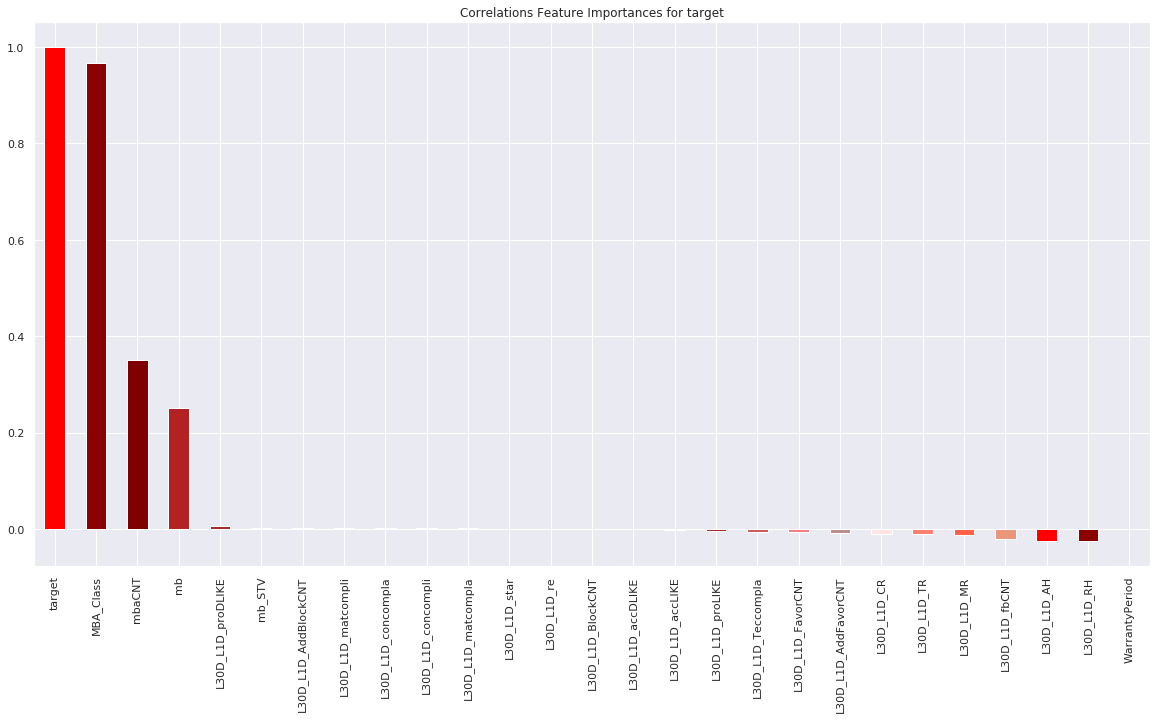

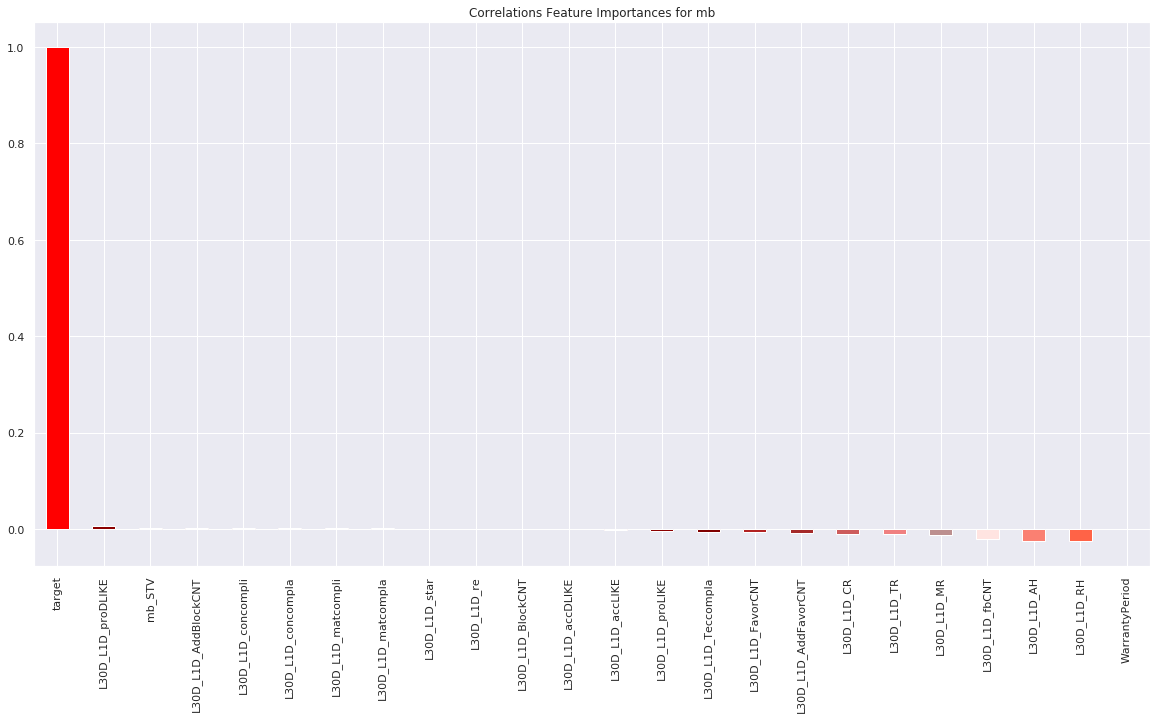

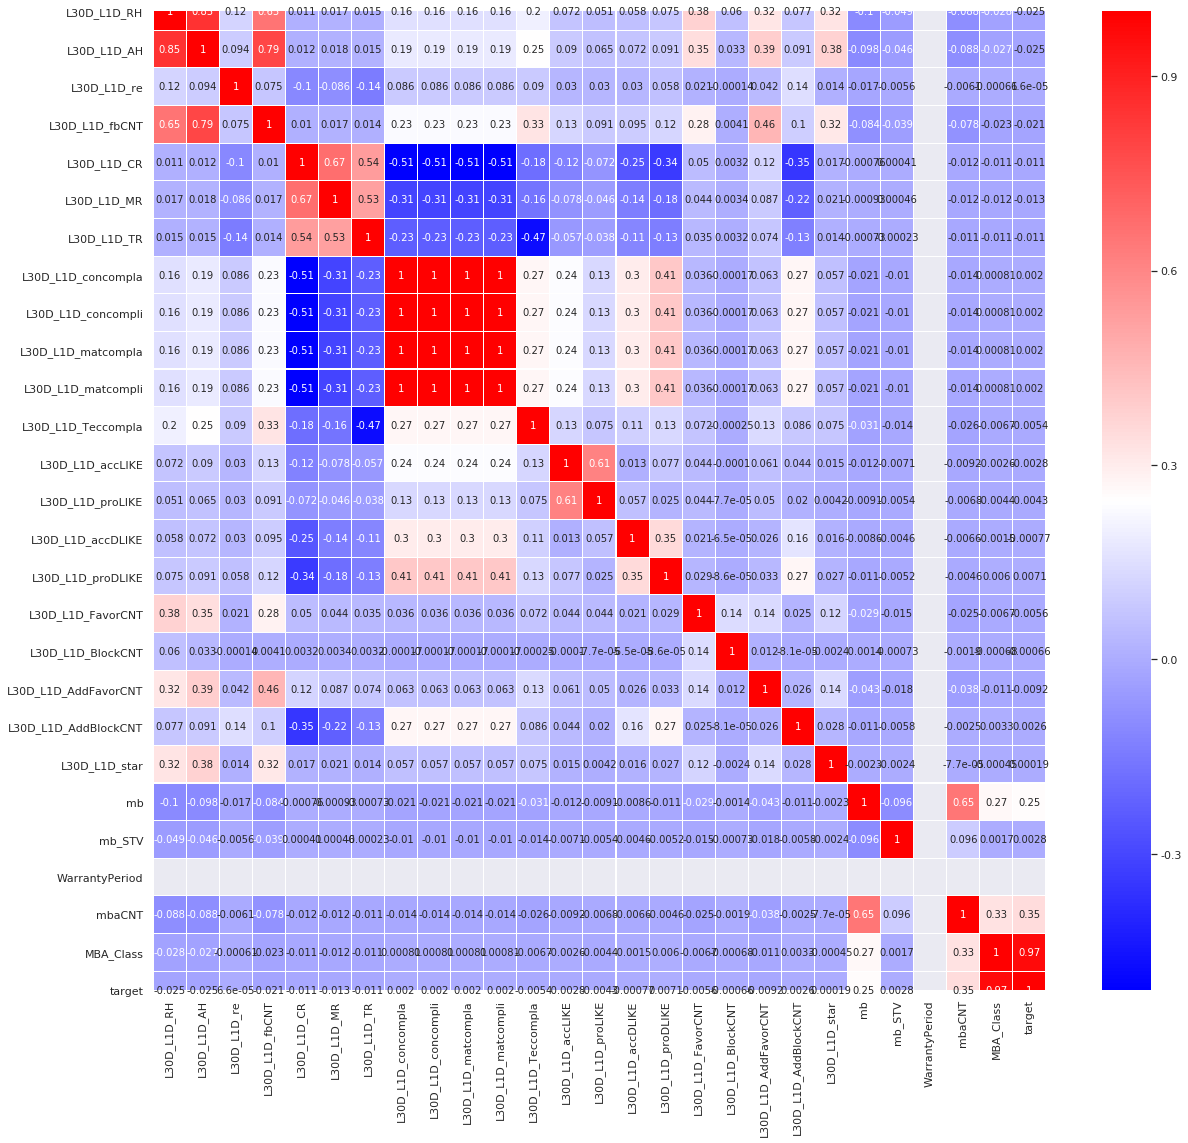

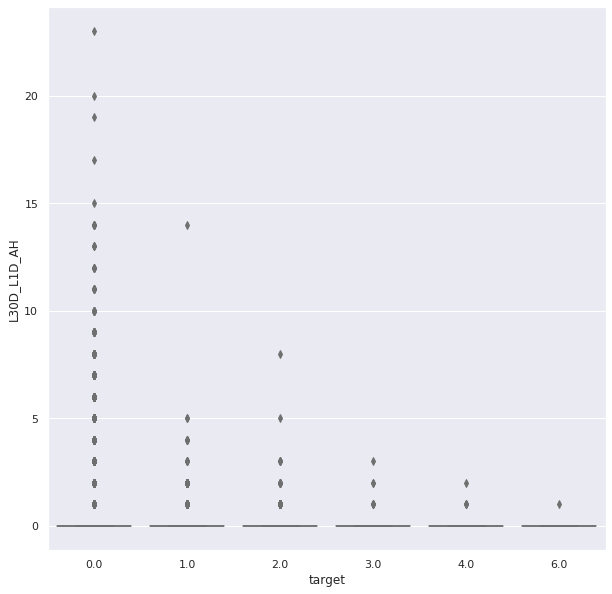

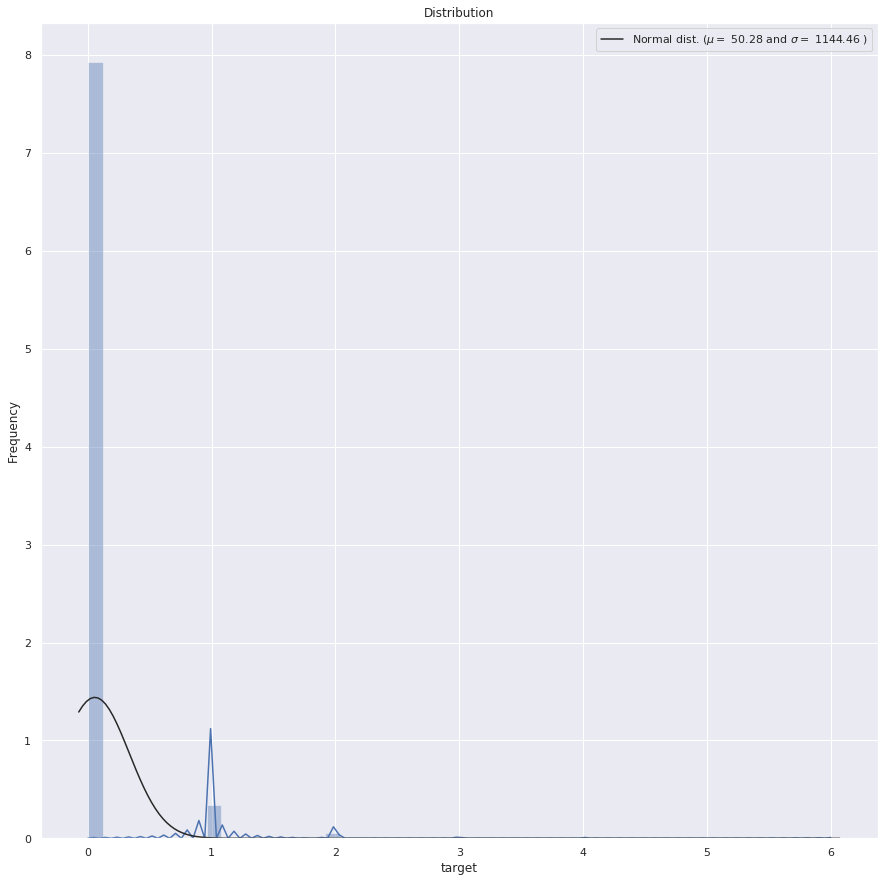

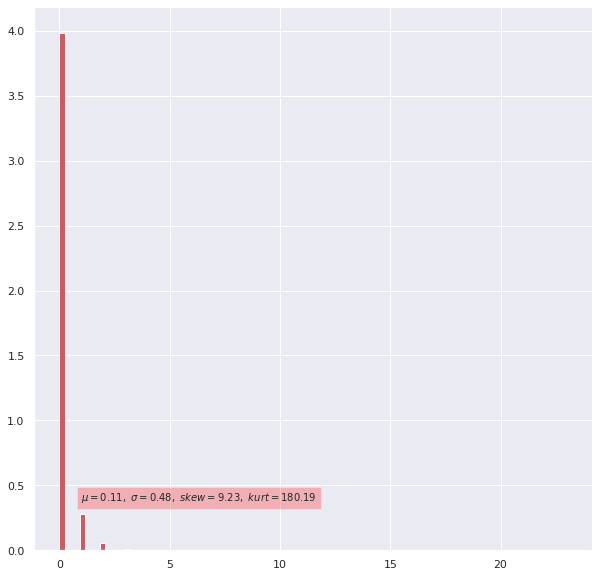

In [145]:
df_L30D_L1D = df[['contract_sn','FDsellingdate','L30D_L1D_RH','L30D_L1D_AH','L30D_L1D_re','L30D_L1D_fbCNT','L30D_L1D_CR','L30D_L1D_MR','L30D_L1D_TR','L30D_L1D_concompla','L30D_L1D_concompli','L30D_L1D_matcompla','L30D_L1D_matcompli','L30D_L1D_Teccompla','L30D_L1D_accLIKE','L30D_L1D_proLIKE','L30D_L1D_accDLIKE','L30D_L1D_proDLIKE','L30D_L1D_FavorCNT','L30D_L1D_BlockCNT','L30D_L1D_AddFavorCNT','L30D_L1D_AddBlockCNT','L30D_L1D_star','product_sdate','mb','mb_STV','mbdate','WarrantyPeriod','mbaCNT','mbadate_First','mbadate_New','MBA_technical','MBA_customer','MBA_Scheduling','MBA_Class','MBA_Service']]
print(df_L30D_L1D.info())


dL30D_L1D = df_L30D_L1D.drop(['contract_sn','FDsellingdate','mbadate_First','mbadate_New','product_sdate','mbdate','MBA_customer','MBA_Scheduling','MBA_technical','MBA_Service'],axis=1)
dL30D_L1D['mbaCNT'] = dL30D_L1D['mbaCNT'].fillna(0)
dL30D_L1D['MBA_Class'] = dL30D_L1D['MBA_Class'].fillna(0)
dL30D_L1D['L30D_L1D_CR'] = dL30D_L1D['L30D_L1D_CR'].fillna(dL30D_L1D['L30D_L1D_CR'].mean())
dL30D_L1D['L30D_L1D_MR'] = dL30D_L1D['L30D_L1D_MR'].fillna(dL30D_L1D['L30D_L1D_MR'].mean())
dL30D_L1D['L30D_L1D_TR'] = dL30D_L1D['L30D_L1D_TR'].fillna(dL30D_L1D['L30D_L1D_TR'].mean())
dL30D_L1D['L30D_L1D_star'] = dL30D_L1D['L30D_L1D_star'].fillna(dL30D_L1D['L30D_L1D_star'].median())
dL30D_L1D['target']=dL30D_L1D['mbaCNT']*dL30D_L1D['MBA_Class']

print(dL30D_L1D.info())


z = np.abs(stats.zscore(dL30D_L1D))
print(z)
Q1 = dL30D_L1D.quantile(0.25)
Q3 = dL30D_L1D.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

redcl=["red","darkred","maroon","firebrick","brown","indianred",
     "lightcoral","rosybrown",'mistyrose','salmon','tomato','darksalmon']

plt.figure(figsize=(20,10))
dL30D_L1D.corr()['target'].sort_values(ascending = False).plot(kind='bar',colors=redcl)
plt.title("Correlations Feature Importances for target")

dL30D_L1D_fix = dL30D_L1D.drop(['mb','MBA_Class','mbaCNT'],axis=1)
plt.figure(figsize=(20,10))
dL30D_L1D_fix.corr()['target'].sort_values(ascending = False).plot(kind='bar',colors=redcl)
plt.title("Correlations Feature Importances for mb")

plt.figure(figsize=(20,18))
sns.heatmap(dL30D_L1D.astype(float).corr(),cmap='bwr',linewidth=0.1,square=False,linecolor='white',annot=True)

plt.figure(figsize=(10,10))
sns.boxplot(x="target", y="L30D_L1D_AH",data=dL30D_L1D, palette="pastel")

plt.figure(figsize=(15,15))
sns.distplot(dL30D_L1D['target'], fit=norm)
(mu, sigma) = norm.fit(dL30D_L1D)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')
plt.ylabel('Frequency')
plt.title('Distribution')

[niu, sigma, skew, kurt] = calc_stat(dL30D_L1D['L30D_L1D_AH'])
#[niu_2, sigma2, skew2, kurt2] = calc_stat(df1D['F1D_AH'])
print (niu, sigma, skew, kurt)
#print (niu_2, sigma2, skew2, kurt2)
info = r'$\mu=%.2f,\ \sigma=%.2f,\ skew=%.2f,\ kurt=%.2f$' %(niu,sigma, skew, kurt) # 標註
#info2 = r'$\mu=%.2f,\ \sigma=%.2f,\ skew=%.2f,\ kurt=%.2f$' %(niu_2,sigma2, skew2, kurt2)
plt.figure(figsize=(10,10))
plt.text(1,0.38,info,bbox=dict(facecolor='red',alpha=0.25))
#plt.text(1,0.35,info2,bbox=dict(facecolor='green',alpha=0.25))
plt.hist(dL30D_L1D['L30D_L1D_AH'],100,normed=True,facecolor='r',alpha=0.9)
#plt.hist(df1D['F1D_AH'],100,normed=True,facecolor='g',alpha=0.8)
plt.grid(True)
plt.show()

## L30D_L3D

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195356 entries, 0 to 195355
Data columns (total 36 columns):
contract_sn             195356 non-null int64
FDsellingdate           195356 non-null object
L30D_L3D_RH             195356 non-null int64
L30D_L3D_AH             195356 non-null int64
L30D_L3D_re             195356 non-null int64
L30D_L3D_fbCNT          195356 non-null int64
L30D_L3D_CR             7973 non-null float64
L30D_L3D_MR             7971 non-null float64
L30D_L3D_TR             7973 non-null float64
L30D_L3D_concompla      195356 non-null int64
L30D_L3D_concompli      195356 non-null int64
L30D_L3D_matcompla      195356 non-null int64
L30D_L3D_matcompli      195356 non-null int64
L30D_L3D_Teccompla      195356 non-null int64
L30D_L3D_accLIKE        195356 non-null int64
L30D_L3D_proLIKE        195356 non-null int64
L30D_L3D_accDLIKE       195356 non-null int64
L30D_L3D_proDLIKE       195356 non-null int64
L30D_L3D_FavorCNT       195356 non-null int64
L30D_L3D_Block

D:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:2315: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd



L30D_L3D_RH            0.000
L30D_L3D_AH            0.000
L30D_L3D_re            0.000
L30D_L3D_fbCNT         0.000
L30D_L3D_CR            0.000
L30D_L3D_MR            0.000
L30D_L3D_TR            0.000
L30D_L3D_concompla     0.000
L30D_L3D_concompli     0.000
L30D_L3D_matcompla     0.000
L30D_L3D_matcompli     0.000
L30D_L3D_Teccompla     0.000
L30D_L3D_accLIKE       0.000
L30D_L3D_proLIKE       0.000
L30D_L3D_accDLIKE      0.000
L30D_L3D_proDLIKE      0.000
L30D_L3D_FavorCNT      0.000
L30D_L3D_BlockCNT      0.000
L30D_L3D_AddFavorCNT   0.000
L30D_L3D_AddBlockCNT   0.000
L30D_L3D_star          0.000
mb                     0.000
mb_STV                 0.000
WarrantyPeriod         0.000
mbaCNT                 1.000
MBA_Class              0.000
target                 0.000
dtype: float64


D:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:203: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  "'colors' is being deprecated. Please use 'color'"
D:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:203: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  "'colors' is being deprecated. Please use 'color'"



 mu = 50.27 and sigma = 1144.46

0.09507258543377219 0.466814841350676 10.24678345573223 216.45216010465649


D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:62: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


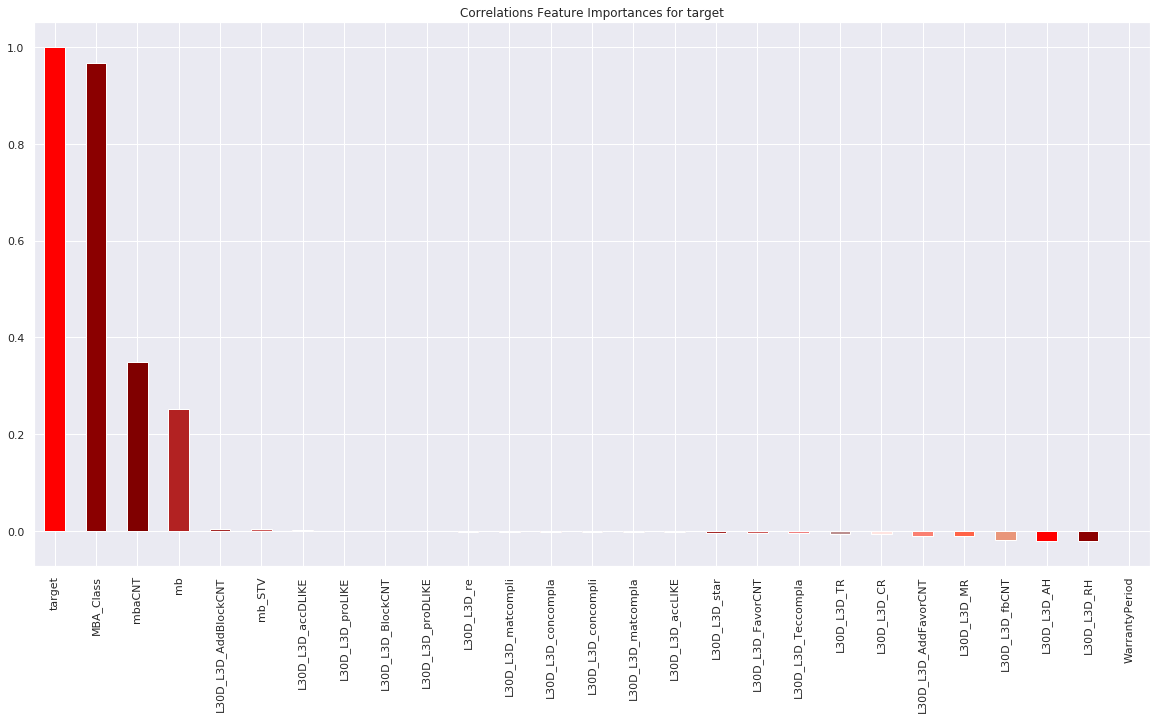

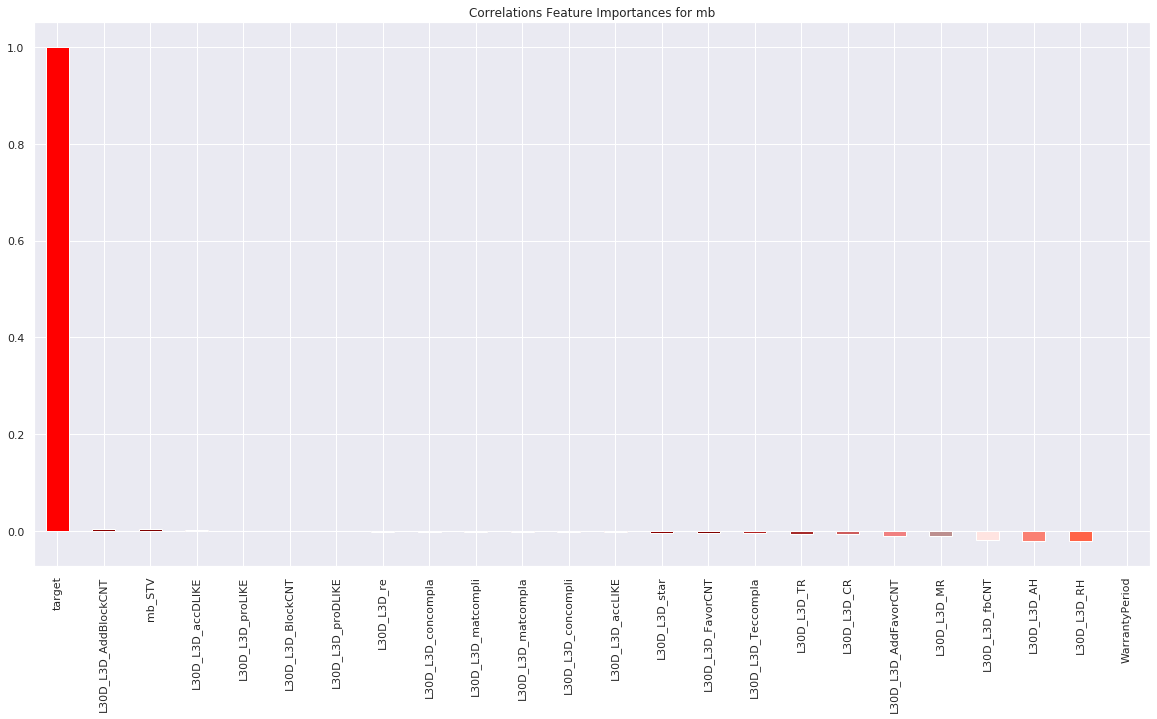

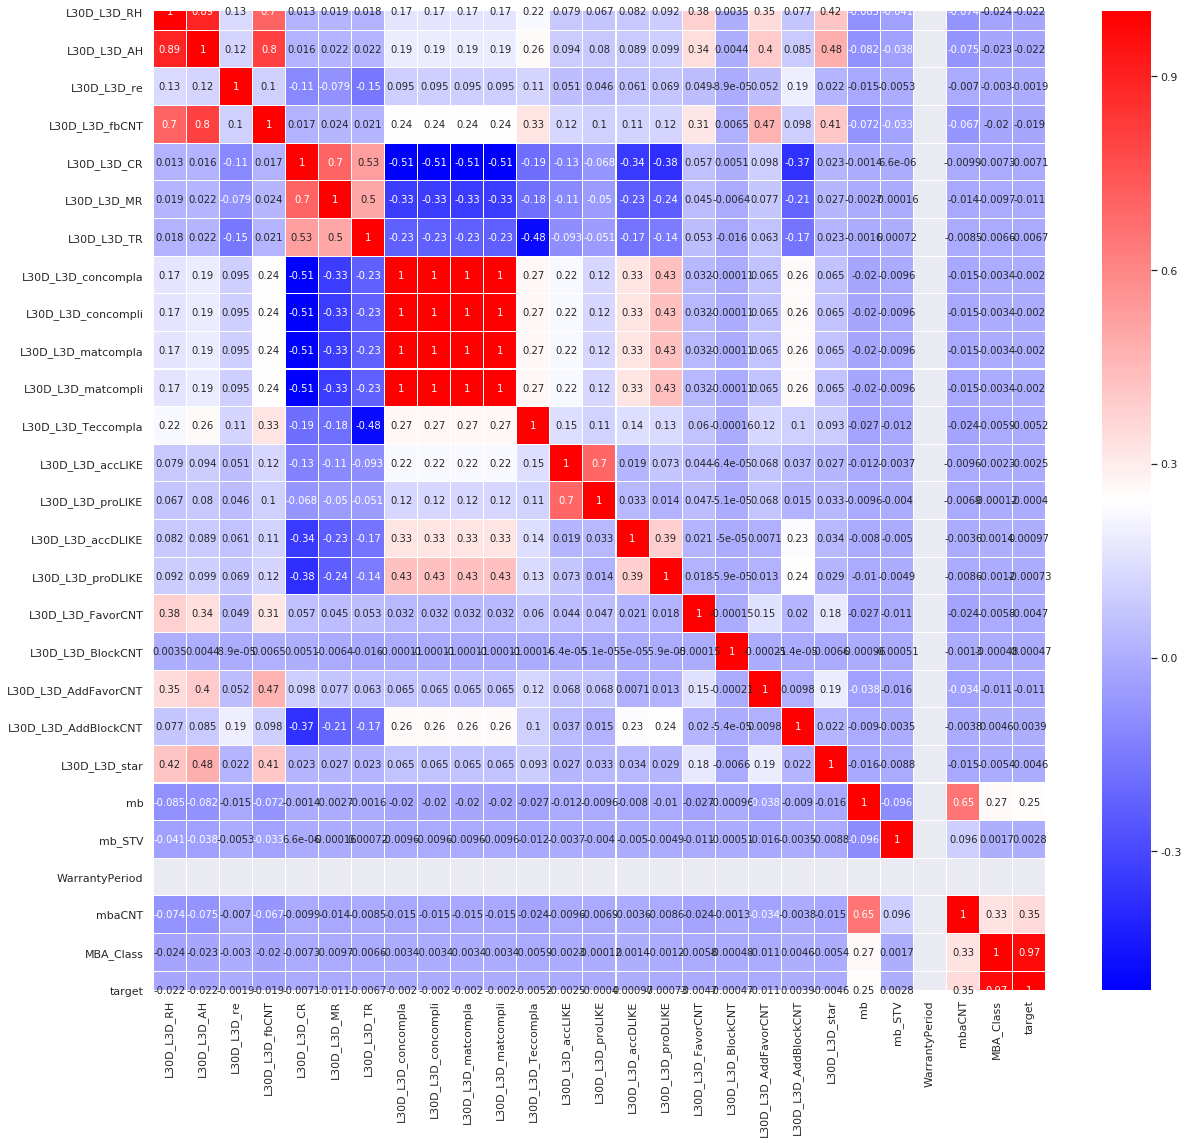

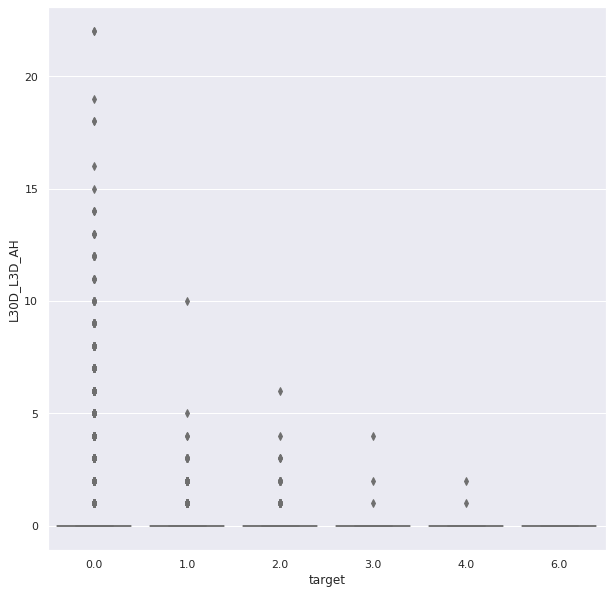

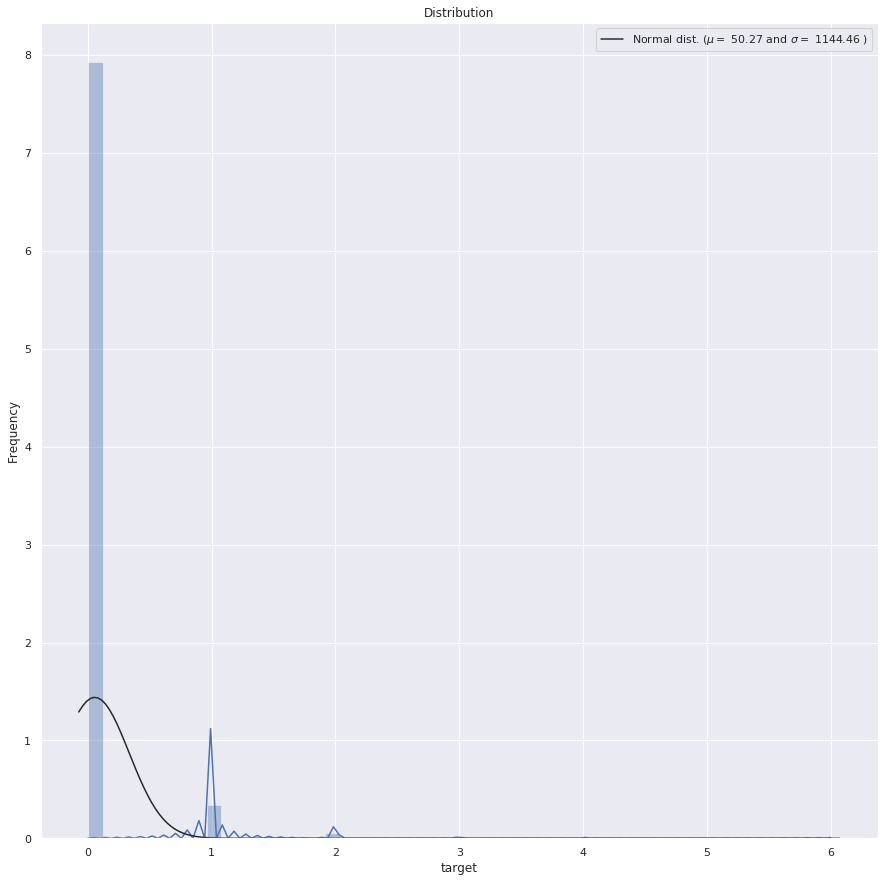

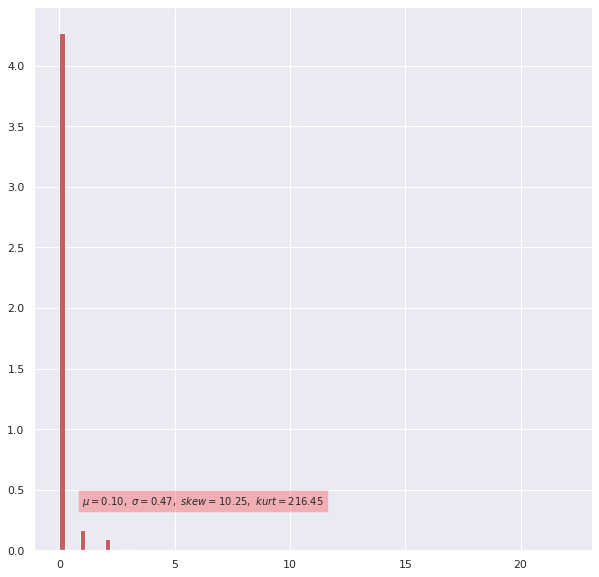

In [132]:
df_L30D_L3D = df[['contract_sn','FDsellingdate','L30D_L3D_RH','L30D_L3D_AH','L30D_L3D_re','L30D_L3D_fbCNT','L30D_L3D_CR','L30D_L3D_MR','L30D_L3D_TR','L30D_L3D_concompla','L30D_L3D_concompli','L30D_L3D_matcompla','L30D_L3D_matcompli','L30D_L3D_Teccompla','L30D_L3D_accLIKE','L30D_L3D_proLIKE','L30D_L3D_accDLIKE','L30D_L3D_proDLIKE','L30D_L3D_FavorCNT','L30D_L3D_BlockCNT','L30D_L3D_AddFavorCNT','L30D_L3D_AddBlockCNT','L30D_L3D_star','product_sdate','mb','mb_STV','mbdate','WarrantyPeriod','mbaCNT','mbadate_First','mbadate_New','MBA_technical','MBA_customer','MBA_Scheduling','MBA_Class','MBA_Service']]
print(df_L30D_L3D.info())
df_L30D_L3D.head()

dL30D_L3D = df_L30D_L3D.drop(['contract_sn','FDsellingdate','mbadate_First','mbadate_New','product_sdate','mbdate','MBA_customer','MBA_Scheduling','MBA_technical','MBA_Service'],axis=1)
dL30D_L3D['mbaCNT'] = dL30D_L3D['mbaCNT'].fillna(0)
dL30D_L3D['MBA_Class'] = dL30D_L3D['MBA_Class'].fillna(0)
dL30D_L3D['L30D_L3D_CR'] = dL30D_L3D['L30D_L3D_CR'].fillna(dL30D_L3D['L30D_L3D_CR'].mean())
dL30D_L3D['L30D_L3D_MR'] = dL30D_L3D['L30D_L3D_MR'].fillna(dL30D_L3D['L30D_L3D_MR'].mean())
dL30D_L3D['L30D_L3D_TR'] = dL30D_L3D['L30D_L3D_TR'].fillna(dL30D_L3D['L30D_L3D_TR'].mean())
dL30D_L3D['L30D_L3D_star'] = dL30D_L3D['L30D_L3D_star'].fillna(dL30D_L3D['L30D_L3D_star'].median())
dL30D_L3D['target']=dL30D_L3D['mbaCNT']*dL30D_L3D['MBA_Class']

print(dL30D_L3D.info())
dL30D_L3D.head()

z = np.abs(stats.zscore(dL30D_L3D))
print(z)
Q1 = dL30D_L3D.quantile(0.25)
Q3 = dL30D_L3D.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

redcl=["red","darkred","maroon","firebrick","brown","indianred",
     "lightcoral","rosybrown",'mistyrose','salmon','tomato','darksalmon']

plt.figure(figsize=(20,10))
dL30D_L3D.corr()['target'].sort_values(ascending = False).plot(kind='bar',colors=redcl)
plt.title("Correlations Feature Importances for target")

redcl=["red","darkred","maroon","firebrick","brown","indianred",
     "lightcoral","rosybrown",'mistyrose','salmon','tomato','darksalmon']

dL30D_L3D_fix = dL30D_L3D.drop(['mb','MBA_Class','mbaCNT'],axis=1)
plt.figure(figsize=(20,10))
dL30D_L3D_fix.corr()['target'].sort_values(ascending = False).plot(kind='bar',colors=redcl)
plt.title("Correlations Feature Importances for mb")

plt.figure(figsize=(20,18))
sns.heatmap(dL30D_L3D.astype(float).corr(),cmap='bwr',linewidth=0.1,square=False,linecolor='white',annot=True)

plt.figure(figsize=(10,10))
sns.boxplot(x="target", y="L30D_L3D_AH",data=dL30D_L3D, palette="pastel")

plt.figure(figsize=(15,15))
sns.distplot(dL30D_L3D['target'], fit=norm)
(mu, sigma) = norm.fit(dL30D_L3D)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')
plt.ylabel('Frequency')
plt.title('Distribution')

[niu, sigma, skew, kurt] = calc_stat(dL30D_L3D['L30D_L3D_AH'])
#[niu_2, sigma2, skew2, kurt2] = calc_stat(df1D['F1D_AH'])
print (niu, sigma, skew, kurt)
#print (niu_2, sigma2, skew2, kurt2)
info = r'$\mu=%.2f,\ \sigma=%.2f,\ skew=%.2f,\ kurt=%.2f$' %(niu,sigma, skew, kurt) # 標註
#info2 = r'$\mu=%.2f,\ \sigma=%.2f,\ skew=%.2f,\ kurt=%.2f$' %(niu_2,sigma2, skew2, kurt2)
plt.figure(figsize=(10,10))
plt.text(1,0.38,info,bbox=dict(facecolor='red',alpha=0.25))
#plt.text(1,0.35,info2,bbox=dict(facecolor='green',alpha=0.25))
plt.hist(dL30D_L3D['L30D_L3D_AH'],100,normed=True,facecolor='r',alpha=0.9)
#plt.hist(df1D['F1D_AH'],100,normed=True,facecolor='g',alpha=0.8)
plt.grid(True)
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195356 entries, 0 to 195355
Data columns (total 36 columns):
contract_sn             195356 non-null int64
FDsellingdate           195356 non-null object
L30D_L7D_RH             195356 non-null int64
L30D_L7D_AH             195356 non-null int64
L30D_L7D_re             195356 non-null int64
L30D_L7D_fbCNT          195356 non-null int64
L30D_L7D_CR             10439 non-null float64
L30D_L7D_MR             10439 non-null float64
L30D_L7D_TR             10439 non-null float64
L30D_L7D_concompla      195356 non-null int64
L30D_L7D_concompli      195356 non-null int64
L30D_L7D_matcompla      195356 non-null int64
L30D_L7D_matcompli      195356 non-null int64
L30D_L7D_Teccompla      195356 non-null int64
L30D_L7D_accLIKE        195356 non-null int64
L30D_L7D_proLIKE        195356 non-null int64
L30D_L7D_accDLIKE       195356 non-null int64
L30D_L7D_proDLIKE       195356 non-null int64
L30D_L7D_FavorCNT       195356 non-null int64
L30D_L7D_Bl

D:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:2315: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd



L30D_L7D_RH            0.000
L30D_L7D_AH            0.000
L30D_L7D_re            0.000
L30D_L7D_fbCNT         0.000
L30D_L7D_CR            0.000
L30D_L7D_MR            0.000
L30D_L7D_TR            0.000
L30D_L7D_concompla     0.000
L30D_L7D_concompli     0.000
L30D_L7D_matcompla     0.000
L30D_L7D_matcompli     0.000
L30D_L7D_Teccompla     0.000
L30D_L7D_accLIKE       0.000
L30D_L7D_proLIKE       0.000
L30D_L7D_accDLIKE      0.000
L30D_L7D_proDLIKE      0.000
L30D_L7D_FavorCNT      0.000
L30D_L7D_BlockCNT      0.000
L30D_L7D_AddFavorCNT   0.000
L30D_L7D_AddBlockCNT   0.000
L30D_L7D_star          0.000
mb                     0.000
mb_STV                 0.000
WarrantyPeriod         0.000
mbaCNT                 1.000
MBA_Class              0.000
target                 0.000
dtype: float64


D:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:203: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  "'colors' is being deprecated. Please use 'color'"
D:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:203: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  "'colors' is being deprecated. Please use 'color'"



 mu = 50.28 and sigma = 1144.46

0.1653187002190872 0.7964634561788895 12.641858820514667 346.4984654170884


D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:62: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


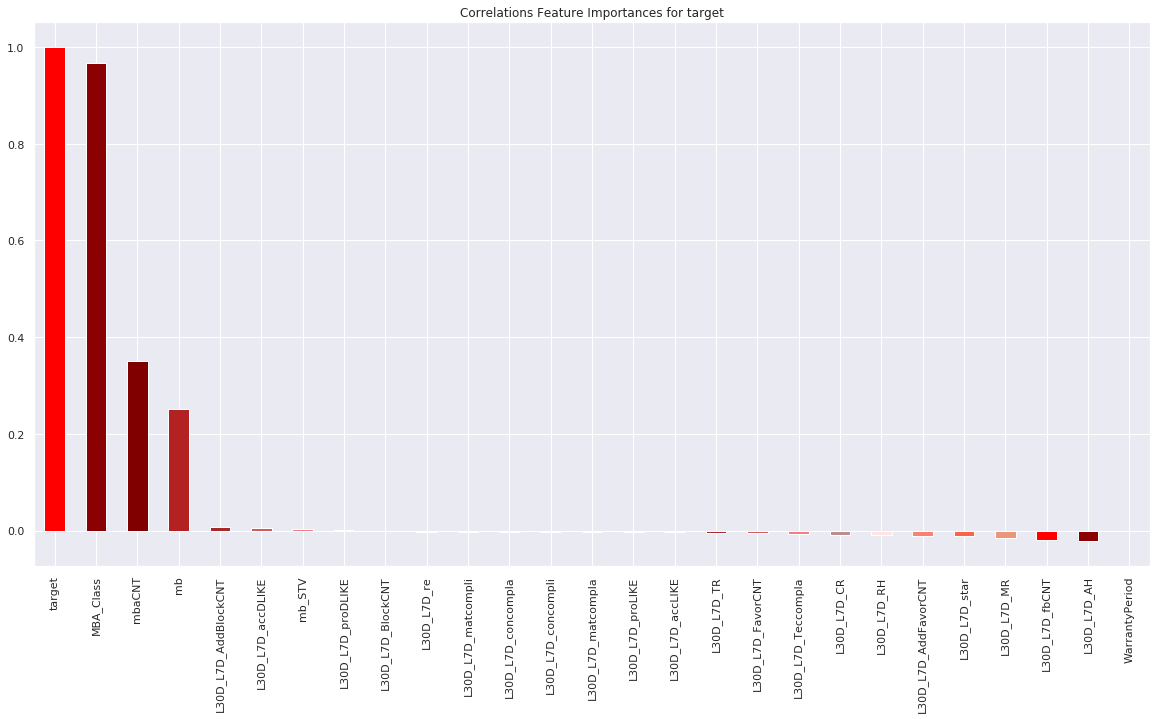

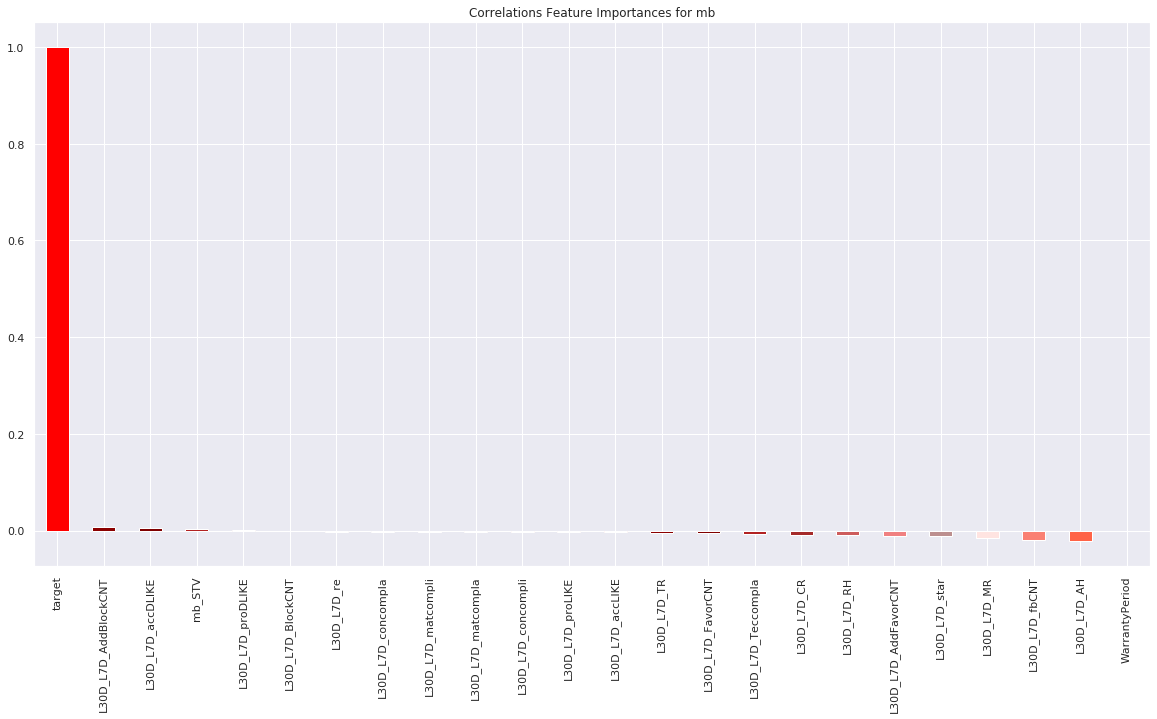

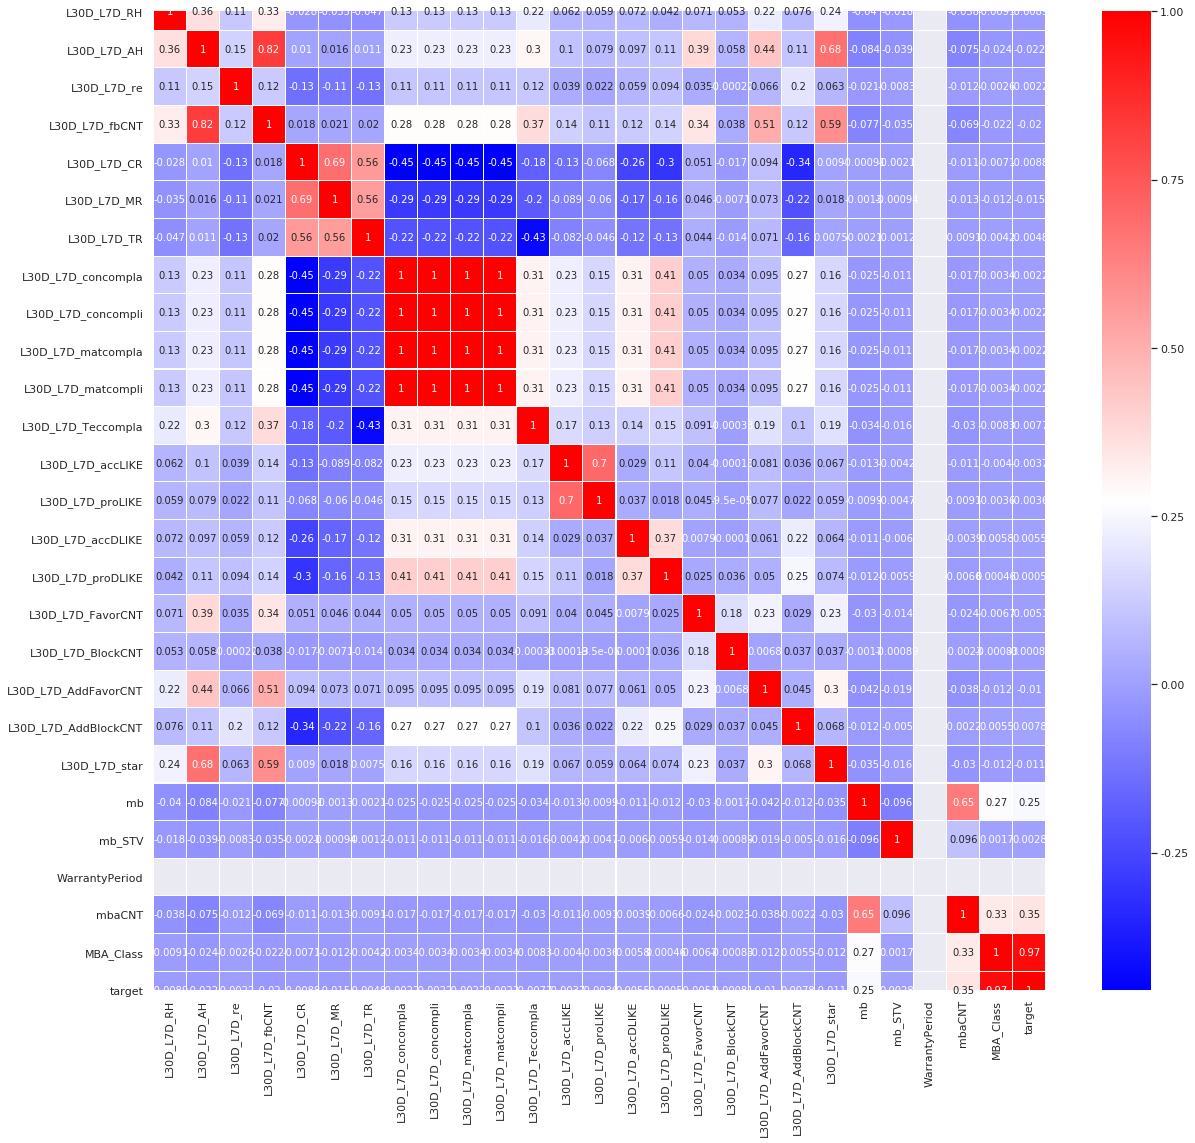

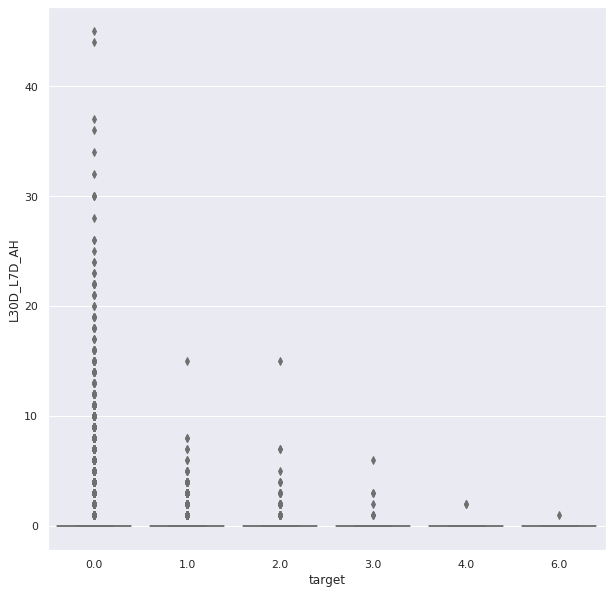

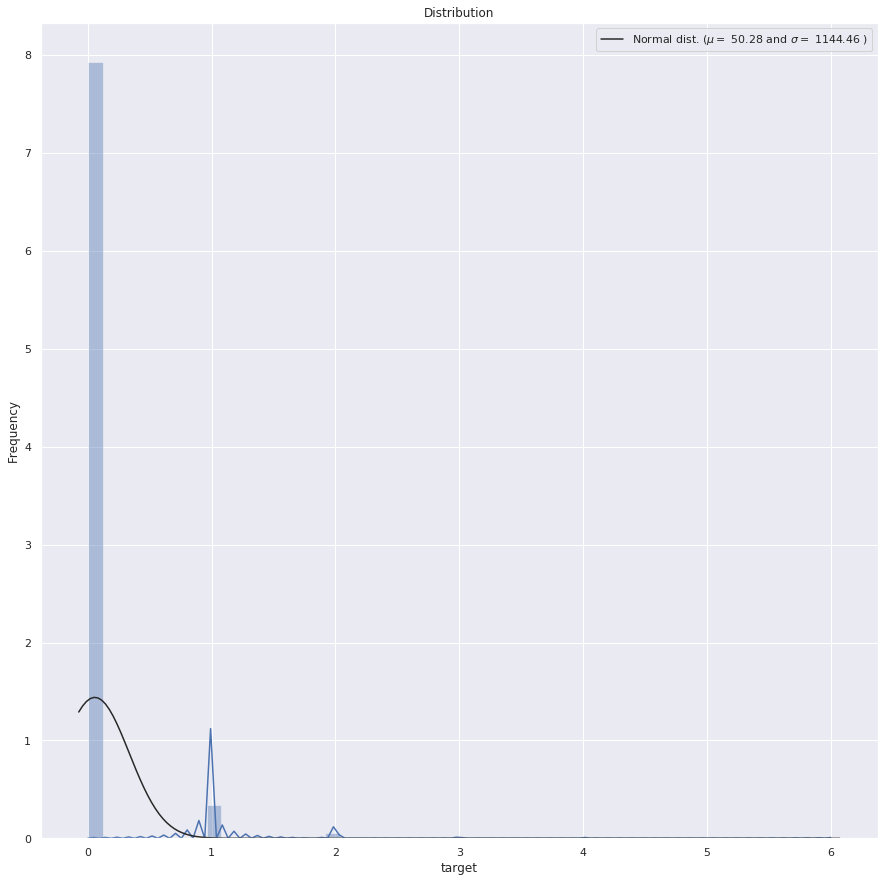

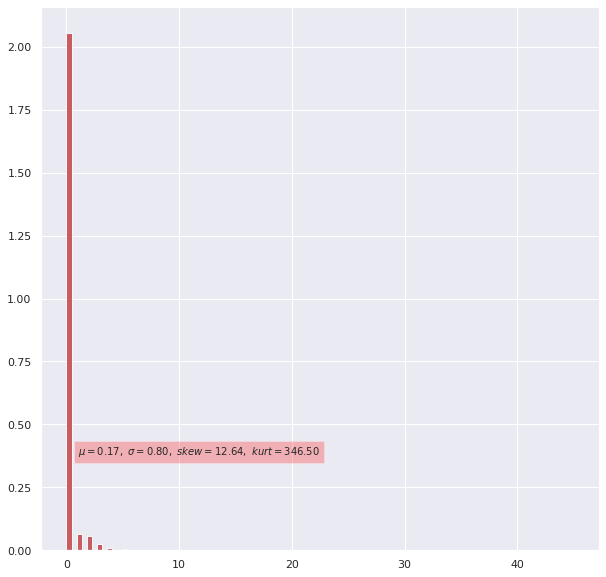

In [133]:
df_L30D_L7D = df[['contract_sn','FDsellingdate','L30D_L7D_RH','L30D_L7D_AH','L30D_L7D_re','L30D_L7D_fbCNT','L30D_L7D_CR','L30D_L7D_MR','L30D_L7D_TR','L30D_L7D_concompla','L30D_L7D_concompli','L30D_L7D_matcompla','L30D_L7D_matcompli','L30D_L7D_Teccompla','L30D_L7D_accLIKE','L30D_L7D_proLIKE','L30D_L7D_accDLIKE','L30D_L7D_proDLIKE','L30D_L7D_FavorCNT','L30D_L7D_BlockCNT','L30D_L7D_AddFavorCNT','L30D_L7D_AddBlockCNT','L30D_L7D_star','product_sdate','mb','mb_STV','mbdate','WarrantyPeriod','mbaCNT','mbadate_First','mbadate_New','MBA_technical','MBA_customer','MBA_Scheduling','MBA_Class','MBA_Service']]
print(df_L30D_L7D.info())
df_L30D_L7D.head()

dL30D_L7D = df_L30D_L7D.drop(['contract_sn','FDsellingdate','mbadate_First','mbadate_New','product_sdate','mbdate','MBA_customer','MBA_Scheduling','MBA_technical','MBA_Service'],axis=1)
dL30D_L7D['mbaCNT'] = dL30D_L7D['mbaCNT'].fillna(0)
dL30D_L7D['MBA_Class'] = dL30D_L7D['MBA_Class'].fillna(0)
dL30D_L7D['L30D_L7D_CR'] = dL30D_L7D['L30D_L7D_CR'].fillna(dL30D_L7D['L30D_L7D_CR'].mean())
dL30D_L7D['L30D_L7D_MR'] = dL30D_L7D['L30D_L7D_MR'].fillna(dL30D_L7D['L30D_L7D_MR'].mean())
dL30D_L7D['L30D_L7D_TR'] = dL30D_L7D['L30D_L7D_TR'].fillna(dL30D_L7D['L30D_L7D_TR'].mean())
dL30D_L7D['L30D_L7D_star'] = dL30D_L7D['L30D_L7D_star'].fillna(dL30D_L7D['L30D_L7D_star'].median())
dL30D_L7D['target']=dL30D_L7D['mbaCNT']*dL30D_L7D['MBA_Class']

print(dL30D_L7D.info())
dL30D_L7D.head()

z = np.abs(stats.zscore(dL30D_L7D))
print(z)
Q1 = dL30D_L7D.quantile(0.25)
Q3 = dL30D_L7D.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

redcl=["red","darkred","maroon","firebrick","brown","indianred",
     "lightcoral","rosybrown",'mistyrose','salmon','tomato','darksalmon']

plt.figure(figsize=(20,10))
dL30D_L7D.corr()['target'].sort_values(ascending = False).plot(kind='bar',colors=redcl)
plt.title("Correlations Feature Importances for target")

redcl=["red","darkred","maroon","firebrick","brown","indianred",
     "lightcoral","rosybrown",'mistyrose','salmon','tomato','darksalmon']

dL30D_L7D_fix = dL30D_L7D.drop(['mb','MBA_Class','mbaCNT'],axis=1)
plt.figure(figsize=(20,10))
dL30D_L7D_fix.corr()['target'].sort_values(ascending = False).plot(kind='bar',colors=redcl)
plt.title("Correlations Feature Importances for mb")

plt.figure(figsize=(20,18))
sns.heatmap(dL30D_L7D.astype(float).corr(),cmap='bwr',linewidth=0.1,square=False,linecolor='white',annot=True)

plt.figure(figsize=(10,10))
sns.boxplot(x="target", y="L30D_L7D_AH",data=dL30D_L7D, palette="pastel")

plt.figure(figsize=(15,15))
sns.distplot(dL30D_L7D['target'], fit=norm)
(mu, sigma) = norm.fit(dL30D_L7D)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')
plt.ylabel('Frequency')
plt.title('Distribution')

[niu, sigma, skew, kurt] = calc_stat(dL30D_L7D['L30D_L7D_AH'])
#[niu_2, sigma2, skew2, kurt2] = calc_stat(df1D['F1D_AH'])
print (niu, sigma, skew, kurt)
#print (niu_2, sigma2, skew2, kurt2)
info = r'$\mu=%.2f,\ \sigma=%.2f,\ skew=%.2f,\ kurt=%.2f$' %(niu,sigma, skew, kurt) # 標註
#info2 = r'$\mu=%.2f,\ \sigma=%.2f,\ skew=%.2f,\ kurt=%.2f$' %(niu_2,sigma2, skew2, kurt2)
plt.figure(figsize=(10,10))
plt.text(1,0.38,info,bbox=dict(facecolor='red',alpha=0.25))
#plt.text(1,0.35,info2,bbox=dict(facecolor='green',alpha=0.25))
plt.hist(dL30D_L7D['L30D_L7D_AH'],100,normed=True,facecolor='r',alpha=0.9)
#plt.hist(df1D['F1D_AH'],100,normed=True,facecolor='g',alpha=0.8)
plt.grid(True)
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195356 entries, 0 to 195355
Data columns (total 36 columns):
contract_sn              195356 non-null int64
FDsellingdate            195356 non-null object
L30D_L14D_RH             195356 non-null int64
L30D_L14D_AH             195356 non-null int64
L30D_L14D_re             195356 non-null int64
L30D_L14D_fbCNT          195356 non-null int64
L30D_L14D_CR             12840 non-null float64
L30D_L14D_MR             12836 non-null float64
L30D_L14D_TR             12840 non-null float64
L30D_L14D_concompla      195356 non-null int64
L30D_L14D_concompli      195356 non-null int64
L30D_L14D_matcompla      195356 non-null int64
L30D_L14D_matcompli      195356 non-null int64
L30D_L14D_Teccompla      195356 non-null int64
L30D_L14D_accLIKE        195356 non-null int64
L30D_L14D_proLIKE        195356 non-null int64
L30D_L14D_accDLIKE       195356 non-null int64
L30D_L14D_proDLIKE       195356 non-null int64
L30D_L14D_FavorCNT       195356 non-nul

D:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:2315: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


[[       nan 0.21645458 0.07694472 ... 0.58175072 0.21297599 0.2060443 ]
 [       nan 0.21645458 0.07694472 ... 1.41910305 0.21297599 0.2060443 ]
 [       nan 0.21645458 0.07694472 ... 1.41910305 0.21297599 0.2060443 ]
 ...
 [       nan 0.21645458 0.07694472 ... 0.58175072 0.21297599 0.2060443 ]
 [       nan 0.21645458 0.07694472 ... 0.58175072 0.21297599 0.2060443 ]
 [       nan 0.21645458 0.07694472 ... 0.58175072 0.21297599 0.2060443 ]]
L30D_L14D_RH            0.000
L30D_L14D_AH            0.000
L30D_L14D_re            0.000
L30D_L14D_fbCNT         0.000
L30D_L14D_CR            0.000
L30D_L14D_MR            0.000
L30D_L14D_TR            0.000
L30D_L14D_concompla     0.000
L30D_L14D_concompli     0.000
L30D_L14D_matcompla     0.000
L30D_L14D_matcompli     0.000
L30D_L14D_Teccompla     0.000
L30D_L14D_accLIKE       0.000
L30D_L14D_proLIKE       0.000
L30D_L14D_accDLIKE      0.000
L30D_L14D_proDLIKE      0.000
L30D_L14D_FavorCNT      0.000
L30D_L14D_BlockCNT      0.000
L30D_L14D_AddFav

D:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:203: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  "'colors' is being deprecated. Please use 'color'"
D:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:203: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  "'colors' is being deprecated. Please use 'color'"



 mu = 50.39 and sigma = 1144.45

0.28940498372202544 1.337024083447262 13.058973295444055 360.13431082838576


D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:62: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


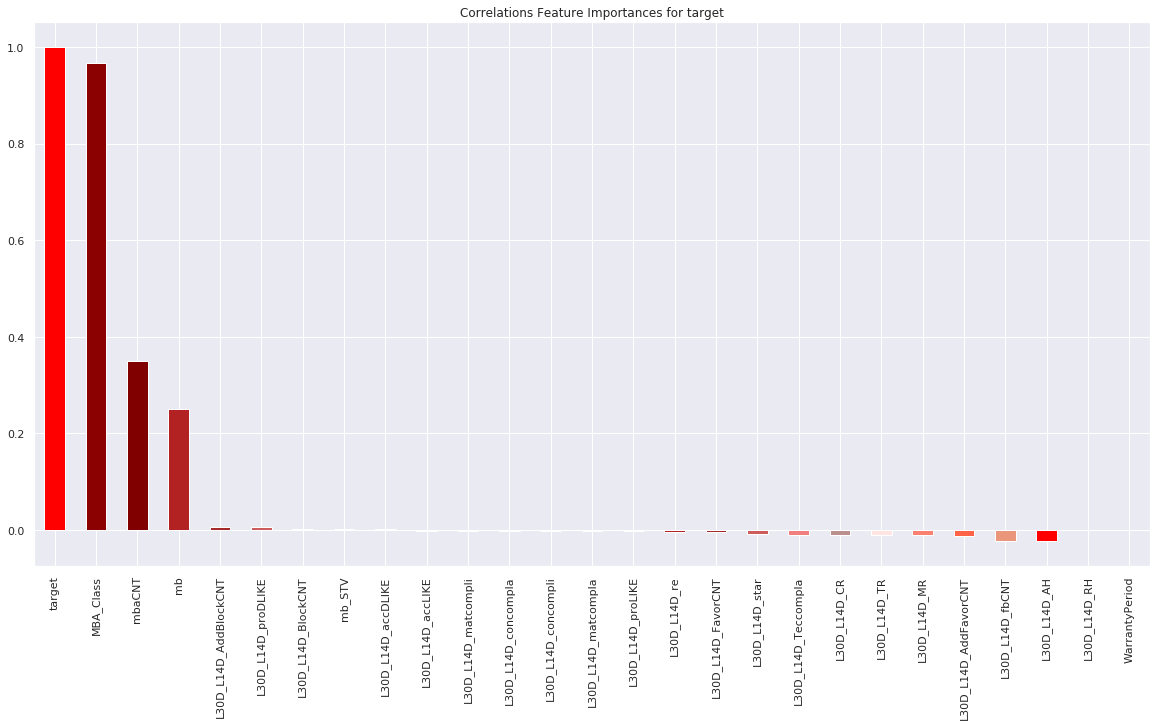

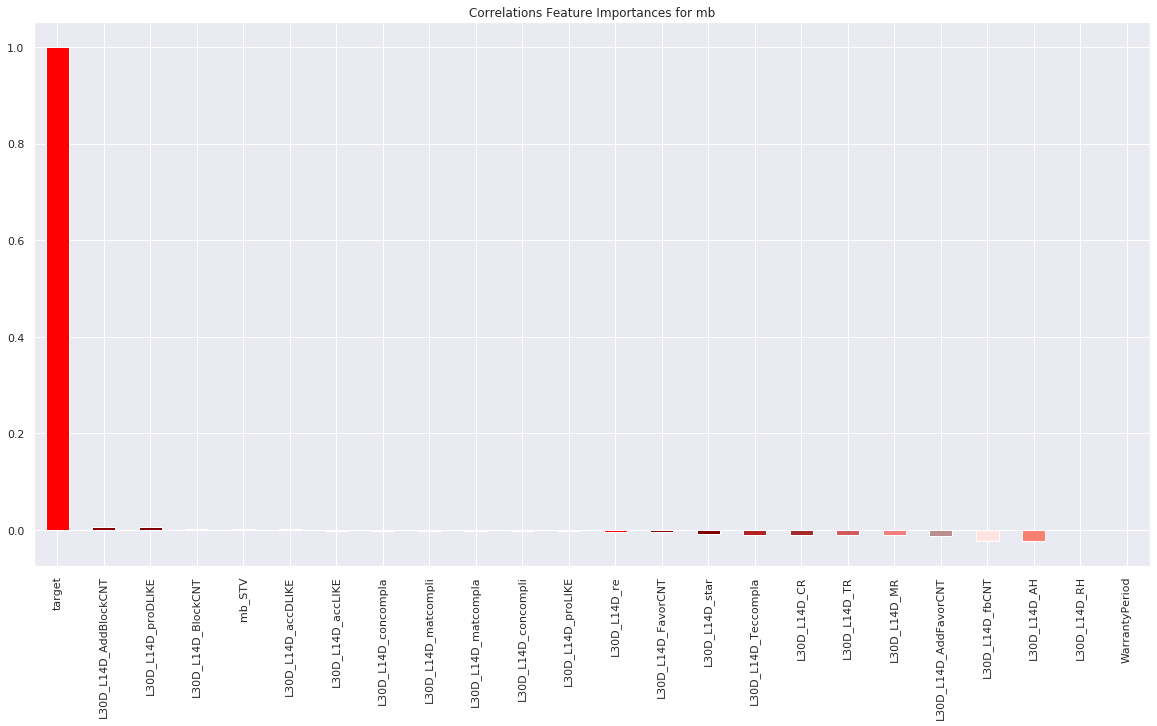

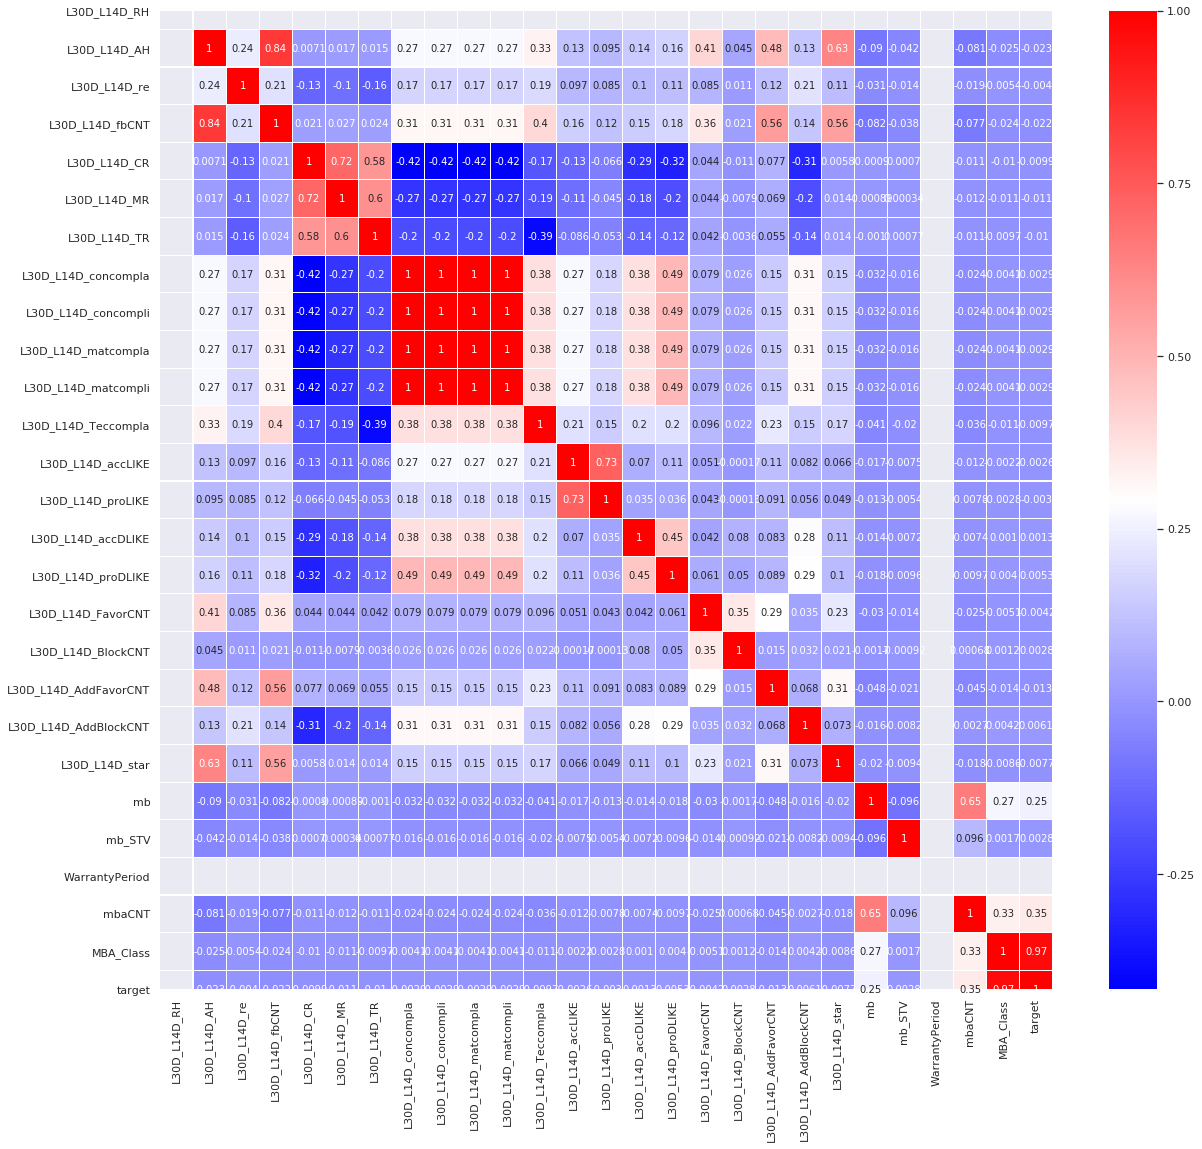

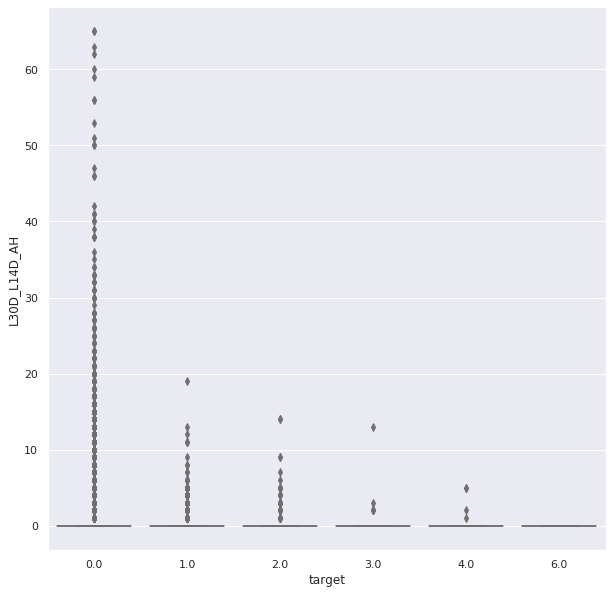

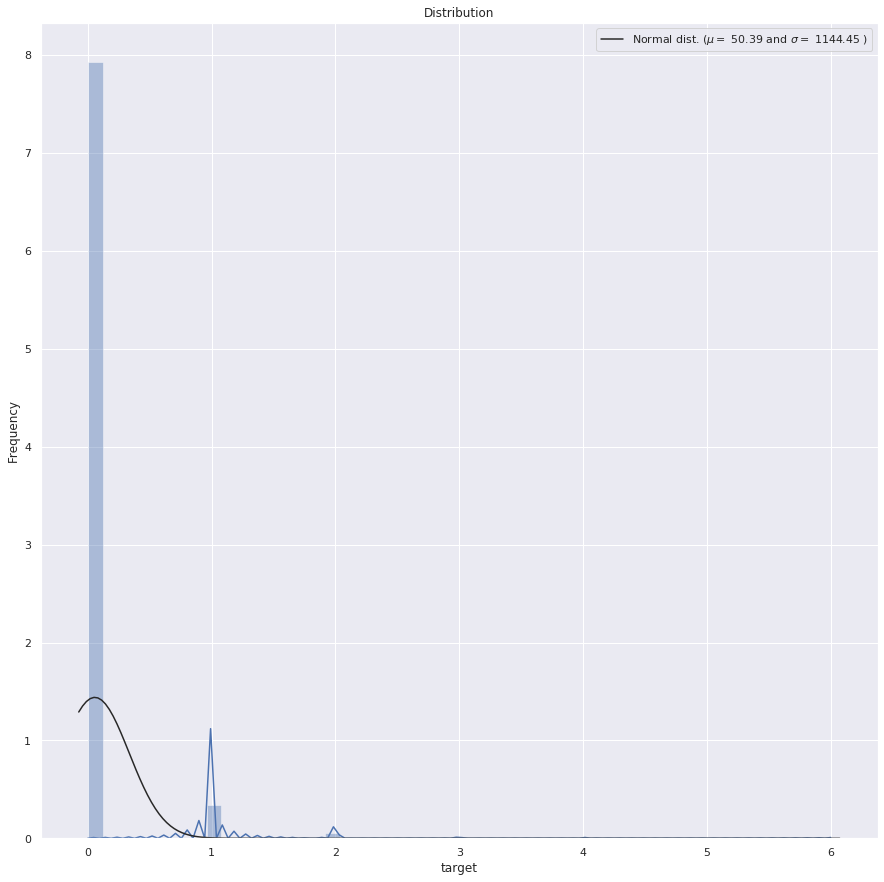

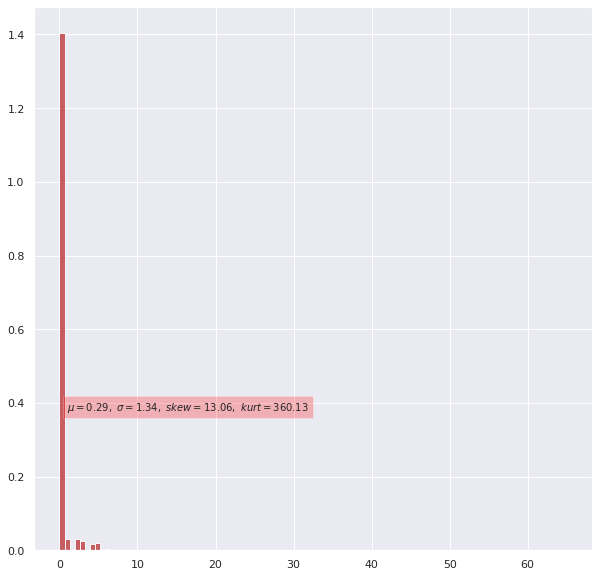

In [134]:
df_L30D_L14D = df[['contract_sn','FDsellingdate','L30D_L14D_RH','L30D_L14D_AH','L30D_L14D_re','L30D_L14D_fbCNT','L30D_L14D_CR','L30D_L14D_MR','L30D_L14D_TR','L30D_L14D_concompla','L30D_L14D_concompli','L30D_L14D_matcompla','L30D_L14D_matcompli','L30D_L14D_Teccompla','L30D_L14D_accLIKE','L30D_L14D_proLIKE','L30D_L14D_accDLIKE','L30D_L14D_proDLIKE','L30D_L14D_FavorCNT','L30D_L14D_BlockCNT','L30D_L14D_AddFavorCNT','L30D_L14D_AddBlockCNT','L30D_L14D_star','product_sdate','mb','mb_STV','mbdate','WarrantyPeriod','mbaCNT','mbadate_First','mbadate_New','MBA_technical','MBA_customer','MBA_Scheduling','MBA_Class','MBA_Service']]

df_L30D_L14D.head()

dL30D_L14D = df_L30D_L14D.drop(['contract_sn','FDsellingdate','mbadate_First','mbadate_New','product_sdate','mbdate','MBA_customer','MBA_Scheduling','MBA_technical','MBA_Service'],axis=1)
dL30D_L14D['mbaCNT'] = dL30D_L14D['mbaCNT'].fillna(0)
dL30D_L14D['MBA_Class'] = dL30D_L14D['MBA_Class'].fillna(0)
dL30D_L14D['L30D_L14D_CR'] = dL30D_L14D['L30D_L14D_CR'].fillna(dL30D_L14D['L30D_L14D_CR'].mean())
dL30D_L14D['L30D_L14D_MR'] = dL30D_L14D['L30D_L14D_MR'].fillna(dL30D_L14D['L30D_L14D_MR'].mean())
dL30D_L14D['L30D_L14D_TR'] = dL30D_L14D['L30D_L14D_TR'].fillna(dL30D_L14D['L30D_L14D_TR'].mean())
dL30D_L14D['L30D_L14D_star'] = dL30D_L14D['L30D_L14D_star'].fillna(dL30D_L14D['L30D_L14D_star'].median())
dL30D_L14D['target']=dL30D_L14D['mbaCNT']*dL30D_L14D['MBA_Class']

print(dL30D_L14D.info())


z = np.abs(stats.zscore(dL30D_L14D))
print(z)
Q1 = dL30D_L14D.quantile(0.25)
Q3 = dL30D_L14D.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

redcl=["red","darkred","maroon","firebrick","brown","indianred",
     "lightcoral","rosybrown",'mistyrose','salmon','tomato','darksalmon']

plt.figure(figsize=(20,10))
dL30D_L14D.corr()['target'].sort_values(ascending = False).plot(kind='bar',colors=redcl)
plt.title("Correlations Feature Importances for target")

redcl=["red","darkred","maroon","firebrick","brown","indianred",
     "lightcoral","rosybrown",'mistyrose','salmon','tomato','darksalmon']

dL30D_L14D_fix = dL30D_L14D.drop(['mb','MBA_Class','mbaCNT'],axis=1)
plt.figure(figsize=(20,10))
dL30D_L14D_fix.corr()['target'].sort_values(ascending = False).plot(kind='bar',colors=redcl)
plt.title("Correlations Feature Importances for mb")

plt.figure(figsize=(20,18))
sns.heatmap(dL30D_L14D.astype(float).corr(),cmap='bwr',linewidth=0.1,square=False,linecolor='white',annot=True)

plt.figure(figsize=(10,10))
sns.boxplot(x="target", y="L30D_L14D_AH",data=dL30D_L14D, palette="pastel")

plt.figure(figsize=(15,15))
sns.distplot(dL30D_L14D['target'], fit=norm)
(mu, sigma) = norm.fit(dL30D_L14D)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')
plt.ylabel('Frequency')
plt.title('Distribution')

[niu, sigma, skew, kurt] = calc_stat(dL30D_L14D['L30D_L14D_AH'])
#[niu_2, sigma2, skew2, kurt2] = calc_stat(df1D['F1D_AH'])
print (niu, sigma, skew, kurt)
#print (niu_2, sigma2, skew2, kurt2)
info = r'$\mu=%.2f,\ \sigma=%.2f,\ skew=%.2f,\ kurt=%.2f$' %(niu,sigma, skew, kurt) # 標註
#info2 = r'$\mu=%.2f,\ \sigma=%.2f,\ skew=%.2f,\ kurt=%.2f$' %(niu_2,sigma2, skew2, kurt2)
plt.figure(figsize=(10,10))
plt.text(1,0.38,info,bbox=dict(facecolor='red',alpha=0.25))
#plt.text(1,0.35,info2,bbox=dict(facecolor='green',alpha=0.25))
plt.hist(dL30D_L14D['L30D_L14D_AH'],100,normed=True,facecolor='r',alpha=0.9)
#plt.hist(df1D['F1D_AH'],100,normed=True,facecolor='g',alpha=0.8)
plt.grid(True)
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195356 entries, 0 to 195355
Data columns (total 36 columns):
contract_sn              195356 non-null int64
FDsellingdate            195356 non-null object
L30D_L30D_RH             195356 non-null int64
L30D_L30D_AH             195356 non-null int64
L30D_L30D_re             195356 non-null int64
L30D_L30D_fbCNT          195356 non-null int64
L30D_L30D_CR             6057 non-null float64
L30D_L30D_MR             6055 non-null float64
L30D_L30D_TR             6057 non-null float64
L30D_L30D_concompla      195356 non-null int64
L30D_L30D_concompli      195356 non-null int64
L30D_L30D_matcompla      195356 non-null int64
L30D_L30D_matcompli      195356 non-null int64
L30D_L30D_Teccompla      195356 non-null int64
L30D_L30D_accLIKE        195356 non-null int64
L30D_L30D_proLIKE        195356 non-null int64
L30D_L30D_accDLIKE       195356 non-null int64
L30D_L30D_proDLIKE       195356 non-null int64
L30D_L30D_FavorCNT       195356 non-null i

D:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:2315: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


[[0.10438987 0.17221552 0.03178149 ... 0.58175072 0.21297599 0.2060443 ]
 [0.10438987 0.17221552 0.03178149 ... 1.41910305 0.21297599 0.2060443 ]
 [0.10438987 0.17221552 0.03178149 ... 1.41910305 0.21297599 0.2060443 ]
 ...
 [0.10438987 0.17221552 0.03178149 ... 0.58175072 0.21297599 0.2060443 ]
 [0.10438987 0.17221552 0.03178149 ... 0.58175072 0.21297599 0.2060443 ]
 [0.10438987 0.17221552 0.03178149 ... 0.58175072 0.21297599 0.2060443 ]]
L30D_L30D_RH            0.000
L30D_L30D_AH            0.000
L30D_L30D_re            0.000
L30D_L30D_fbCNT         0.000
L30D_L30D_CR            0.000
L30D_L30D_MR            0.000
L30D_L30D_TR            0.000
L30D_L30D_concompla     0.000
L30D_L30D_concompli     0.000
L30D_L30D_matcompla     0.000
L30D_L30D_matcompli     0.000
L30D_L30D_Teccompla     0.000
L30D_L30D_accLIKE       0.000
L30D_L30D_proLIKE       0.000
L30D_L30D_accDLIKE      0.000
L30D_L30D_proDLIKE      0.000
L30D_L30D_FavorCNT      0.000
L30D_L30D_BlockCNT      0.000
L30D_L30D_AddFav

D:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:203: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  "'colors' is being deprecated. Please use 'color'"
D:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:203: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  "'colors' is being deprecated. Please use 'color'"



 mu = 50.27 and sigma = 1144.46

0.07301541800610169 0.42397698757426905 13.380837135672838 370.0957900842766


D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:62: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


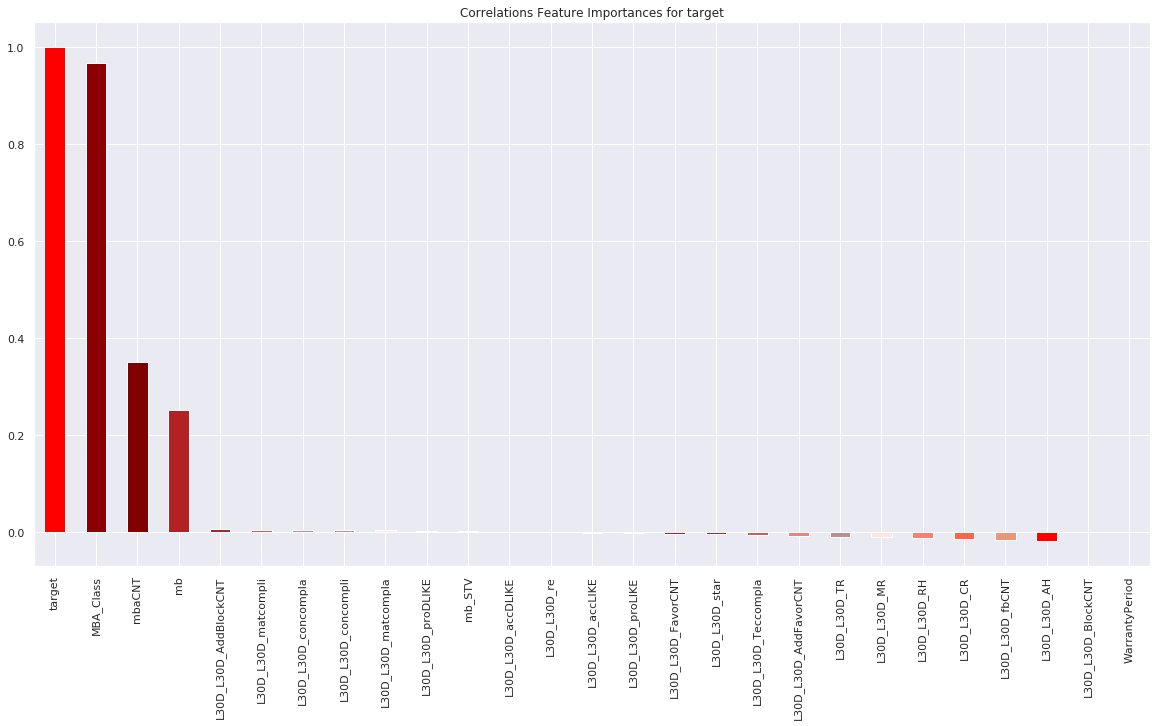

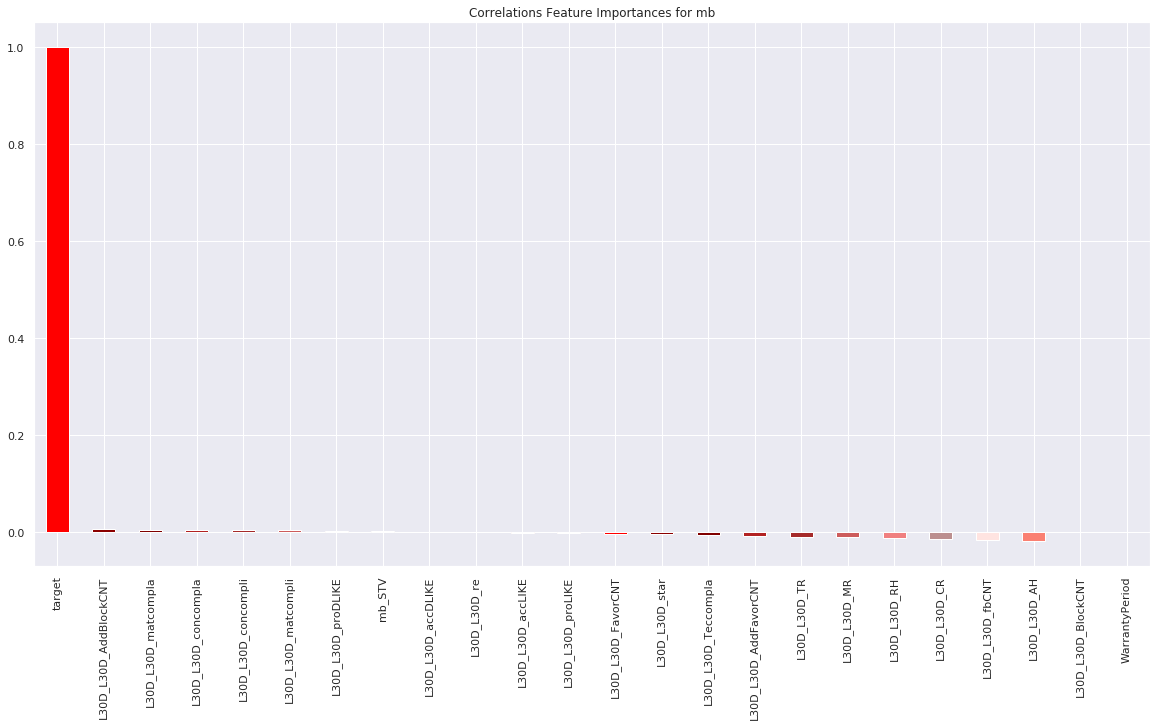

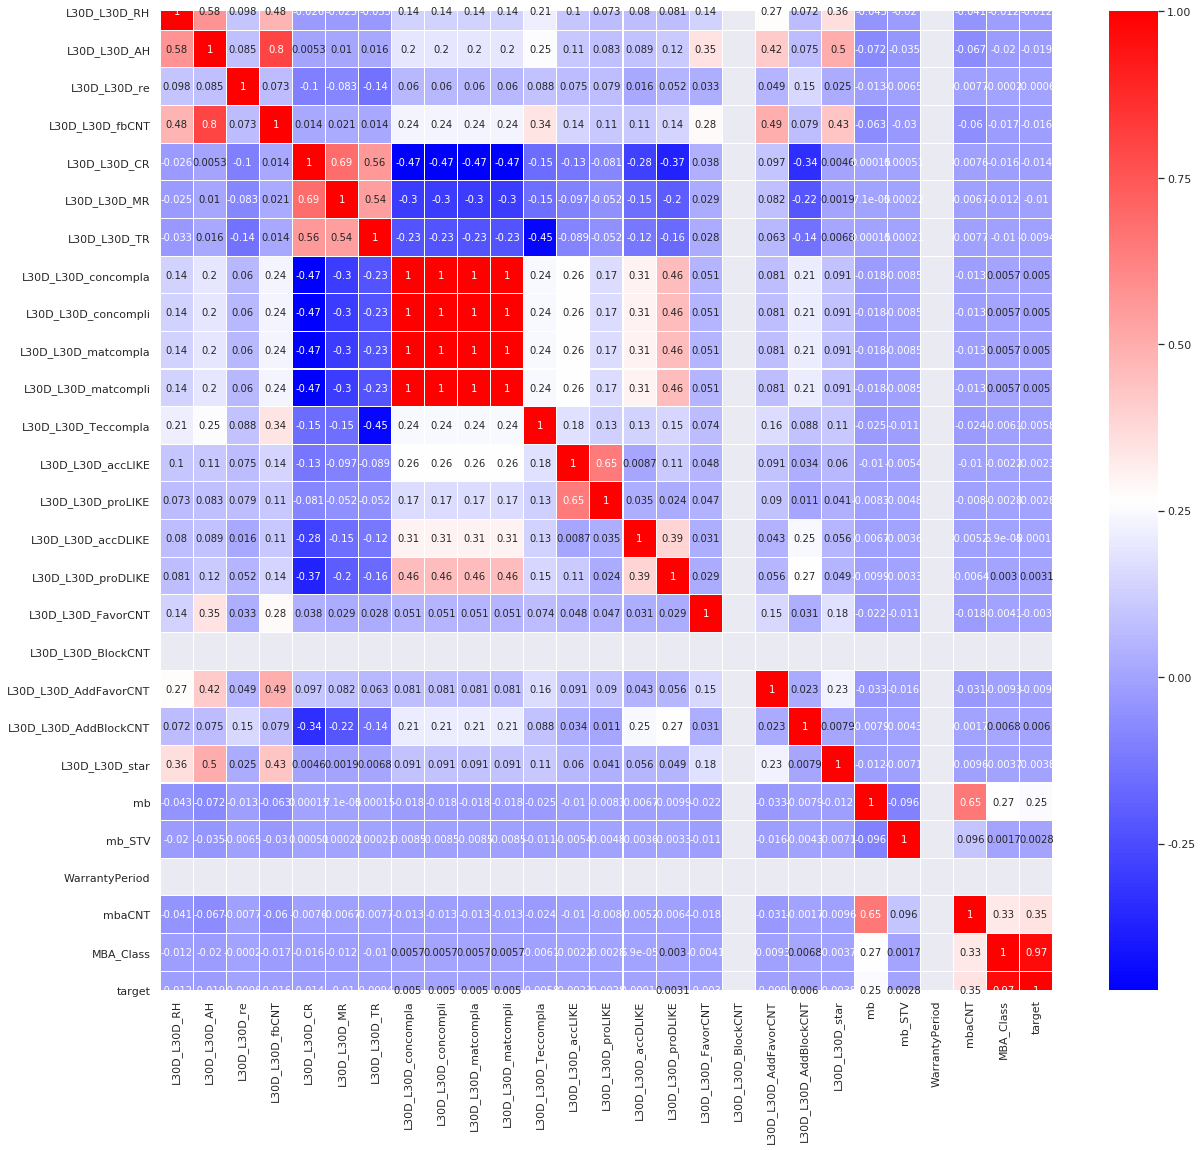

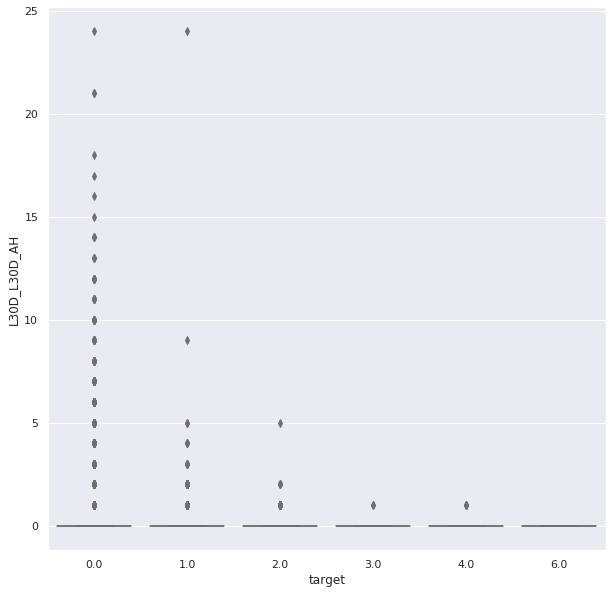

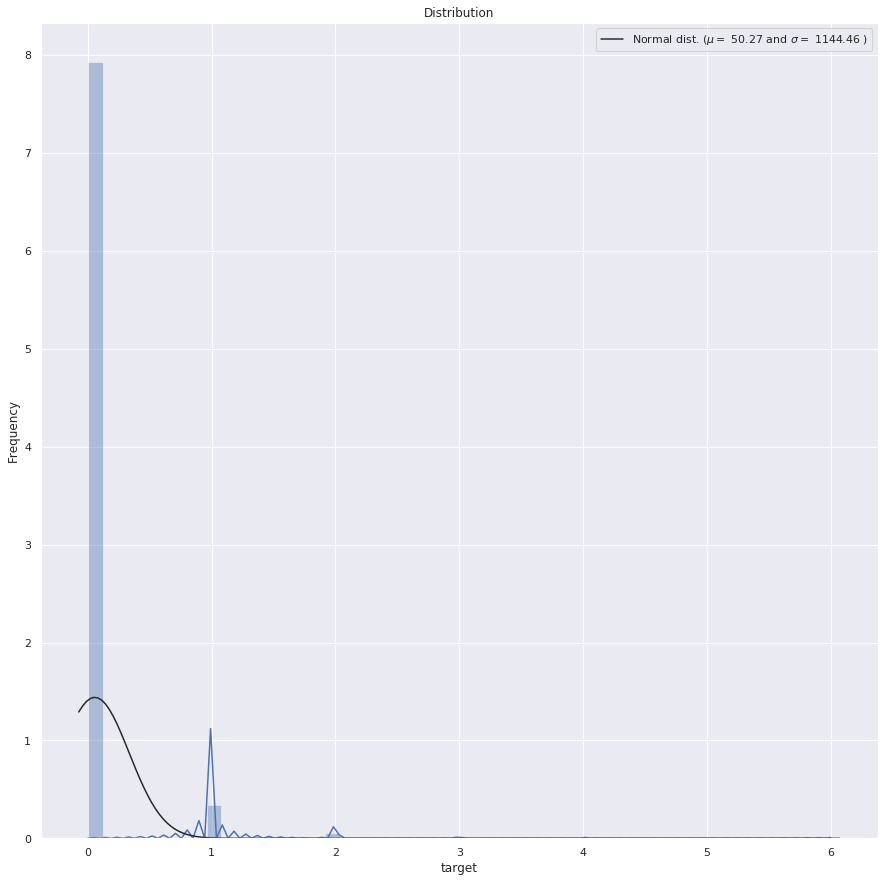

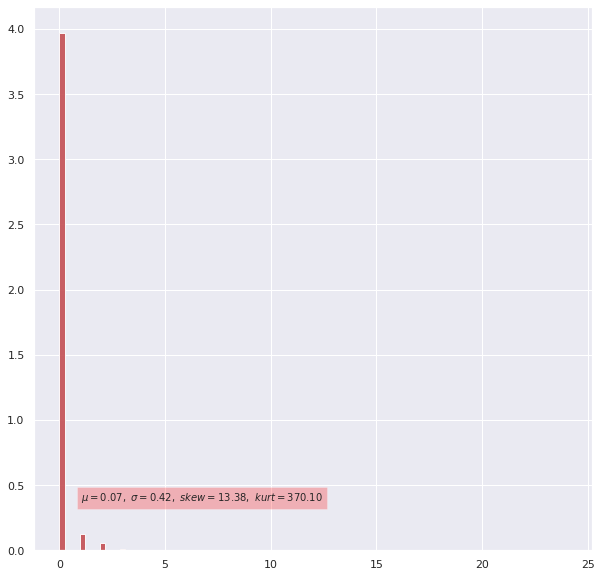

In [136]:
df_L30D_L30D = df[['contract_sn','FDsellingdate','L30D_L30D_RH','L30D_L30D_AH','L30D_L30D_re','L30D_L30D_fbCNT','L30D_L30D_CR','L30D_L30D_MR','L30D_L30D_TR','L30D_L30D_concompla','L30D_L30D_concompli','L30D_L30D_matcompla','L30D_L30D_matcompli','L30D_L30D_Teccompla','L30D_L30D_accLIKE','L30D_L30D_proLIKE','L30D_L30D_accDLIKE','L30D_L30D_proDLIKE','L30D_L30D_FavorCNT','L30D_L30D_BlockCNT','L30D_L30D_AddFavorCNT','L30D_L30D_AddBlockCNT','L30D_L30D_star','product_sdate','mb','mb_STV','mbdate','WarrantyPeriod','mbaCNT','mbadate_First','mbadate_New','MBA_technical','MBA_customer','MBA_Scheduling','MBA_Class','MBA_Service']]
print(df_L30D_L30D.info())
df_L30D_L30D.head()

dL30D_L30D = df_L30D_L30D.drop(['contract_sn','FDsellingdate','mbadate_First','mbadate_New','product_sdate','mbdate','MBA_customer','MBA_Scheduling','MBA_technical','MBA_Service'],axis=1)
dL30D_L30D['mbaCNT'] = dL30D_L30D['mbaCNT'].fillna(0)
dL30D_L30D['MBA_Class'] = dL30D_L30D['MBA_Class'].fillna(0)
dL30D_L30D['L30D_L30D_CR'] = dL30D_L30D['L30D_L30D_CR'].fillna(dL30D_L30D['L30D_L30D_CR'].mean())
dL30D_L30D['L30D_L30D_MR'] = dL30D_L30D['L30D_L30D_MR'].fillna(dL30D_L30D['L30D_L30D_MR'].mean())
dL30D_L30D['L30D_L30D_TR'] = dL30D_L30D['L30D_L30D_TR'].fillna(dL30D_L30D['L30D_L30D_TR'].mean())
dL30D_L30D['L30D_L30D_star'] = dL30D_L30D['L30D_L30D_star'].fillna(dL30D_L30D['L30D_L30D_star'].median())
dL30D_L30D['target']=dL30D_L30D['mbaCNT']*dL30D_L30D['MBA_Class']

print(dL30D_L30D.info())
dL30D_L30D.head()

z = np.abs(stats.zscore(dL30D_L30D))
print(z)
Q1 = dL30D_L30D.quantile(0.25)
Q3 = dL30D_L30D.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

redcl=["red","darkred","maroon","firebrick","brown","indianred",
     "lightcoral","rosybrown",'mistyrose','salmon','tomato','darksalmon']

plt.figure(figsize=(20,10))
dL30D_L30D.corr()['target'].sort_values(ascending = False).plot(kind='bar',colors=redcl)
plt.title("Correlations Feature Importances for target")

redcl=["red","darkred","maroon","firebrick","brown","indianred",
     "lightcoral","rosybrown",'mistyrose','salmon','tomato','darksalmon']

dL30D_L30D_fix = dL30D_L30D.drop(['mb','MBA_Class','mbaCNT'],axis=1)
plt.figure(figsize=(20,10))
dL30D_L30D_fix.corr()['target'].sort_values(ascending = False).plot(kind='bar',colors=redcl)
plt.title("Correlations Feature Importances for mb")

plt.figure(figsize=(20,18))
sns.heatmap(dL30D_L30D.astype(float).corr(),cmap='bwr',linewidth=0.1,square=False,linecolor='white',annot=True)

plt.figure(figsize=(10,10))
sns.boxplot(x="target", y="L30D_L30D_AH",data=dL30D_L30D, palette="pastel")

plt.figure(figsize=(15,15))
sns.distplot(dL30D_L30D['target'], fit=norm)
(mu, sigma) = norm.fit(dL30D_L30D)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')
plt.ylabel('Frequency')
plt.title('Distribution')

[niu, sigma, skew, kurt] = calc_stat(dL30D_L30D['L30D_L30D_AH'])
#[niu_2, sigma2, skew2, kurt2] = calc_stat(df1D['F1D_AH'])
print (niu, sigma, skew, kurt)
#print (niu_2, sigma2, skew2, kurt2)
info = r'$\mu=%.2f,\ \sigma=%.2f,\ skew=%.2f,\ kurt=%.2f$' %(niu,sigma, skew, kurt) # 標註
#info2 = r'$\mu=%.2f,\ \sigma=%.2f,\ skew=%.2f,\ kurt=%.2f$' %(niu_2,sigma2, skew2, kurt2)
plt.figure(figsize=(10,10))
plt.text(1,0.38,info,bbox=dict(facecolor='red',alpha=0.25))
#plt.text(1,0.35,info2,bbox=dict(facecolor='green',alpha=0.25))
plt.hist(dL30D_L30D['L30D_L30D_AH'],100,normed=True,facecolor='r',alpha=0.9)
#plt.hist(df1D['F1D_AH'],100,normed=True,facecolor='g',alpha=0.8)
plt.grid(True)
plt.show()

In [204]:
df['MBA_technical'].value_counts()

0.000    51676
1.000     1048
2.000      140
3.000       36
4.000        8
6.000        4
Name: MBA_technical, dtype: int64

# Summary

In [216]:
df_sum = df[['F1D_RH','F1D_AH','F1D_re','F1D_fbCNT','F1D_CR','F1D_MR','F1D_TR','F1D_concompla','F1D_Teccompla','F1D_accLIKE','F1D_proLIKE','F1D_accDLIKE','F1D_proDLIKE','F1D_FavorCNT','F1D_BlockCNT','F1D_AddFavorCNT','F1D_AddBlockCNT','F1D_star','F7D_RH','F7D_AH','F7D_re','F7D_fbCNT','F7D_CR','F7D_MR','F7D_TR','F7D_concompla','F7D_Teccompla','F7D_accLIKE','F7D_proLIKE','F7D_accDLIKE','F7D_proDLIKE','F7D_FavorCNT','F7D_BlockCNT','F7D_AddFavorCNT','F7D_AddBlockCNT','F7D_star','F14D_RH','F14D_AH','F14D_re','F14D_fbCNT','F14D_CR','F14D_MR','F14D_TR','F14D_concompla','F14D_Teccompla','F14D_accLIKE','F14D_proLIKE','F14D_accDLIKE','F14D_proDLIKE','F14D_FavorCNT','F14D_BlockCNT','F14D_AddFavorCNT','F14D_AddBlockCNT','F14D_star','F30D_RH','F30D_AH','F30D_re','F30D_fbCNT','F30D_CR','F30D_MR','F30D_TR','F30D_concompla','F30D_Teccompla','F30D_accLIKE','F30D_proLIKE','F30D_accDLIKE','F30D_proDLIKE','F30D_FavorCNT','F30D_BlockCNT','F30D_AddFavorCNT','F30D_AddBlockCNT','F30D_star','L30D_L3D_RH','L30D_L3D_AH','L30D_L3D_re','L30D_L3D_fbCNT','L30D_L3D_CR','L30D_L3D_MR','L30D_L3D_TR','L30D_L3D_concompla','L30D_L3D_Teccompla','L30D_L3D_accLIKE','L30D_L3D_proLIKE','L30D_L3D_accDLIKE','L30D_L3D_proDLIKE','L30D_L3D_FavorCNT','L30D_L3D_BlockCNT','L30D_L3D_AddFavorCNT','L30D_L3D_AddBlockCNT','L30D_L3D_star','L30D_L14D_RH','L30D_L14D_AH','L30D_L14D_re','L30D_L14D_fbCNT','L30D_L14D_CR','L30D_L14D_MR','L30D_L14D_TR','L30D_L14D_concompla','L30D_L14D_Teccompla','L30D_L14D_accLIKE','L30D_L14D_proLIKE','L30D_L14D_accDLIKE','L30D_L14D_proDLIKE','L30D_L14D_FavorCNT','L30D_L14D_BlockCNT','L30D_L14D_AddFavorCNT','L30D_L14D_AddBlockCNT','L30D_L14D_star','mb','mb_STV','mbaCNT','MBA_technical','MBA_customer','MBA_Scheduling','MBA_Class','MBA_Service']]
df_sum.head()

F1D_RH  F1D_AH  F1D_re  F1D_fbCNT  F1D_CR  F1D_MR  F1D_TR  F1D_concompla  \
0       0       0       0          0     nan     nan     nan              0   
1       1       1       0          0     nan     nan     nan              0   
2       0       0       0          0     nan     nan     nan              0   
3      22      19       0         13   9.231   9.231   9.000              2   
4       1       1       0          1  10.000   9.000   9.000              0   

   F1D_Teccompla  F1D_accLIKE  F1D_proLIKE  F1D_accDLIKE  F1D_proDLIKE  \
0              0            0            0             0             0   
1              0            0            0             0             0   
2              0            0            0             0             0   
3              2            0            0             0             0   
4              0            0            0             0             0   

   F1D_FavorCNT  F1D_BlockCNT  F1D_AddFavorCNT  F1D_AddBlockCNT  F1D_star  \
0             0             0                0                0       nan   
1             0             0                0                0       nan   
2             0             0                0                0       nan   
3             0             0                3                0     3.000   
4             0             0                1                0       nan   

   F7D_RH  F7D_AH  F7D_re  F7D_fbCNT  F7D_CR  F7D_MR  F7D_TR  F7D_concompla  \
0       3       3       0          2  10.000  10.000  10.000              0   
1       4       4       0          4   9.250  10.000   9.250              1   
2       1       1       0          1   9.000   9.000   8.000              0   
3      24      14       0         10   9.000   9.000   8.900              0   
4       6       6       0          6   9.667   9.833   9.833              1   

   F7D_Teccompla  F7D_accLIKE  F7D_proLIKE  F7D_accDLIKE  F7D_proDLIKE  \
0              0            0            0             0             0   
1              1            0            0             0             0   
2              0            0            0             0             0   
3              0            0            0             0             0   
4              0            1            0             0             0   

   F7D_FavorCNT  F7D_BlockCNT  F7D_AddFavorCNT  F7D_AddBlockCNT  F7D_star  \
0             0             0                2                0       nan   
1             1             0                3                0    13.000   
2             0             0                0                0       nan   
3             0             0                0                0    10.000   
4             2             0                4                0     5.000   

   F14D_RH  F14D_AH  F14D_re  F14D_fbCNT  F14D_CR  F14D_MR  F14D_TR  \
0        7        7        0           5   10.000   10.000    9.800   
1        2        2        0           2    9.000    9.500    8.000   
2        0        0        0           0      nan      nan      nan   
3       18        9        0           4    9.000    9.000    8.750   
4        6        6        0           6   10.000   10.000   10.000   

   F14D_concompla  F14D_Teccompla  F14D_accLIKE  F14D_proLIKE  F14D_accDLIKE  \
0               0               0             0             0              0   
1               1               1             0             0              0   
2               0               0             0             0              0   
3               0               0             0             0              0   
4               0               0             0             0              0   

   F14D_proDLIKE  F14D_FavorCNT  F14D_BlockCNT  F14D_AddFavorCNT  \
0              0              0              0                 2   
1              0              0              0                 0   
2              0              0              0                 0   
3              0              1              0           

In [217]:
df_sum['mbaCNT'] = df_sum['mbaCNT'].fillna(0)
df_sum['MBA_Class'] = df_sum['MBA_Class'].fillna(0)
df_sum['MBA_technical'] = df_sum['MBA_technical'].fillna(0)
df_sum['MBA_customer'] = df_sum['MBA_customer'].fillna(0)
df_sum['MBA_Scheduling'] = df_sum['MBA_Scheduling'].fillna(0)
df_sum['MBA_Service'] = df_sum['MBA_Service'].fillna(0)
df_sum.head()

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

F1D_RH  F1D_AH  F1D_re  F1D_fbCNT  F1D_CR  F1D_MR  F1D_TR  F1D_concompla  \
0       0       0       0          0     nan     nan     nan              0   
1       1       1       0          0     nan     nan     nan              0   
2       0       0       0          0     nan     nan     nan              0   
3      22      19       0         13   9.231   9.231   9.000              2   
4       1       1       0          1  10.000   9.000   9.000              0   

   F1D_Teccompla  F1D_accLIKE  F1D_proLIKE  F1D_accDLIKE  F1D_proDLIKE  \
0              0            0            0             0             0   
1              0            0            0             0             0   
2              0            0            0             0             0   
3              2            0            0             0             0   
4              0            0            0             0             0   

   F1D_FavorCNT  F1D_BlockCNT  F1D_AddFavorCNT  F1D_AddBlockCNT  F1D_star  \
0             0             0                0                0       nan   
1             0             0                0                0       nan   
2             0             0                0                0       nan   
3             0             0                3                0     3.000   
4             0             0                1                0       nan   

   F7D_RH  F7D_AH  F7D_re  F7D_fbCNT  F7D_CR  F7D_MR  F7D_TR  F7D_concompla  \
0       3       3       0          2  10.000  10.000  10.000              0   
1       4       4       0          4   9.250  10.000   9.250              1   
2       1       1       0          1   9.000   9.000   8.000              0   
3      24      14       0         10   9.000   9.000   8.900              0   
4       6       6       0          6   9.667   9.833   9.833              1   

   F7D_Teccompla  F7D_accLIKE  F7D_proLIKE  F7D_accDLIKE  F7D_proDLIKE  \
0              0            0            0             0             0   
1              1            0            0             0             0   
2              0            0            0             0             0   
3              0            0            0             0             0   
4              0            1            0             0             0   

   F7D_FavorCNT  F7D_BlockCNT  F7D_AddFavorCNT  F7D_AddBlockCNT  F7D_star  \
0             0             0                2                0       nan   
1             1             0                3                0    13.000   
2             0             0                0                0       nan   
3             0             0                0                0    10.000   
4             2             0                4                0     5.000   

   F14D_RH  F14D_AH  F14D_re  F14D_fbCNT  F14D_CR  F14D_MR  F14D_TR  \
0        7        7        0           5   10.000   10.000    9.800   
1        2        2        0           2    9.000    9.500    8.000   
2        0        0        0           0      nan      nan      nan   
3       18        9        0           4    9.000    9.000    8.750   
4        6        6        0           6   10.000   10.000   10.000   

   F14D_concompla  F14D_Teccompla  F14D_accLIKE  F14D_proLIKE  F14D_accDLIKE  \
0               0               0             0             0              0   
1               1               1             0             0              0   
2               0               0             0             0              0   
3               0               0             0             0              0   
4               0               0             0             0              0   

   F14D_proDLIKE  F14D_FavorCNT  F14D_BlockCNT  F14D_AddFavorCNT  \
0              0              0              0                 2   
1              0              0              0                 0   
2              0              0              0                 0   
3              0              1              0           

In [289]:
df_sum['F1D_CR'] = df_sum['F1D_CR'].fillna(df_sum['F1D_CR'].median())
df_sum['F1D_MR'] = df_sum['F1D_MR'].fillna(df_sum['F1D_MR'].median())
df_sum['F1D_TR'] = df_sum['F1D_TR'].fillna(df_sum['F1D_TR'].median())
df_sum['F1D_star'] = df_sum['F1D_star'].fillna(df_sum['F1D_star'].median())
df_sum['F14D_CR'] = df_sum['F14D_CR'].fillna(df_sum['F14D_CR'].median())
df_sum['F14D_MR'] = df_sum['F14D_MR'].fillna(df_sum['F14D_MR'].median())
df_sum['F14D_TR'] = df_sum['F14D_TR'].fillna(df_sum['F14D_TR'].median())
df_sum['F14D_star'] = df_sum['F14D_star'].fillna(df_sum['F14D_star'].median())
df_sum['F30D_CR'] = df_sum['F30D_CR'].fillna(df_sum['F30D_CR'].median())
df_sum['F30D_MR'] = df_sum['F30D_MR'].fillna(df_sum['F30D_MR'].median())
df_sum['F30D_TR'] = df_sum['F30D_TR'].fillna(df_sum['F30D_TR'].median())
df_sum['F30D_star'] = df_sum['F30D_star'].fillna(df_sum['F30D_star'].median())
df_sum['L30D_L3D_CR'] = df_sum['L30D_L3D_CR'].fillna(df_sum['L30D_L3D_CR'].median())
df_sum['L30D_L3D_MR'] = df_sum['L30D_L3D_MR'].fillna(df_sum['L30D_L3D_MR'].median())
df_sum['L30D_L3D_TR'] = df_sum['L30D_L3D_TR'].fillna(df_sum['L30D_L3D_TR'].median())
df_sum['L30D_L3D_star'] = df_sum['L30D_L3D_star'].fillna(df_sum['L30D_L3D_star'].median())
df_sum['L30D_L14D_CR'] = df_sum['L30D_L14D_CR'].fillna(df_sum['L30D_L14D_CR'].median())
df_sum['L30D_L14D_MR'] = df_sum['L30D_L14D_MR'].fillna(df_sum['L30D_L14D_MR'].median())
df_sum['L30D_L14D_TR'] = df_sum['L30D_L14D_TR'].fillna(df_sum['L30D_L14D_TR'].median())
df_sum['L30D_L14D_star'] = df_sum['L30D_L14D_star'].fillna(df_sum['L30D_L14D_star'].median())

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [223]:
df_sum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195356 entries, 0 to 195355
Columns: 116 entries, F1D_RH to MBA_Service
dtypes: float64(31), int64(85)
memory usage: 172.9 MB


In [262]:
df_sum[~df_sum.isnull()].shape

(195356, 116)

D:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:203: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  "'colors' is being deprecated. Please use 'color'"
D:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:203: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  "'colors' is being deprecated. Please use 'color'"


Text(0.5, 1.0, 'Correlations Feature Importances for mb')

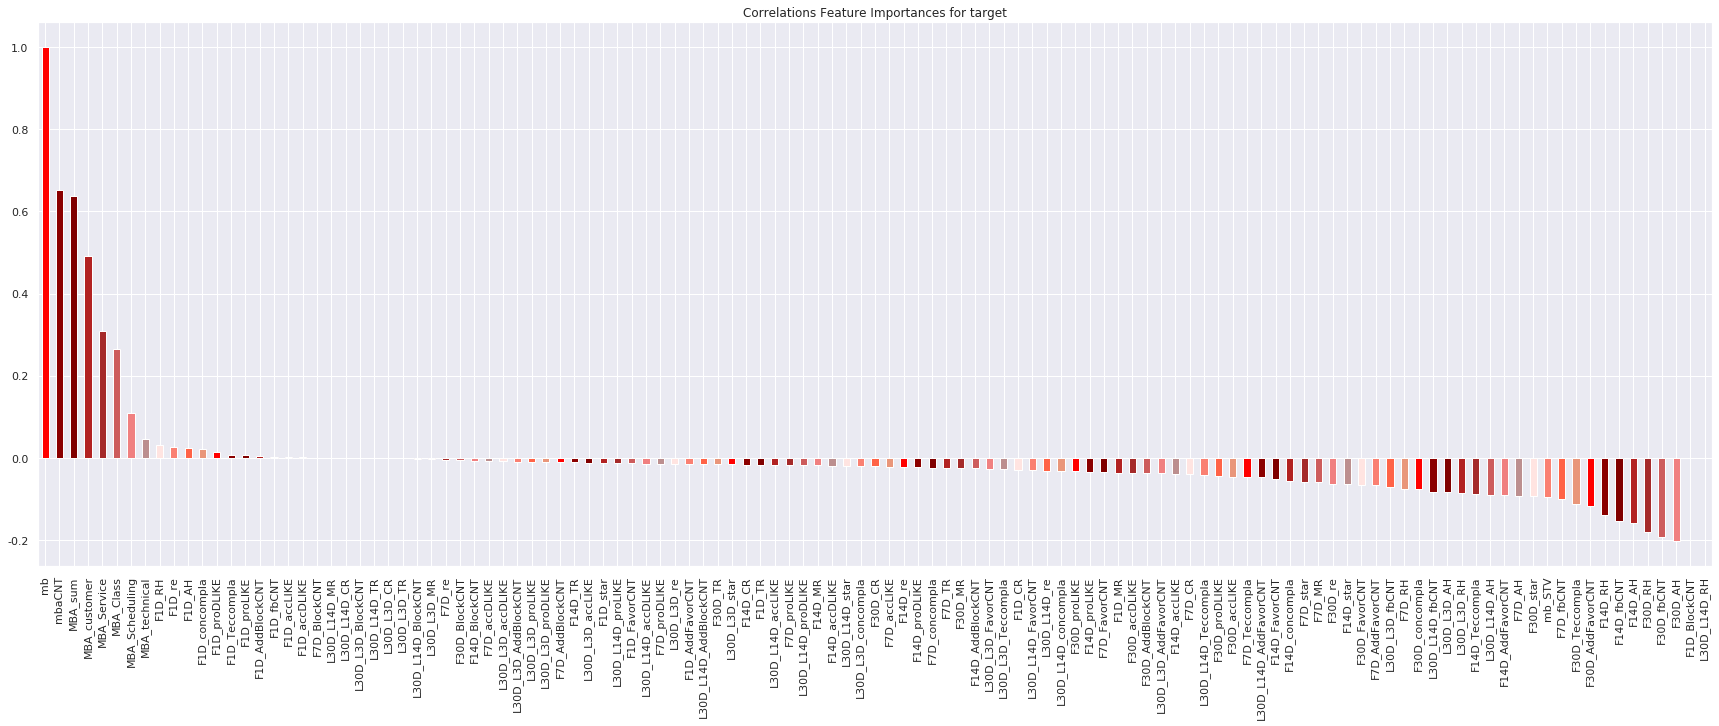

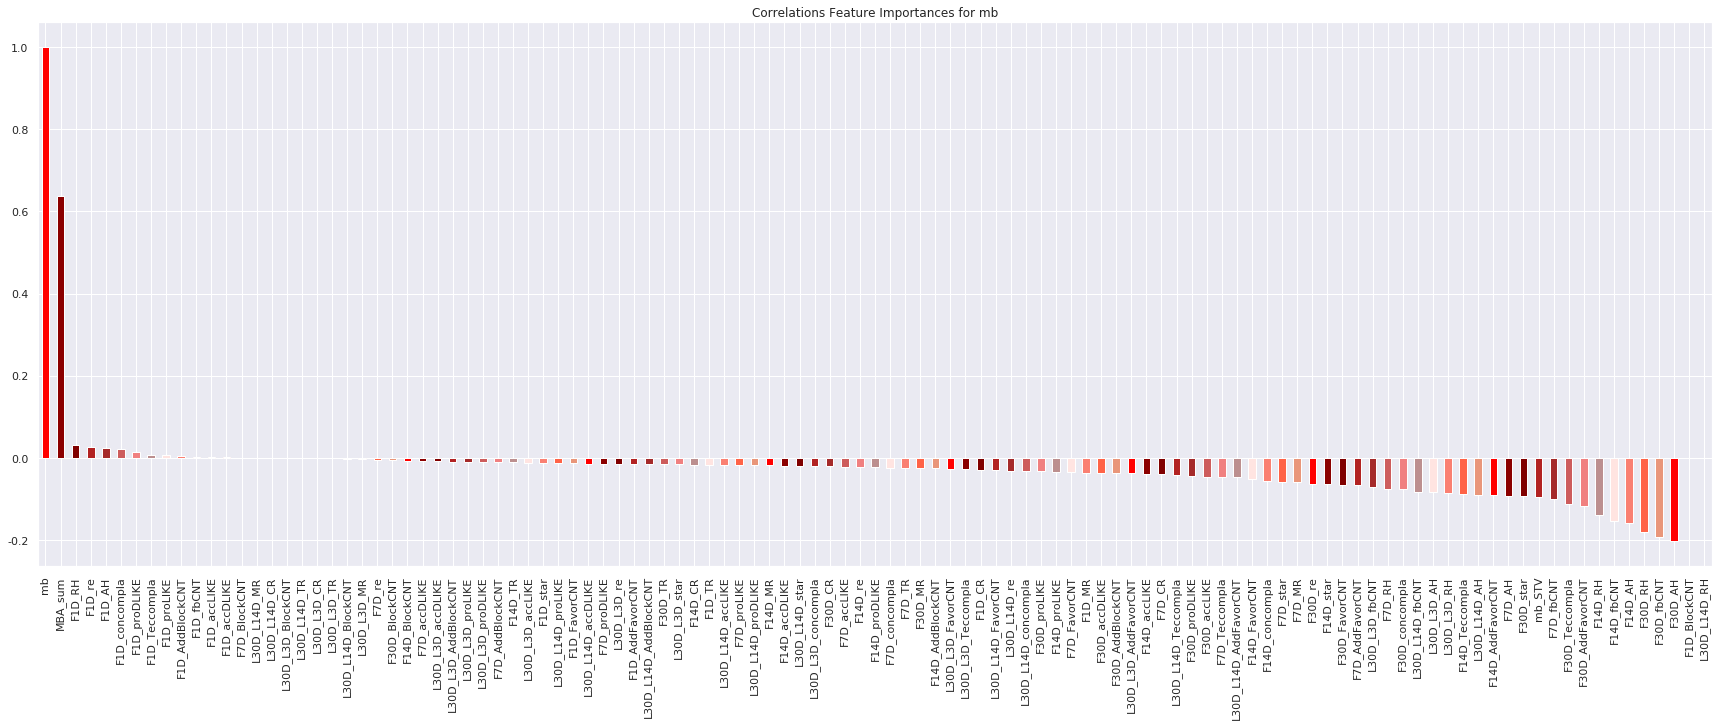

In [290]:
redcl=["red","darkred","maroon","firebrick","brown","indianred",
     "lightcoral","rosybrown",'mistyrose','salmon','tomato','darksalmon']

plt.figure(figsize=(30,10))
df_sum.corr()['mb'].sort_values(ascending = False).plot(kind='bar',colors=redcl)
plt.title("Correlations Feature Importances for target")

df_sum_fix = df_sum.drop(['mbaCNT','MBA_Class','MBA_technical','MBA_customer','MBA_Scheduling','MBA_Service'],axis=1)


plt.figure(figsize=(30,10))
df_sum_fix.corr()['mb'].sort_values(ascending = False).plot(kind='bar',colors=redcl)
plt.title("Correlations Feature Importances for mb")

In [245]:
df_sum['mb'].value_counts()

0    165764
1     29592
Name: mb, dtype: int64

In [246]:
df_sum['mbaCNT'].value_counts()

0.000    142444
1.000     49356
2.000      3260
3.000       260
4.000        36
Name: mbaCNT, dtype: int64

In [247]:
df_sum['MBA_Class'].value_counts()

0.000    185976
1.000      8452
2.000       804
3.000       112
4.000        12
Name: MBA_Class, dtype: int64

In [248]:
df_sum['MBA_technical'].value_counts()

0.000    194120
1.000      1048
2.000       140
3.000        36
4.000         8
6.000         4
Name: MBA_technical, dtype: int64

In [249]:
df_sum['MBA_customer'].value_counts()

0.000    167728
1.000     26596
2.000       972
3.000        60
Name: MBA_customer, dtype: int64

In [250]:
df_sum['MBA_Service'].value_counts()

0.000    178572
1.000     16328
2.000       456
Name: MBA_Service, dtype: int64

In [251]:
df_sum['MBA_Scheduling'].value_counts()

0.000    192856
1.000      2328
2.000       164
3.000         8
Name: MBA_Scheduling, dtype: int64

In [263]:
#通報次數總合
df_sum['MBA_sum'] = df_sum['MBA_customer']+df_sum['MBA_Service']+df_sum['MBA_Scheduling']+df_sum['MBA_technical']+df_sum['MBA_Class']

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [278]:
df_sum['mbaCNT'][df_sum['mb']==1].value_counts()

1.000    27676
2.000     1692
3.000      112
0.000      108
4.000        4
Name: mbaCNT, dtype: int64

In [277]:
df_sum['MBA_sum'][df_sum['mb']==1].value_counts()

1.000    25752
2.000     2968
3.000      560
4.000      164
0.000      120
5.000       16
6.000        8
8.000        4
Name: MBA_sum, dtype: int64

# 確定Y再說


 mu = nan and sigma = nan

0.29075124388296236 0.4997866482475265 1.533307256902433 5.099288267521674


D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


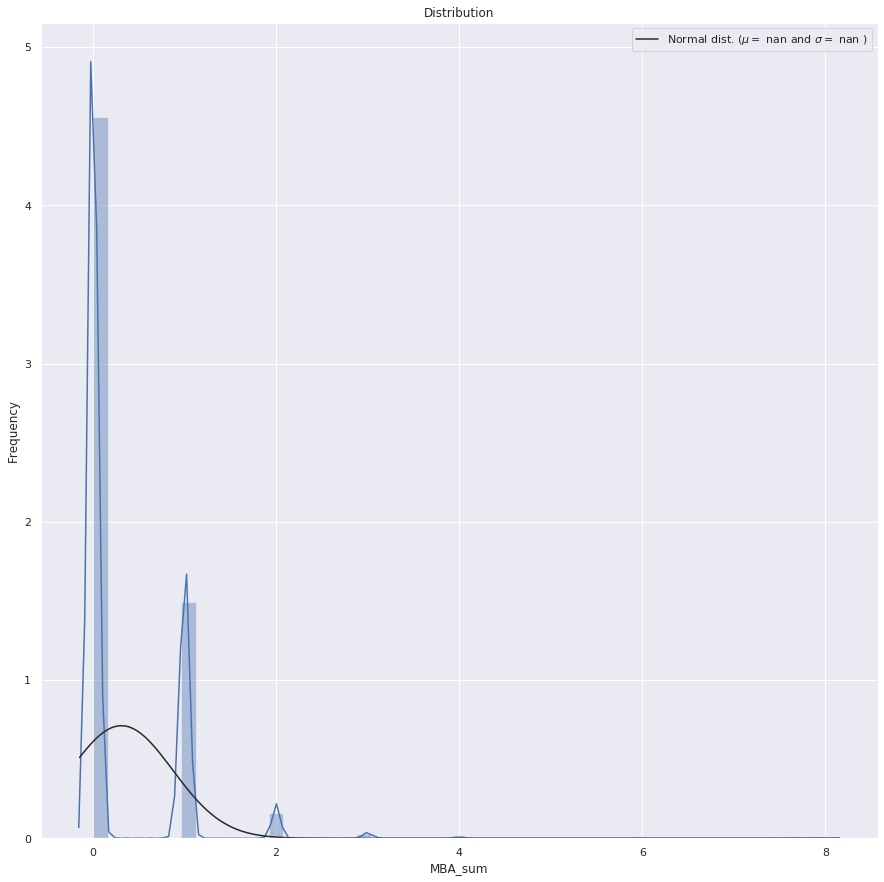

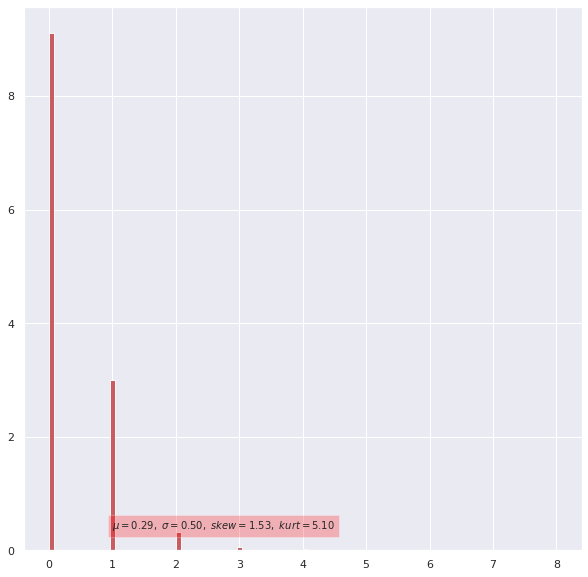

In [279]:
plt.figure(figsize=(15,15))
sns.distplot(df_sum['MBA_sum'], fit=norm)
(mu, sigma) = norm.fit(df_sum)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')
plt.ylabel('Frequency')
plt.title('Distribution')

[niu, sigma, skew, kurt] = calc_stat(df_sum['mbaCNT'])
#[niu_2, sigma2, skew2, kurt2] = calc_stat(df1D['F1D_AH'])
print (niu, sigma, skew, kurt)
#print (niu_2, sigma2, skew2, kurt2)
info = r'$\mu=%.2f,\ \sigma=%.2f,\ skew=%.2f,\ kurt=%.2f$' %(niu,sigma, skew, kurt) # 標註
#info2 = r'$\mu=%.2f,\ \sigma=%.2f,\ skew=%.2f,\ kurt=%.2f$' %(niu_2,sigma2, skew2, kurt2)
plt.figure(figsize=(10,10))
plt.text(1,0.38,info,bbox=dict(facecolor='red',alpha=0.25))
#plt.text(1,0.35,info2,bbox=dict(facecolor='green',alpha=0.25))
plt.hist(df_sum['MBA_sum'],100,normed=True,facecolor='r',alpha=0.9)
#plt.hist(df1D['F1D_AH'],100,normed=True,facecolor='g',alpha=0.8)
plt.grid(True)
plt.show()

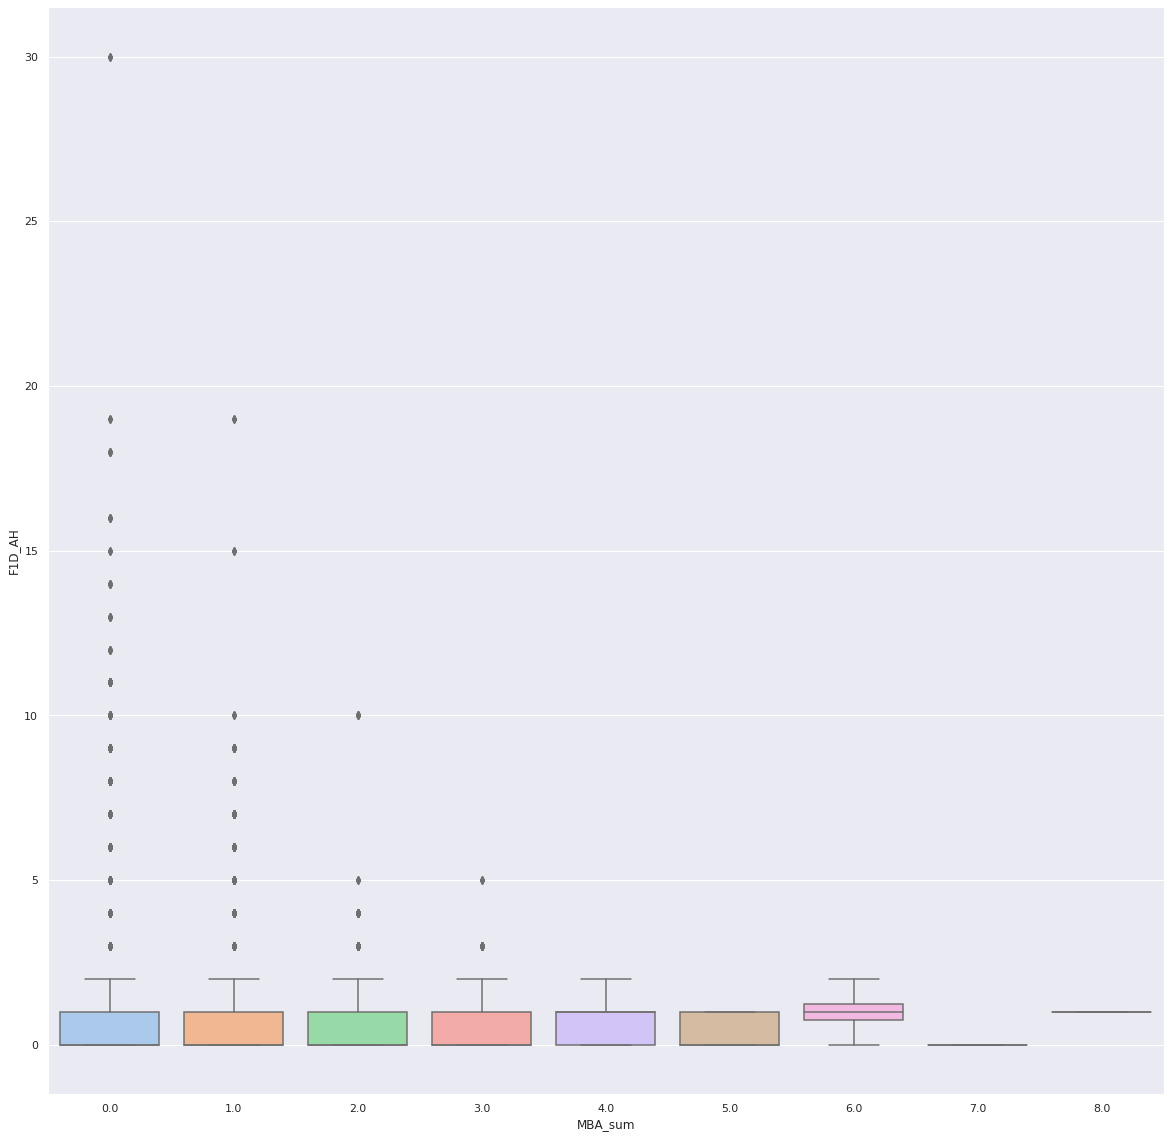

In [281]:
plt.figure(figsize=(20,20))
sns.boxplot(x="MBA_sum", y="F1D_AH",data=df_sum, palette="pastel")